<a href="https://colab.research.google.com/github/vuchicago/Python/blob/master/MSA_Invest_3_24_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
####MOUNT DRIVE
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
###################### INSTALL TENSORFLOW 2.0 ##############################
!pip install tensorflow==2.0.0b1


     |████████████████████████████████| 87.9MB 47kB/s 
     |████████████████████████████████| 501kB 45.9MB/s 
     |████████████████████████████████| 3.1MB 47.8MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [5]:
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'2.0.0-beta1'

In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime as dt

base_dir="/content/gdrive/My Drive/Python/MSA_Invest"
msa_dir=os.path.join(base_dir,"CAGDP11")
grad_boost_img=os.path.join(base_dir,"Gradient_boost_img")
LSTM_img=os.path.join(base_dir,"LSTM_img")
deep_learning_img=os.path.join(base_dir,"Deep_learning_img")
os.chdir(base_dir)
PCA="PCA_Winter_2019-20_State_Forecast.xlsx"

PCA_sheet=pd.ExcelFile(PCA)
PCA_sheet.sheet_names ##List of all the sheets within excel file

#########################################################################################


['Output',
 'Res',
 'West North Central',
 'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'East North Central',
 'Illinois',
 'Indiana',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'East South Central',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Tennessee',
 'Middle Atlantic',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Mountain',
 'Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'New England',
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'Pacific',
 'California',
 'Hawaii',
 'Oregon',
 'Washington',
 'South Atlantic',
 'Delaware',
 'Florida',
 'Georgia',
 'District of Columbia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'West South Central',
 'Arkansas',
 'Louisiana',
 'Oklahoma',
 'Texas']

In [0]:
sheet_keep=[
 'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'Illinois',
 'Indiana',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Tennessee',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Mountain',
 'Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'New England',
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'California',
 'Hawaii',
 'Oregon',
 'Washington',
 'Delaware',
 'Florida',
 'Georgia',
 'District of Columbia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'Arkansas',
 'Louisiana',
 'Oklahoma',
 'Texas']

In [0]:
idx=0
df_pca=pd.DataFrame()
for states in sheet_keep:
  df=pd.read_excel(PCA,sheet_name=states,header=1)
  keep_indices=[4,7,11,18,21,29,32,36,40,48,51,53,56,61,62,63]
  df=df.iloc[keep_indices,:]
  df=df.T
  df=df.rename(columns=df.iloc[0]).drop(df.index[0])
  df.insert(loc=idx, column='State', value=states)
  df=df.rename(columns={"States":"State","- Unemployment Rate":"Unemployment Rate","Total Portland Cement ":"Total Portland Cement","Cement Per Capita ":"Cement Per Capita"})
  df_pca=pd.concat([df_pca,df],axis=0,sort=True)

df_pca.head()

- Unemployment Rate, %  ... Unemployment Rate (%)
2000                    NaN  ...                   NaN
2001                    NaN  ...             0.0333213
2002                    NaN  ...             0.0399316
2003                    NaN  ...             0.0449228
2004                    NaN  ...             0.0449686

[5 rows x 19 columns]

In [0]:
BED="CAGDP11__ALL_AREAS_2002_2018.csv"
df_bed=pd.read_csv(BED, encoding='latin-1')
column_keep=["GeoName","Description_fixed", "2002",'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017',"2018"]
df_bed=df_bed[column_keep][pd.notna(df_bed["GeoName"])] ##get rid of NA's from geoname column
df_bed.head()

GeoName                              Description_fixed  ...   2017  2018
0  Autauga, AL            All industry total (percent change)  ...   -6.8   4.3
1  Autauga, AL                             Private industries  ...  -6.13   4.5
2  Autauga, AL     Agriculture, forestry, fishing and hunting  ...   0.13  0.12
3  Autauga, AL  Mining, quarrying, and oil and gas extraction  ...  -0.04  0.69
4  Autauga, AL                                      Utilities  ...  -5.33  1.34

[5 rows x 19 columns]

In [0]:
df_bed=df_bed.melt(["GeoName","Description_fixed"],var_name="Year",value_name="Value") ###Turns dataset into a flat file.  Each year column (2002-2018) unpivots into 1 column named 'Year'
df_bed.head()


GeoName                              Description_fixed  Year  Value
0  Autauga, AL            All industry total (percent change)  2002    2.2
1  Autauga, AL                             Private industries  2002   0.91
2  Autauga, AL     Agriculture, forestry, fishing and hunting  2002  -0.36
3  Autauga, AL  Mining, quarrying, and oil and gas extraction  2002  -0.07
4  Autauga, AL                                      Utilities  2002   3.25

In [0]:
df_bed_piv=pd.pivot_table(df_bed,index=["GeoName","Year"],columns="Description_fixed",values="Value",aggfunc=np.sum) #Re-pivots data where the description columns creates multiple columns bbased on grouping
df_bed_piv.head()

Description_fixed  Accommodation and food services  ... Wholesale trade
GeoName       Year                                  ...                
Abbeville, SC 2002                           -0.01  ...           -0.22
              2003                           -0.19  ...             (D)
              2004                            0.12  ...           -0.04
              2005                           -0.13  ...             (D)
              2006                           -0.09  ...           -0.11

[5 rows x 34 columns]

In [0]:
df_bed_piv.to_csv("df_bed_piv.csv")
df_pca.to_csv("df_pca.csv")


In [16]:
####################################################################################
import pandas as pd
import numpy as np


df_bed_draft=pd.read_csv("df_bed_piv.csv")
df_bed_draft["State"]=df_bed_draft["GeoName"].str[-2:]
df_bed_draft.head()

Unnamed: 0        GeoName  Year  ... Utilities Wholesale trade State
0           0  Abbeville, SC  2002  ...      0.07           -0.22    SC
1           1  Abbeville, SC  2003  ...     -0.01             (D)    SC
2           2  Abbeville, SC  2004  ...         0           -0.04    SC
3           3  Abbeville, SC  2005  ...     -0.05             (D)    SC
4           4  Abbeville, SC  2006  ...      0.06           -0.11    SC

[5 rows x 38 columns]

In [12]:
################################################ START HERE

State_acro={
'Colorado':'CO',
'Idaho':'ID',
'Montana':'MT',
'New Mexico':'NM',
'Nevada':'NV',
'Oregon':'OR',
'Utah':'UT',
'Washington':'WA',
'Wyoming':'WY',
'Iowa':'IA',
'Illinois':'IL',
'Kansas':'KS',
'Minnesota':'MN',
'Missouri':'MO',
'North Dakota':'ND',
'Nebraska':'NE',
'South Dakota':'SD',
'Wisconsin':'WI',
'Indiana':'IN',
'Kentucky':'KY',
'Michigan':'MI',
'Ohio':'OH',
'West Virginia':'WV',
'Connecticut':'CT',
'District of Columbia':'DC',
'Delaware':'DE',
'Massachusetts':'MA',
'Maryland':'MD',
'Maine':'ME',
'New Hampshire':'NH',
'New Jersey':'NJ',
'New York':'NY',
'Pennsylvania':'PA',
'Rhode Island':'RI',
'Virginia':'VA',
'Vermont':'VT',
'Alabama':'AL',
'Arkansas':'AR',
'Florida':'FL',
'Georgia':'GA',
'Louisiana':'LA',
'Mississippi':'MS',
'North Carolina':'NC',
'South Carolina':'SC',
'Tennessee':'TN',
'Texas':'TX',
'Oklahoma':'OK'}	


df_pca=pd.read_csv("df_pca.csv")
df_pca["State_acro"]=df_pca["State"].map(State_acro)
df_pca=df_pca.rename(columns={"Unnamed: 0":"Year"})
df_pca.head()


Year  - Unemployment Rate, %  ... Unemployment Rate (%) State_acro
0  2000                     NaN  ...                   NaN         IA
1  2001                     NaN  ...              0.033321         IA
2  2002                     NaN  ...              0.039932         IA
3  2003                     NaN  ...              0.044923         IA
4  2004                     NaN  ...              0.044969         IA

[5 rows x 21 columns]

In [13]:
df_dodge=pd.read_excel("Dodge Data.xlsx",sheet_name="Dodge Data")
df_dodge=df_dodge[df_dodge["BED Geo"]!=0]
dodge_keep=["BED Geo","Geo","MSA","State","Time Period","Measure"]
df_dodge=df_dodge[dodge_keep]
df_dodge["BED Geo"]

38      Schenectady, NY
39      Schenectady, NY
40      Schenectady, NY
41      Schenectady, NY
42      Schenectady, NY
             ...       
7253           Yuma, AZ
7254           Yuma, AZ
7255           Yuma, AZ
7256           Yuma, AZ
7257           Yuma, AZ
Name: BED Geo, Length: 2261, dtype: object

In [14]:
#####################MERGE PCA DATA WITH DODGE DATA
df_pca_dodge=pd.merge(df_pca,df_dodge,how='inner',left_on=["State_acro","Year"],right_on=["State","Time Period"])
df_pca_dodge=df_pca_dodge.rename(columns={"Measure":"Dodge Starts"})
df_pca_dodge.head()

Year  - Unemployment Rate, %  ... Time Period Dodge Starts
0  2006                     NaN  ...        2006       349771
1  2006                     NaN  ...        2006      1830018
2  2006                     NaN  ...        2006       249755
3  2006                     NaN  ...        2006       407474
4  2006                     NaN  ...        2006       352688

[5 rows x 27 columns]

In [18]:
df_complete=pd.merge(df_pca_dodge,df_bed_draft,how='left',left_on=["BED Geo","Year"],right_on=["GeoName","Year"])
df_complete=df_complete.rename(columns={'Private goods-producing industries 2/':'Private goods-producing industries','Private services-providing industries 3/':'Private services-providing industries'})
df_complete_pca_test=df_complete[df_complete["Year"].astype(float)>2018] ### USED FOR PREDICTION LATER
df_complete_pca_test.to_csv("df_complete_pca_test.csv")
df_complete=df_complete[df_complete["Year"].astype(float)<2019]
df_complete.head()



Year  - Unemployment Rate, %  ... Wholesale trade State
0  2006                     NaN  ...           -0.82    IA
1  2006                     NaN  ...           -0.13    IA
2  2006                     NaN  ...            0.23    IA
3  2006                     NaN  ...            0.26    IA
4  2006                     NaN  ...           -0.82    IA

[5 rows x 64 columns]

In [164]:
df_pca_test.shape

(594, 65)

In [0]:
###### KEEP THESE COLUMNS FROM DF_COMPLETE
var_pca= ["Dodge Starts",
          'Cement Intensity (MT/Mil$2009)', ####PCA DATA
          'Cement Per Capita',
          'Cement Per GSP (MT/Mil$2005)', 
          'Cement Per GSP (MT/Mil$2009)',
          'Commercial Cement Consumption', 
          'Commercial Construction Spending',
          'Government Cement Consumption',
          'Gross State Product, Real ($2012, Millions)', 
          'Multi Family Permits',
          'Public Construction Spending', 
          'Residential Cement Consumption',
          'Residential Construction Spending', 
          'Single Family Permits', 
          'Total Construction Spending', 
          'Total Portland Cement',
          'Unemployment Rate (%)'
          ] 

var_bed=  ['Accommodation and food services', #####BUREAU OF ECONOMIC DEVELOPMENT DATA
          'Administrative and support and waste management and remediation services',
          'Agriculture, forestry, fishing and hunting',
          'All industry total (percent change)',
          'Arts, entertainment, and recreation',
          'Arts, entertainment, recreation, accommodation, and food services',
          'Construction', 
          'Durable goods manufacturing', 
          'Educational services',
          'Educational services, health care, and social assistance',
          'Finance and insurance',
          'Finance, insurance, real estate, rental, and leasing',
          'Government and government enterprises',
          'Health care and social assistance', 
          'Information',
          'Management of companies and enterprises', 
          'Manufacturing',
          'Manufacturing and information',
          'Mining, quarrying, and oil and gas extraction',
          'Natural resources and mining', 
          'Nondurable goods manufacturing',
          'Other services (except government and government enterprises)',
          'Private goods-producing industries', 
          'Private industries',
          'Private services-providing industries',
          'Professional and business services',
          'Professional, scientific, and technical services',
          'Real estate and rental and leasing', 
          'Retail trade', 'Trade',
          'Transportation and utilities', 
          'Transportation and warehousing',
          'Utilities', 
          'Wholesale trade']
var_keep=var_pca+var_bed

In [156]:
#########################################################DON'T RUN 
var_keep_complete=["GeoName","Year"]+var_keep
df_final=df_complete[var_keep_complete]
for var in var_keep:
  df_final[var]=df_final[var].replace('(D)',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_final[var]=df_final[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_final[var]=df_final[var].ffill() ##Forward fills data if NA
  df_final[var]=df_final[var].bfill()
  df_final[var]=df_final[var].astype(float)
  df_final[var]=df_final[var]*1.0
  
df_final=df_final.replace('(D)',np.nan)

df_final.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Index(['GeoName', 'Year', 'Dodge Starts', 'Cement Intensity (MT/Mil$2009)',
       'Cement Per Capita', 'Cement Per GSP (MT/Mil$2005)',
       'Cement Per GSP (MT/Mil$2009)', 'Commercial Cement Consumption',
       'Commercial Construction Spending', 'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits',
       'Total Construction Spending', 'Total Portland Cement',
       'Unemployment Rate (%)', 'Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting',
       'All industry total (percent change)',
       'Arts, entertainment, and recreation',
       'Arts, entertainment, recreation, accommodation, and food services',
       'Construction', 'Durable goods manufacturing', 'Educati

In [114]:
df_final.head()

GeoName  Year  ...  Utilities  Wholesale trade
0       Cedar, IA  2006  ...       0.36            -0.82
1  Des Moines, IA  2006  ...       0.09            -0.13
2     Dubuque, IA  2006  ...       0.02             0.23
3        Iowa, IA  2006  ...       0.16             0.26
4       Cedar, IA  2006  ...       0.36            -0.82

[5 rows x 53 columns]

In [0]:
df_final.to_csv("df_final.csv")

In [0]:
df_complete_pca_test=pd.read_csv("df_complete_pca_test.csv")
df_final=pd.read_csv("df_final.csv")

In [9]:
df_final.shape

(1287, 54)

Empty DataFrame
Columns: []
Index: []

In [20]:
################################# CREATE TRAINING AND VALIDATION DATASET
df_final_rand=df_final.sample(frac=1,random_state=2) ###Samples data with same random state
df_train=df_final_rand[:np.int(.8*len(df_final_rand))]
df_val=df_final_rand[np.int(.8*len(df_final_rand)):]
print("Train has {} samples; val has {} samples".format(len(df_train),len(df_val)))



#################################  CREATE TEST DATASET 
df_pca_test=df_complete_pca_test[var_pca]
for var in var_pca:
  df_pca_test[var]=df_pca_test[var].replace('g',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_pca_test[var]=df_pca_test[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_pca_test[var]=df_pca_test[var].ffill() ##Forward fills data if NA
  df_pca_test[var]=df_pca_test[var].bfill()

df_pca_test=df_pca_test.astype(float) ###CREATE PREDICTIONS


Train has 1029 samples; val has 258 samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [167]:
df_pca_test

Dodge Starts  ...  Unemployment Rate (%)
65        628743.0  ...               0.024699
66       3662174.0  ...               0.024699
67        239547.0  ...               0.024699
68        629153.0  ...               0.024699
69        181961.0  ...               0.024699
...            ...  ...                    ...
1876     1141980.0  ...               0.039876
1877      417717.0  ...               0.039876
1878      874281.0  ...               0.039876
1879      264356.0  ...               0.039876
1880      414138.0  ...               0.039876

[594 rows x 17 columns]

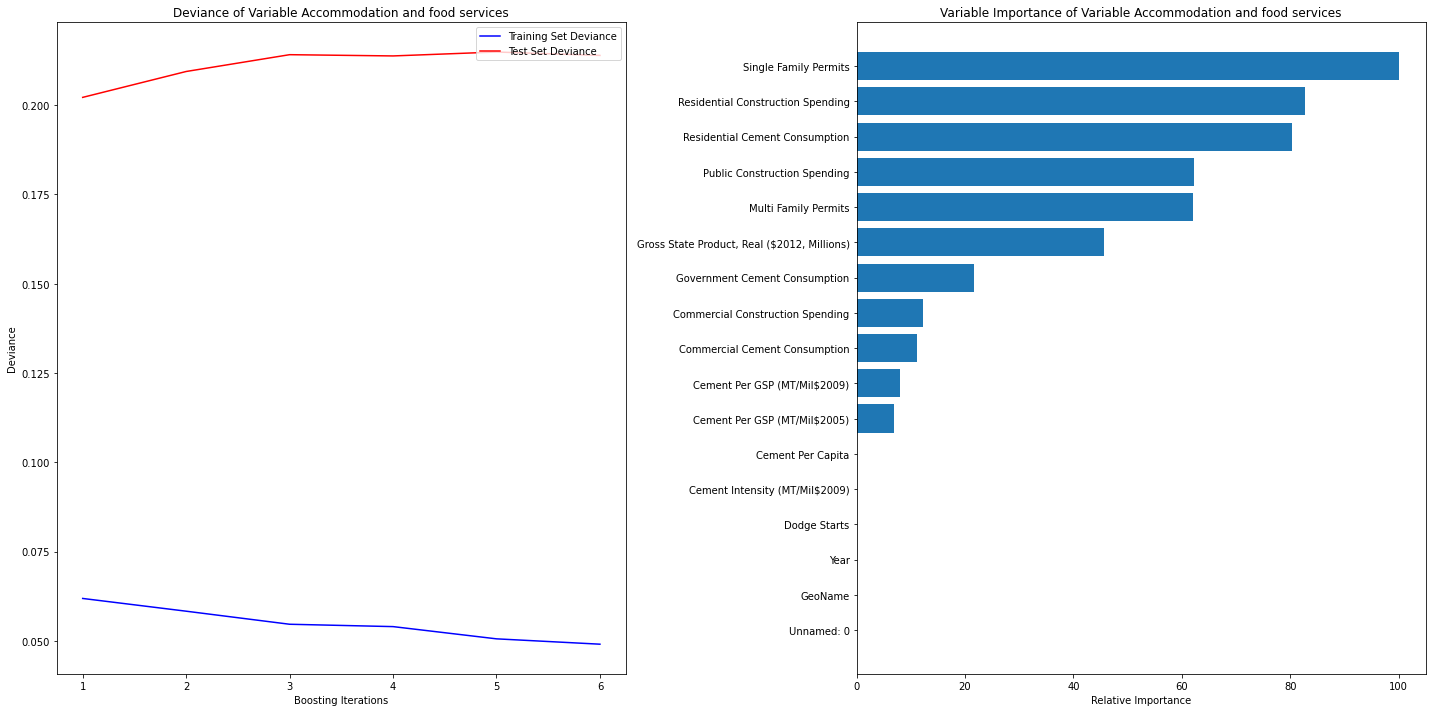

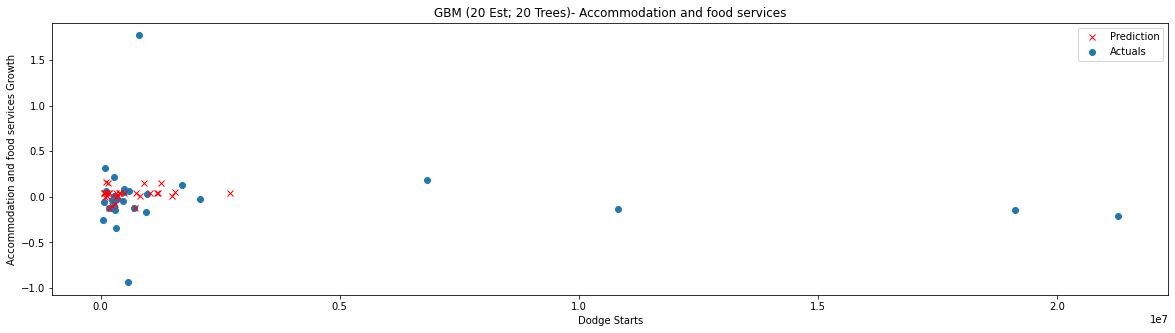

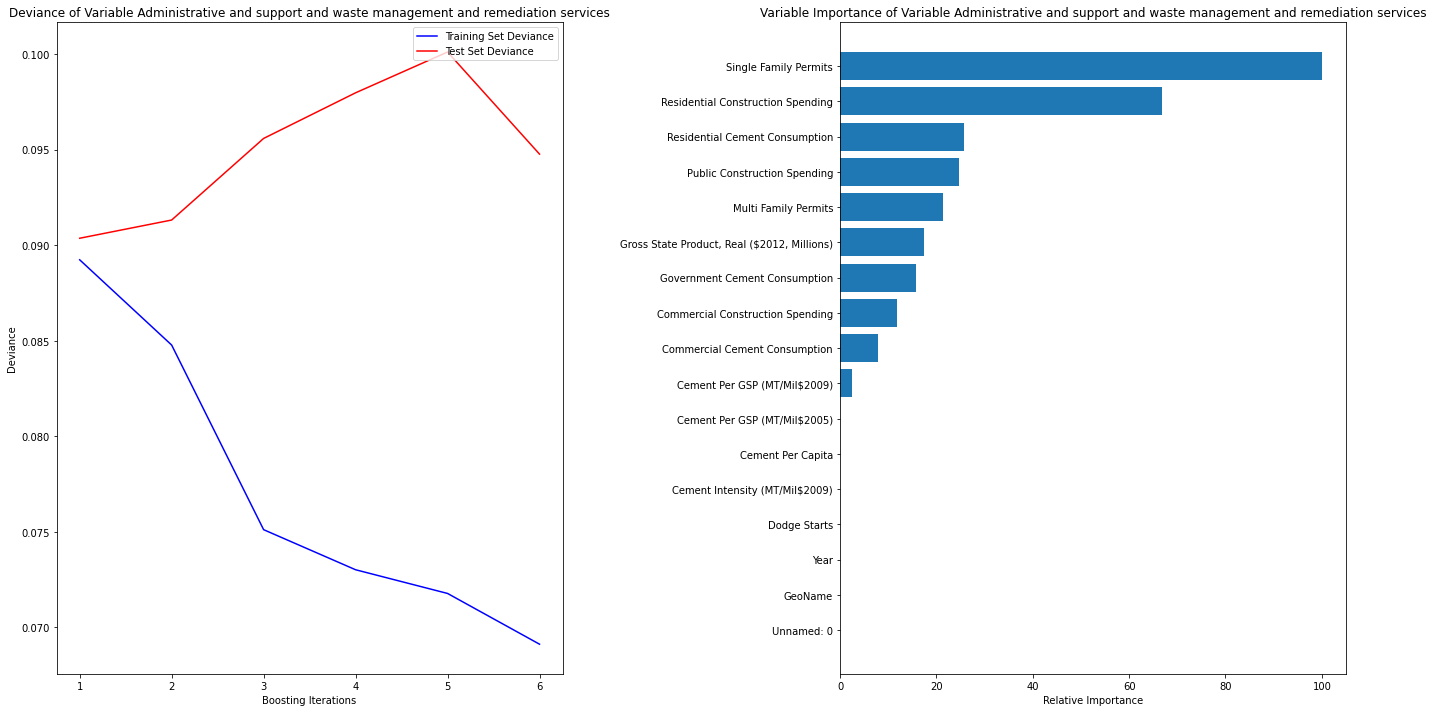

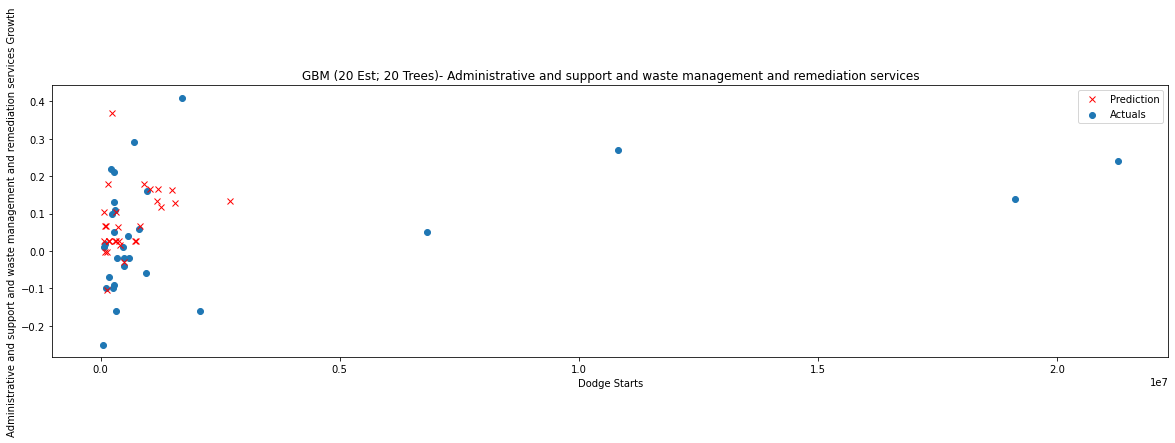

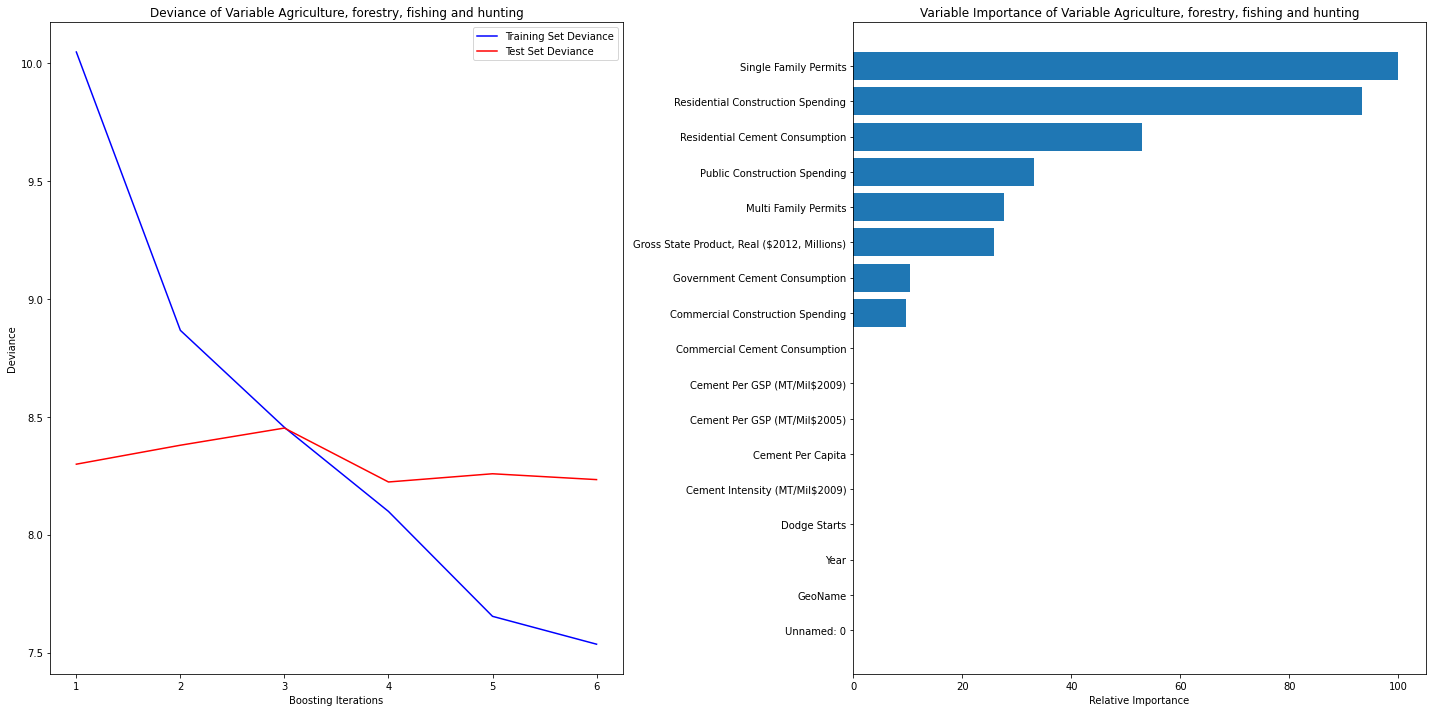

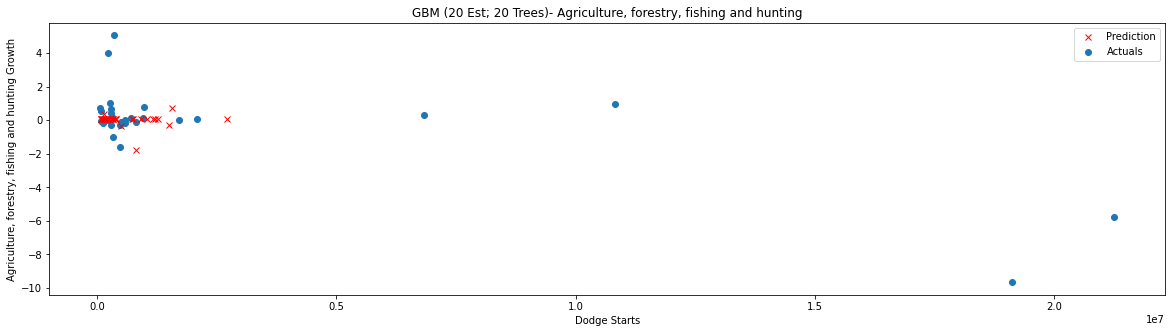

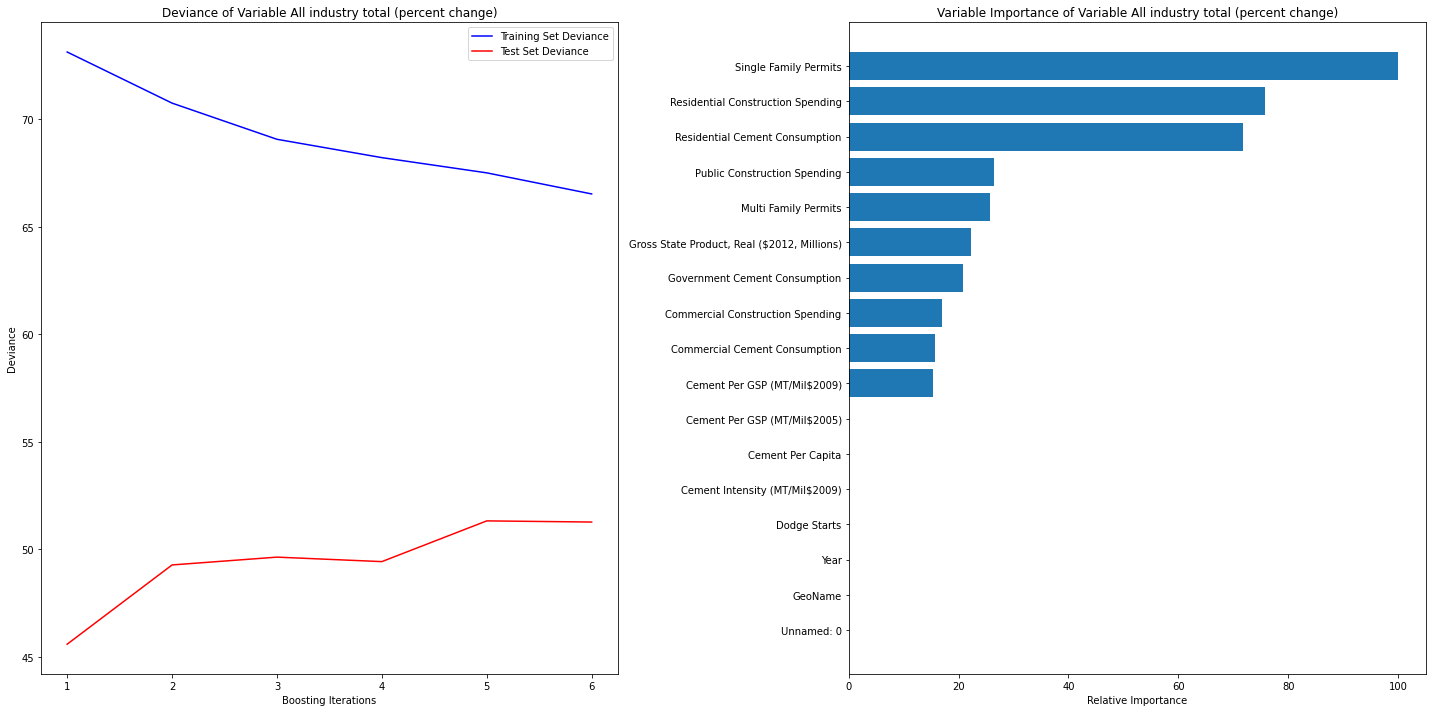

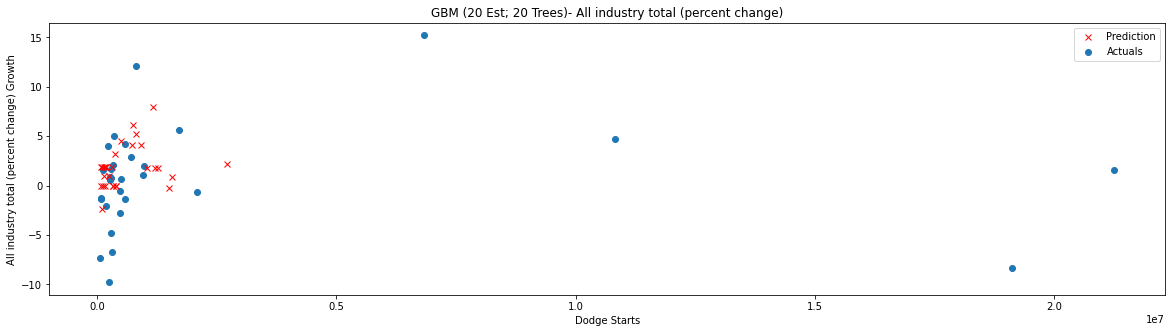

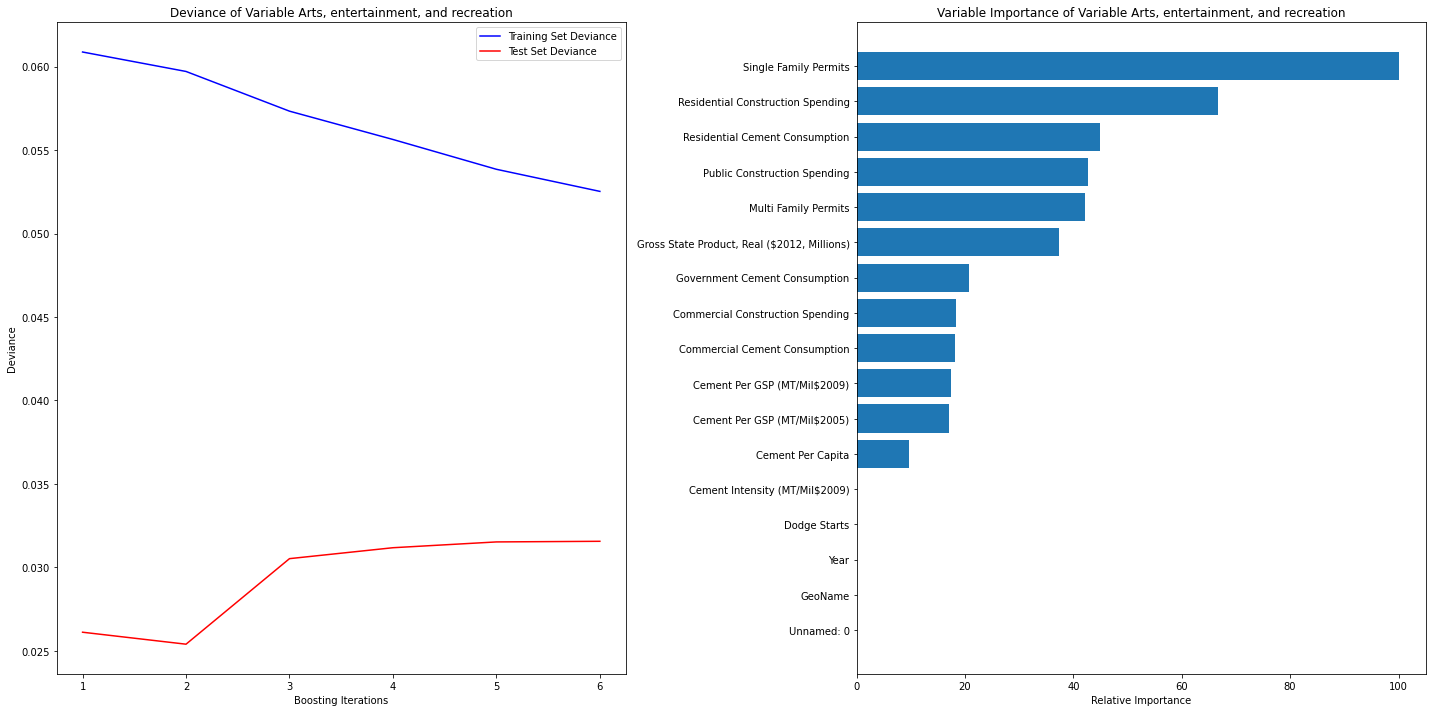

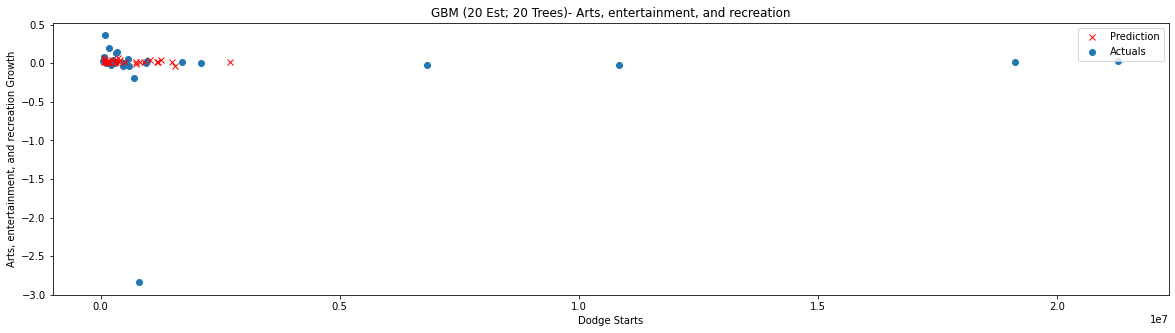

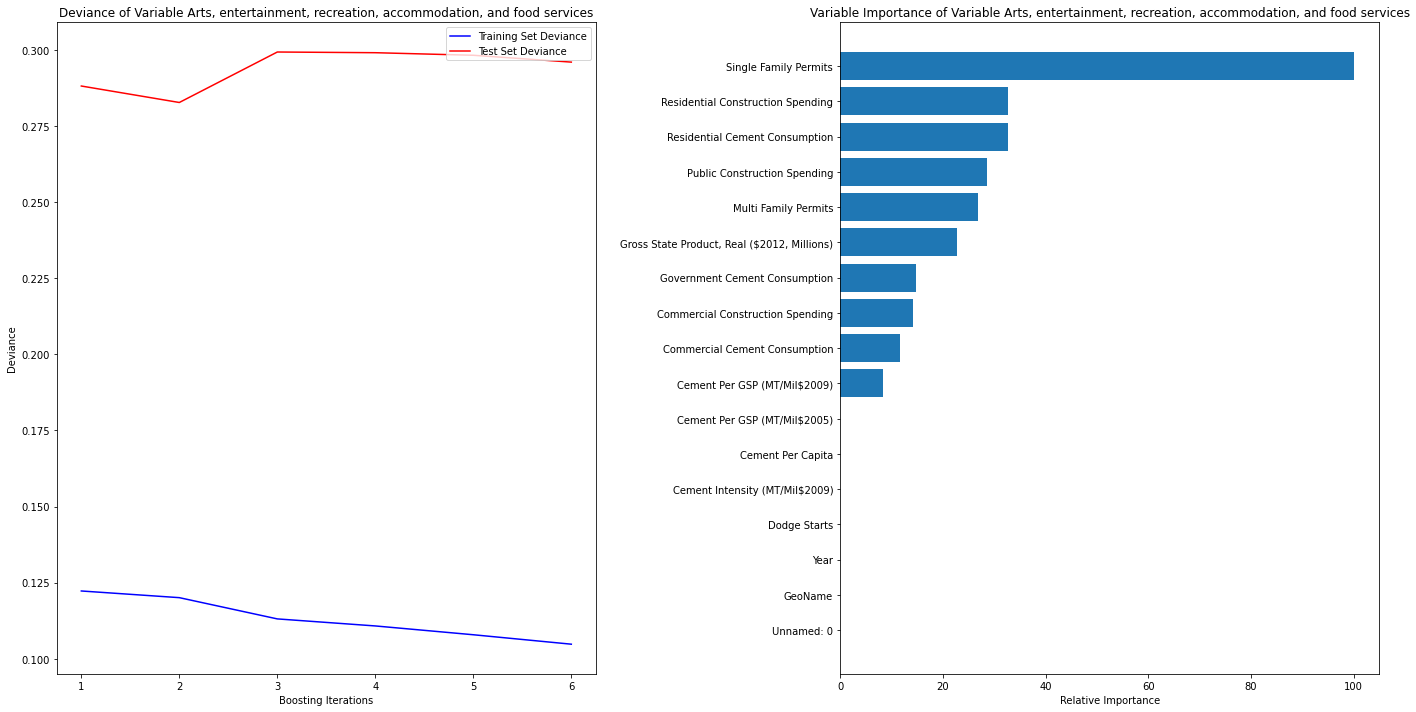

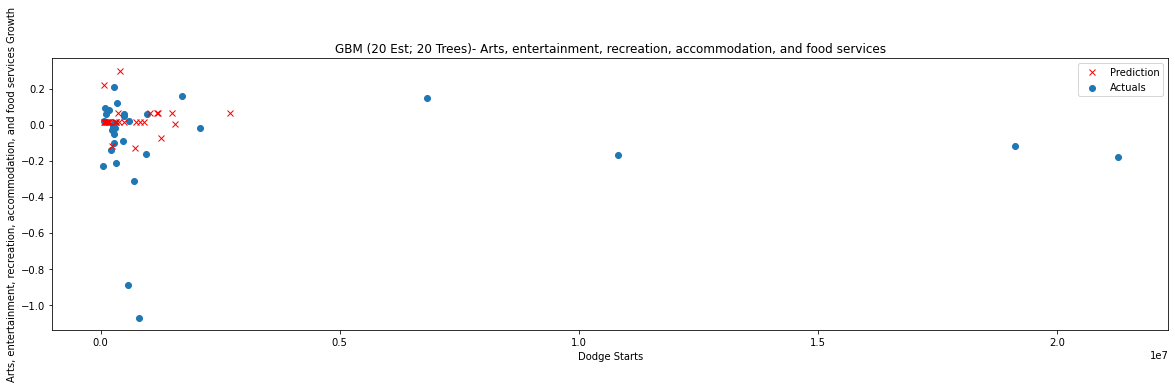

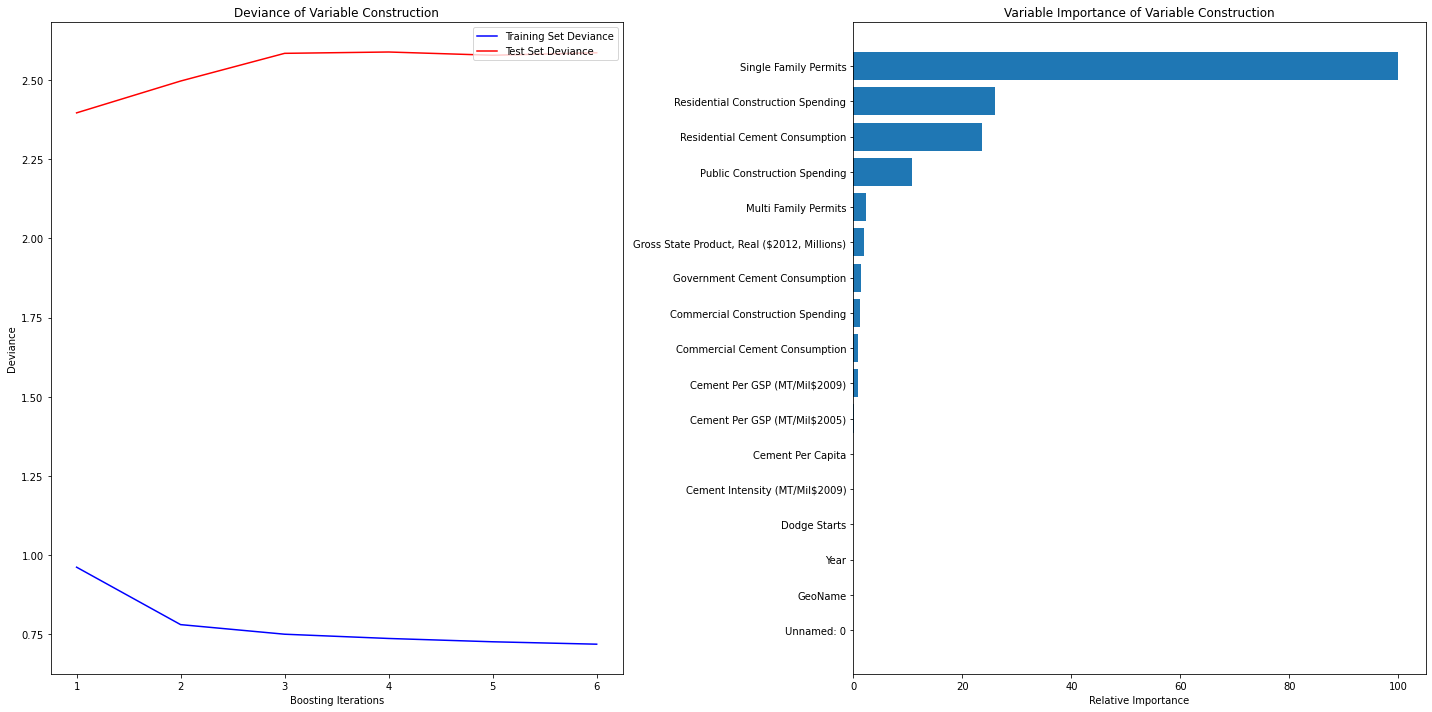

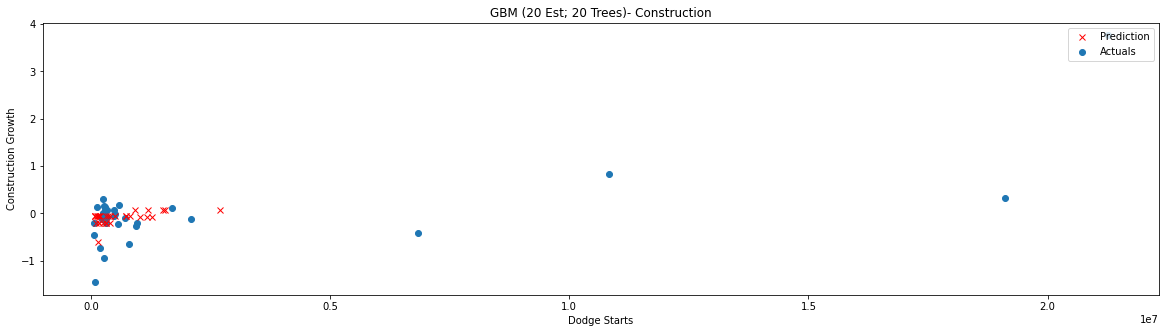

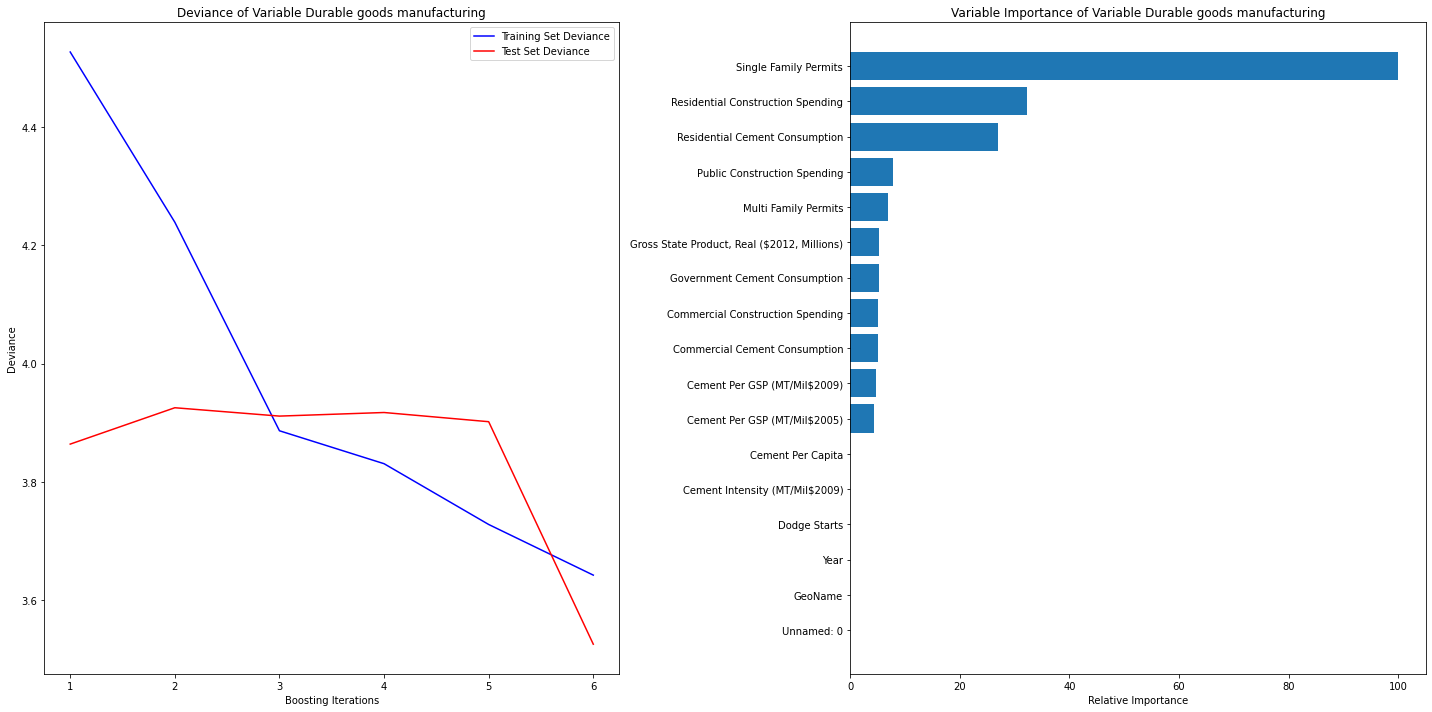

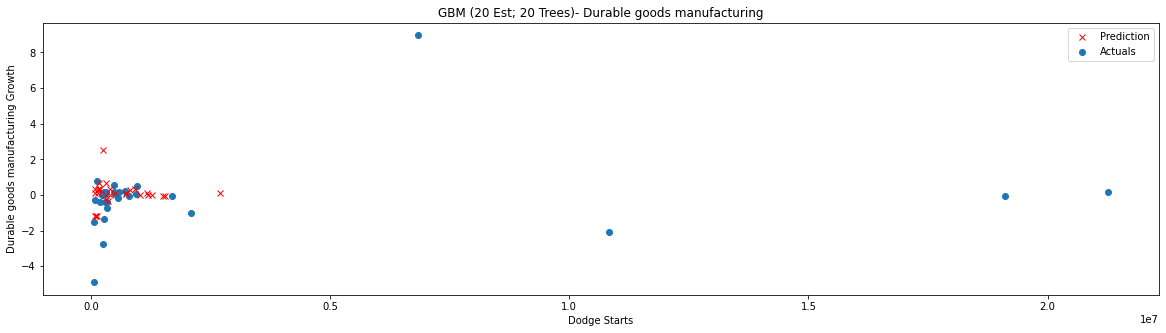

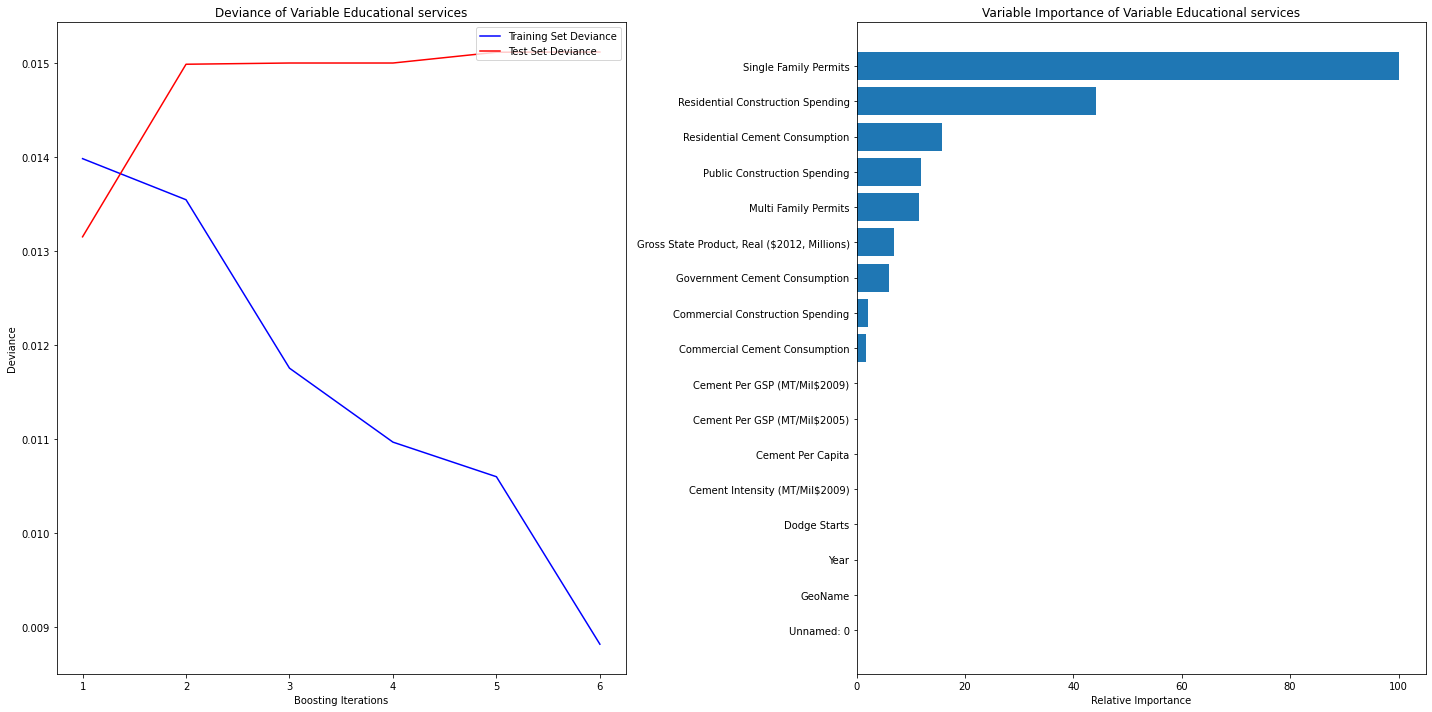

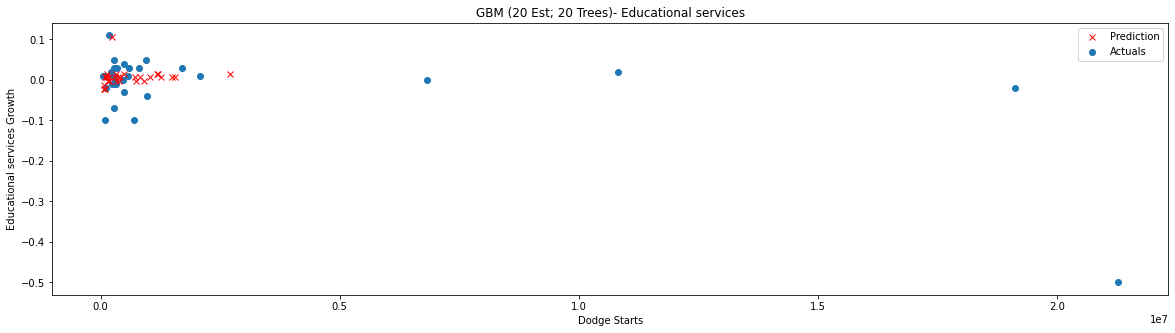

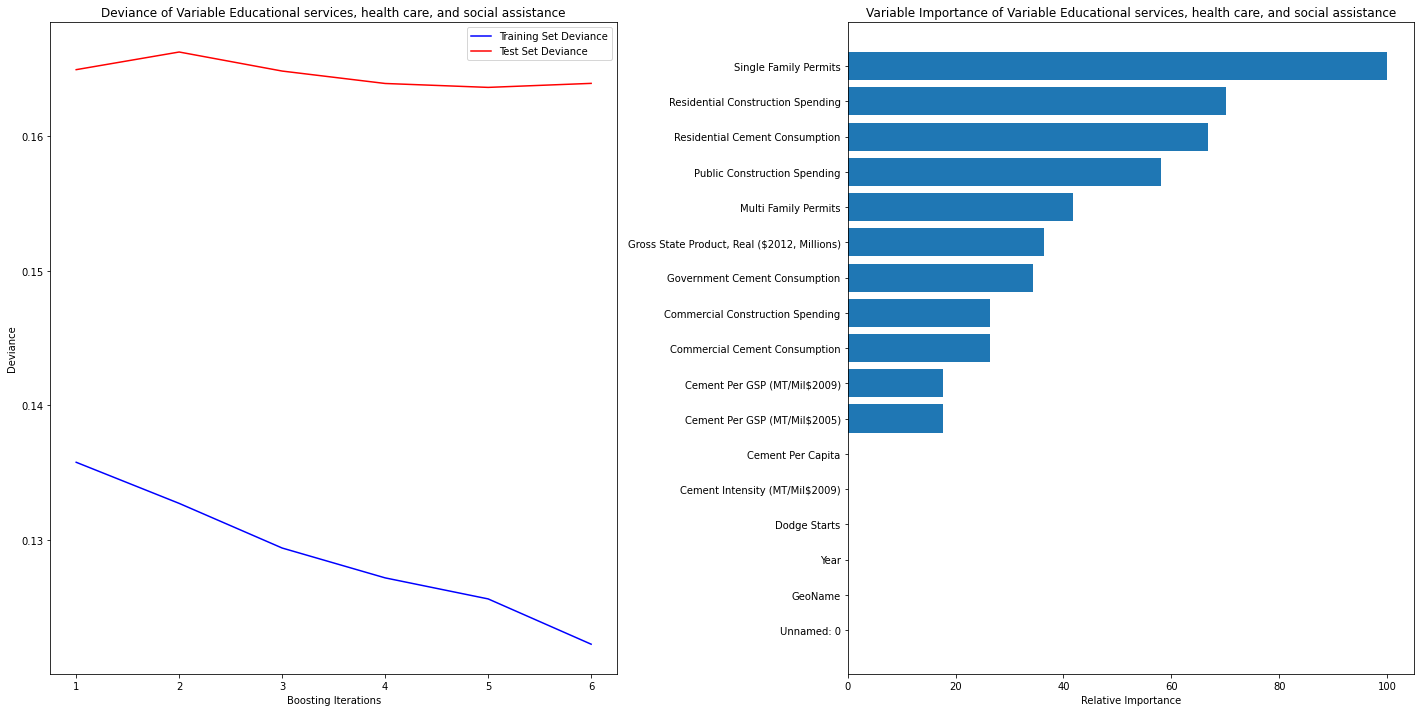

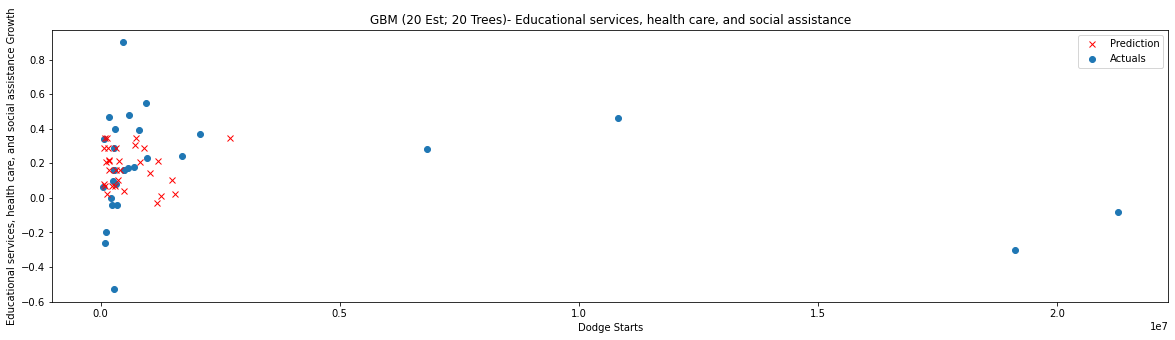

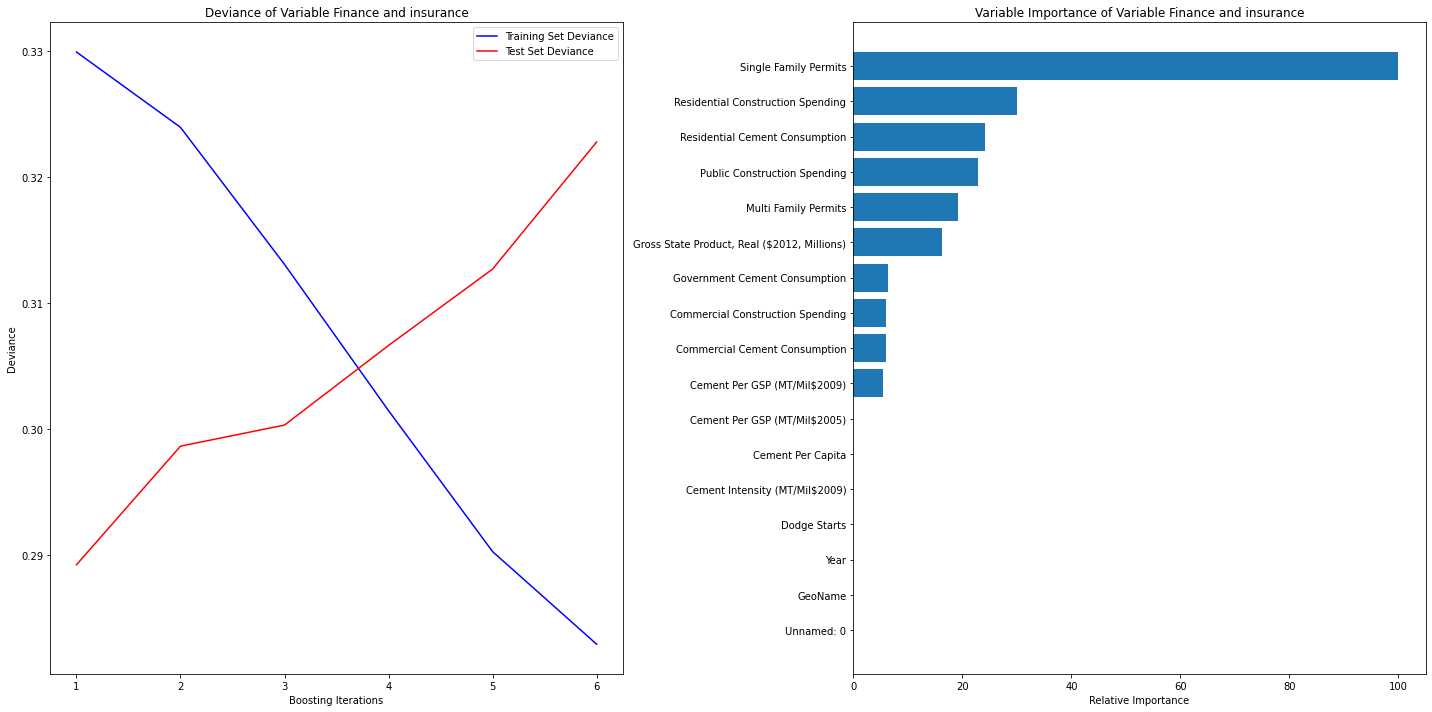

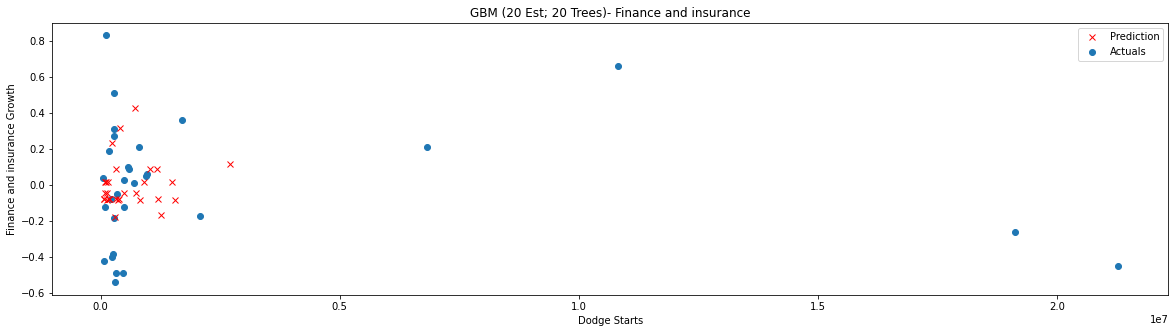

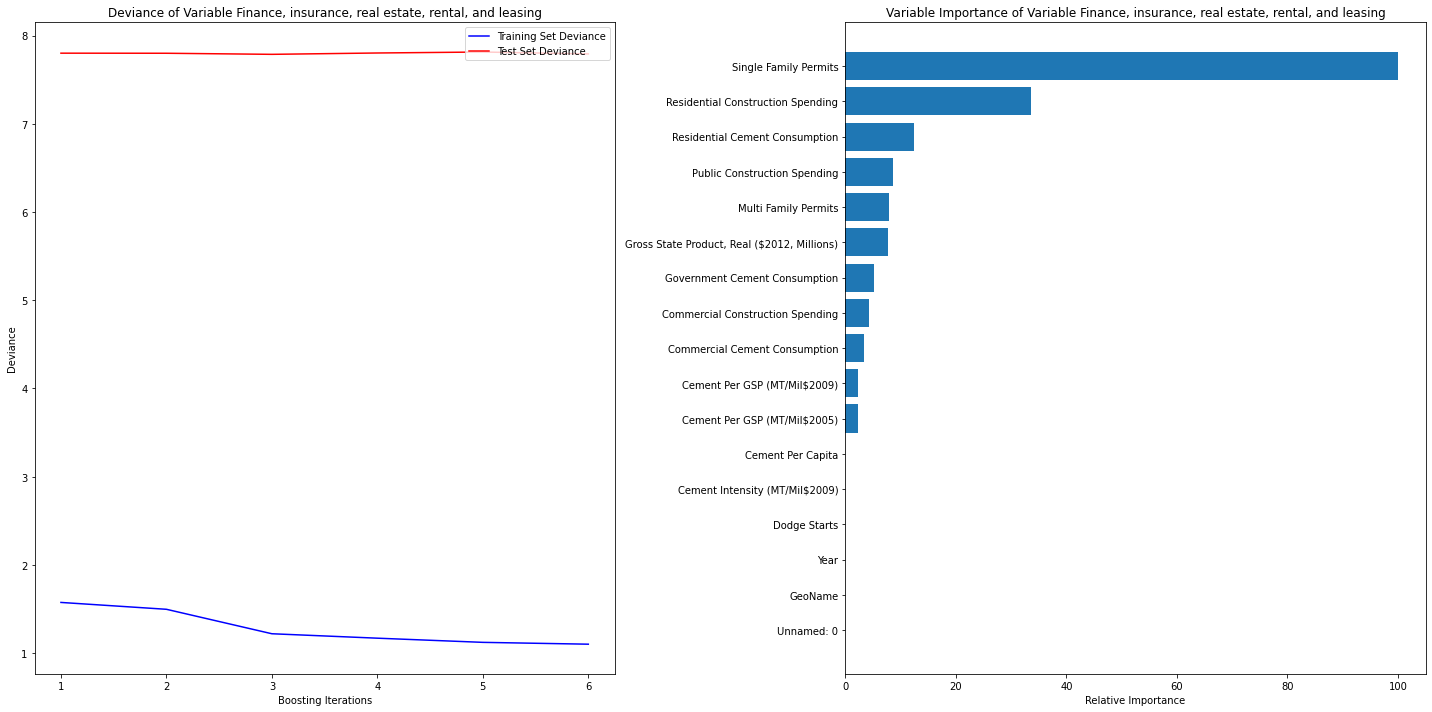

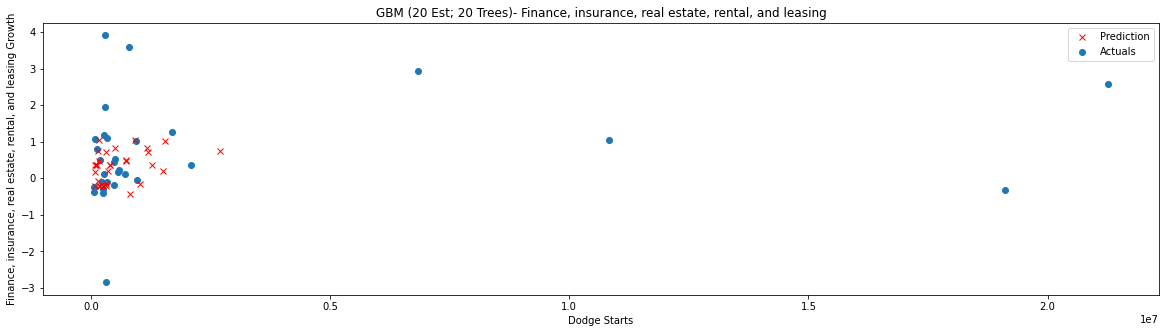

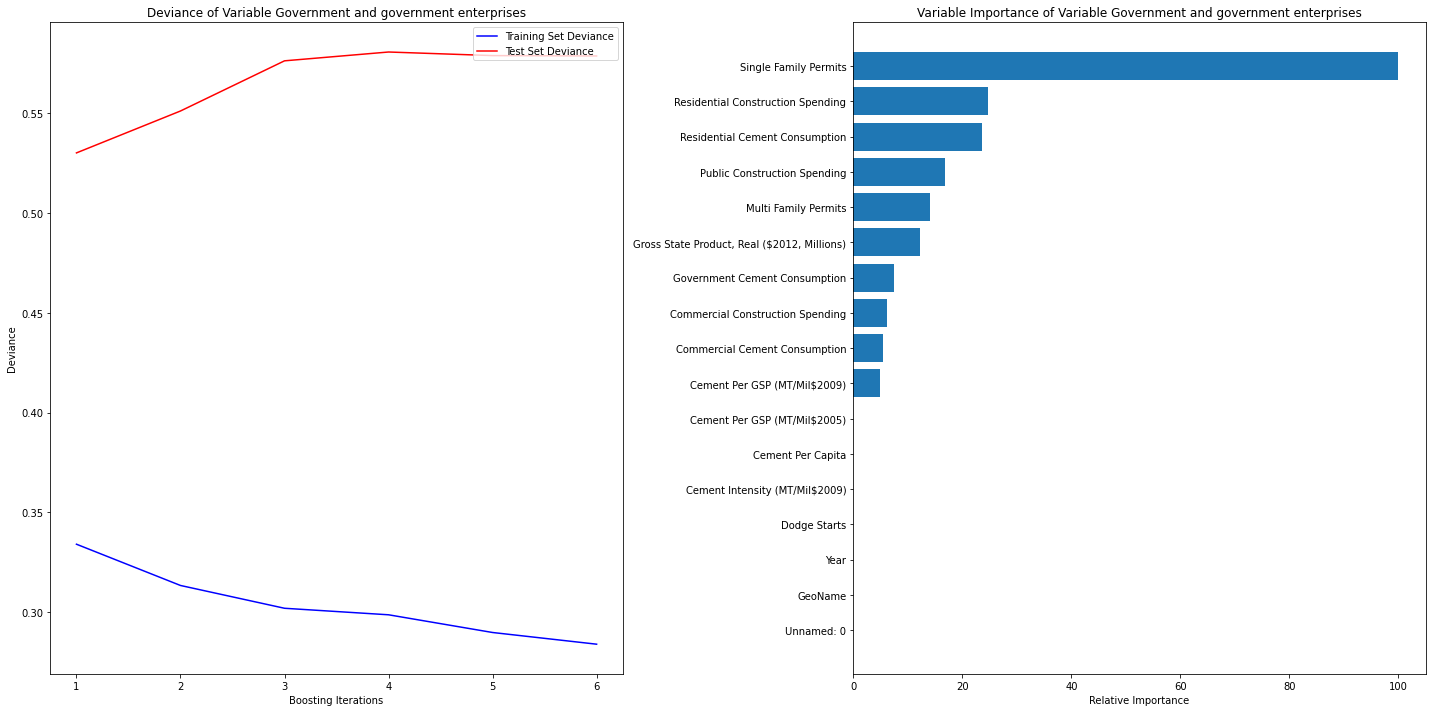

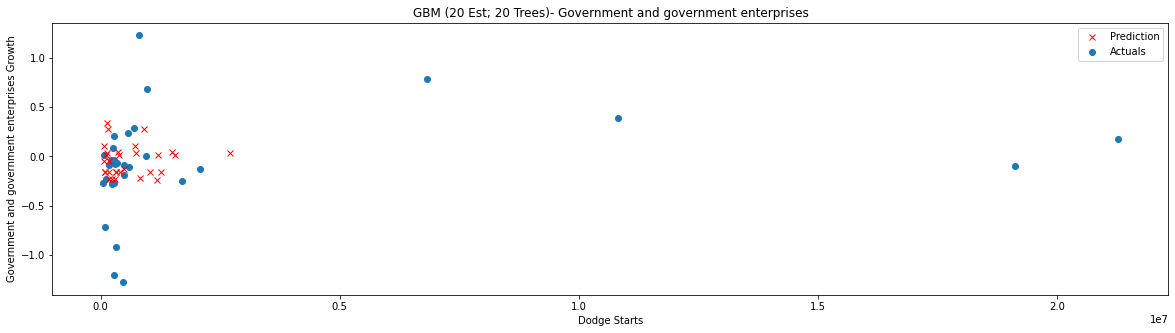

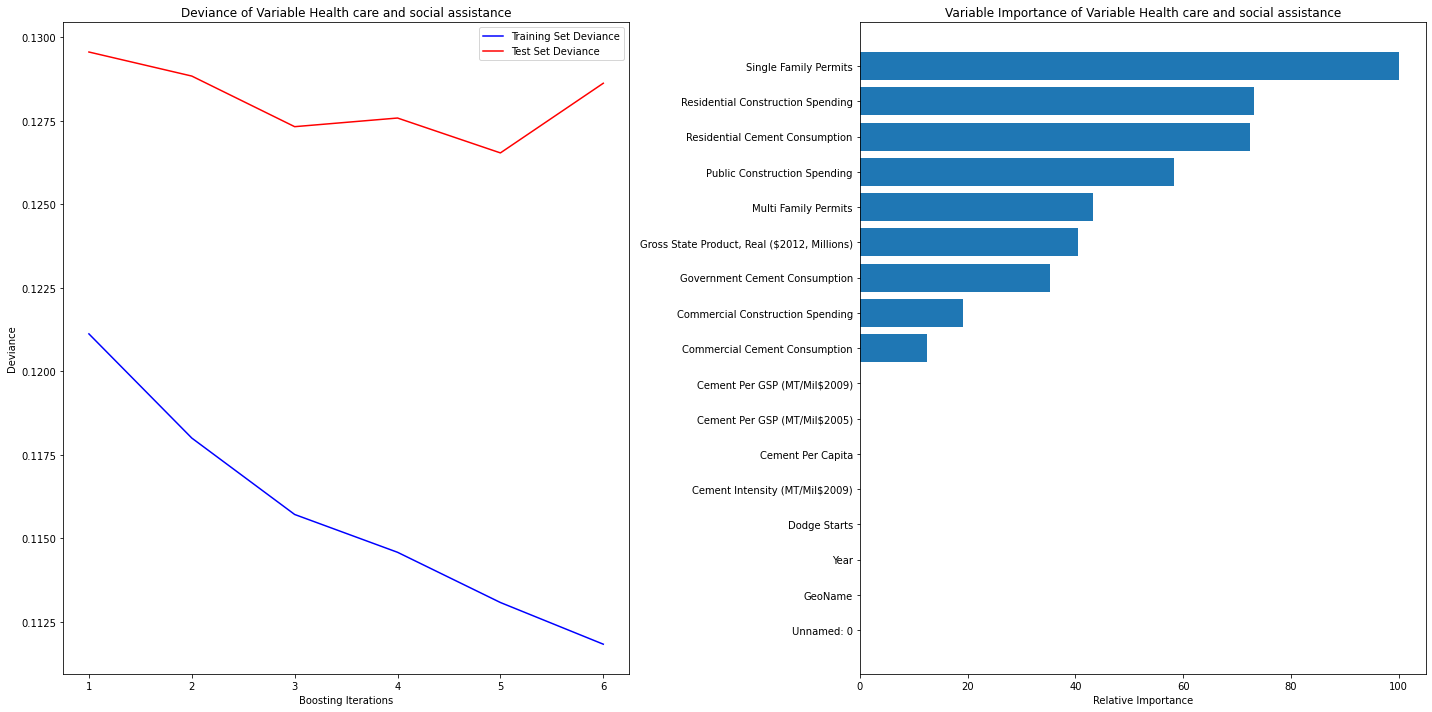

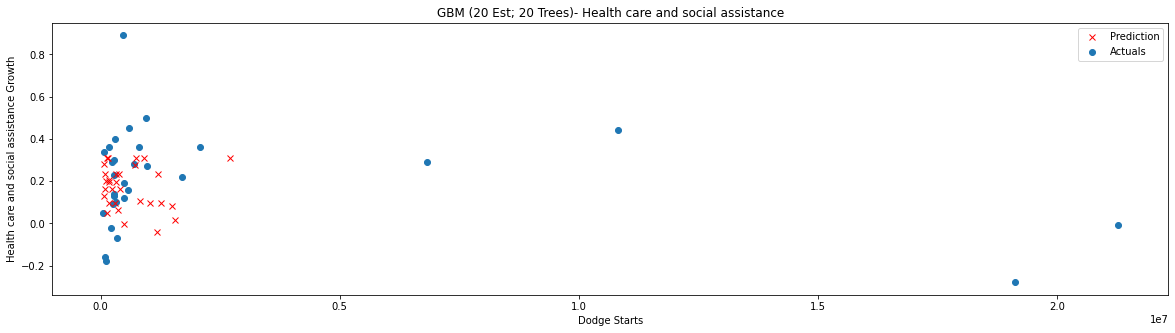

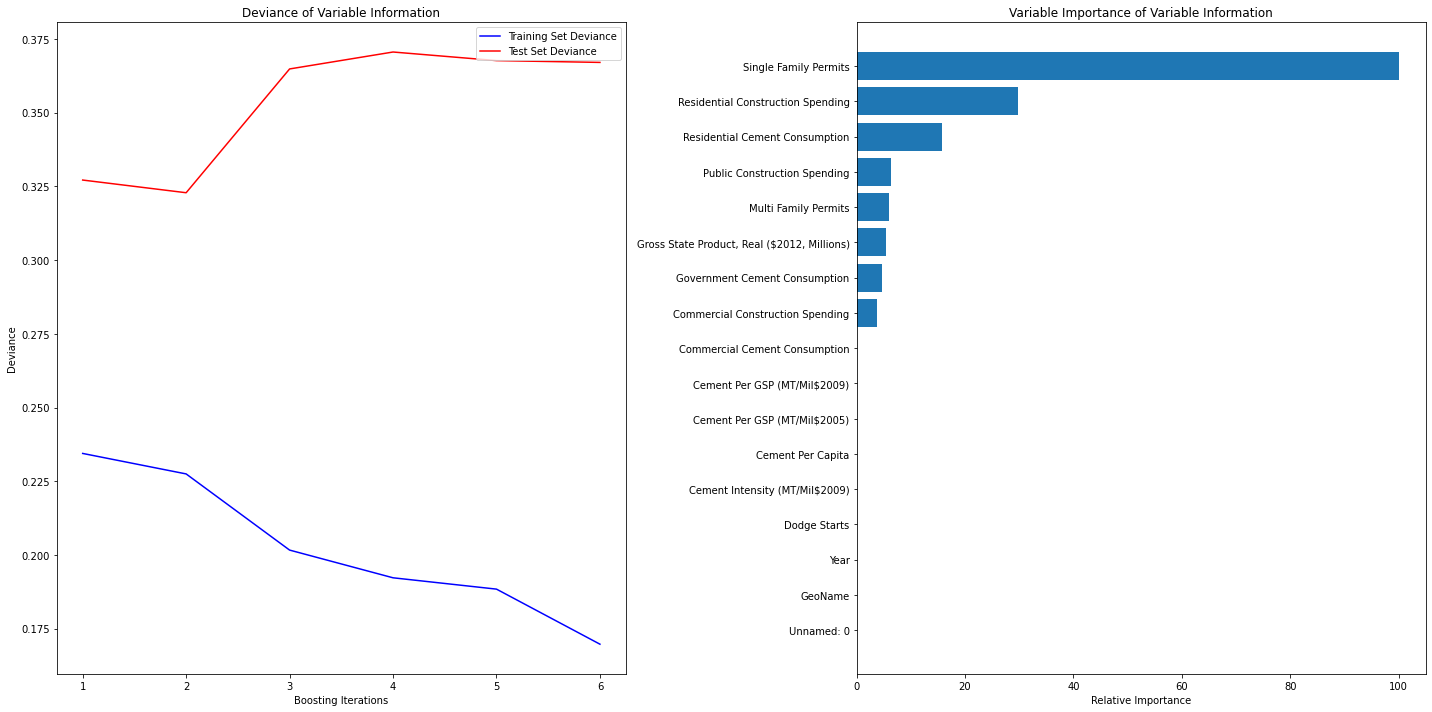

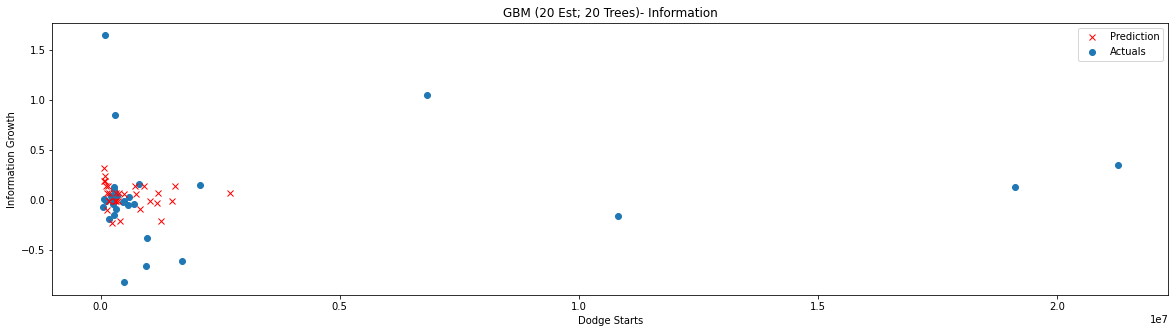

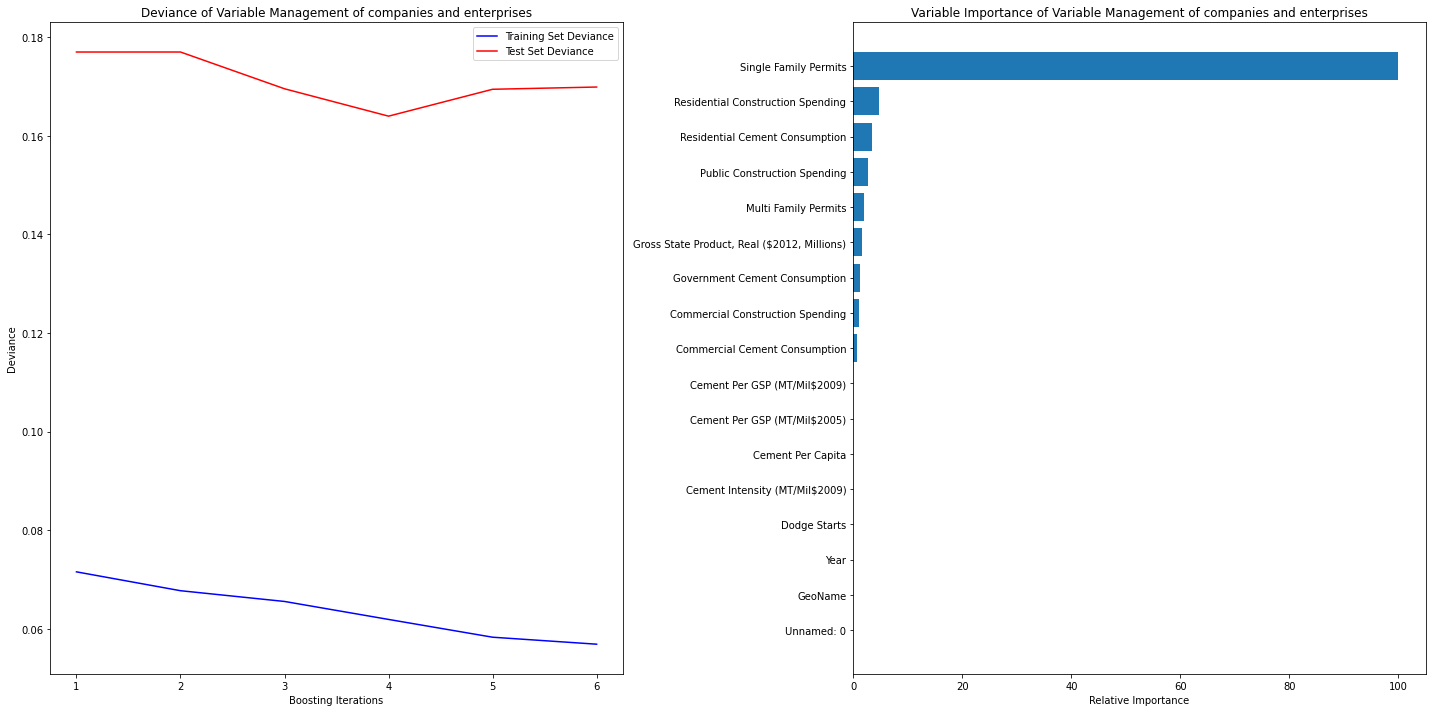

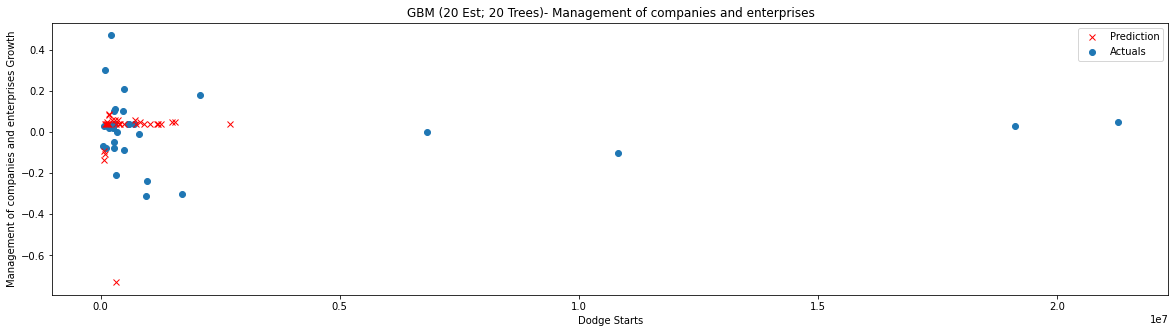

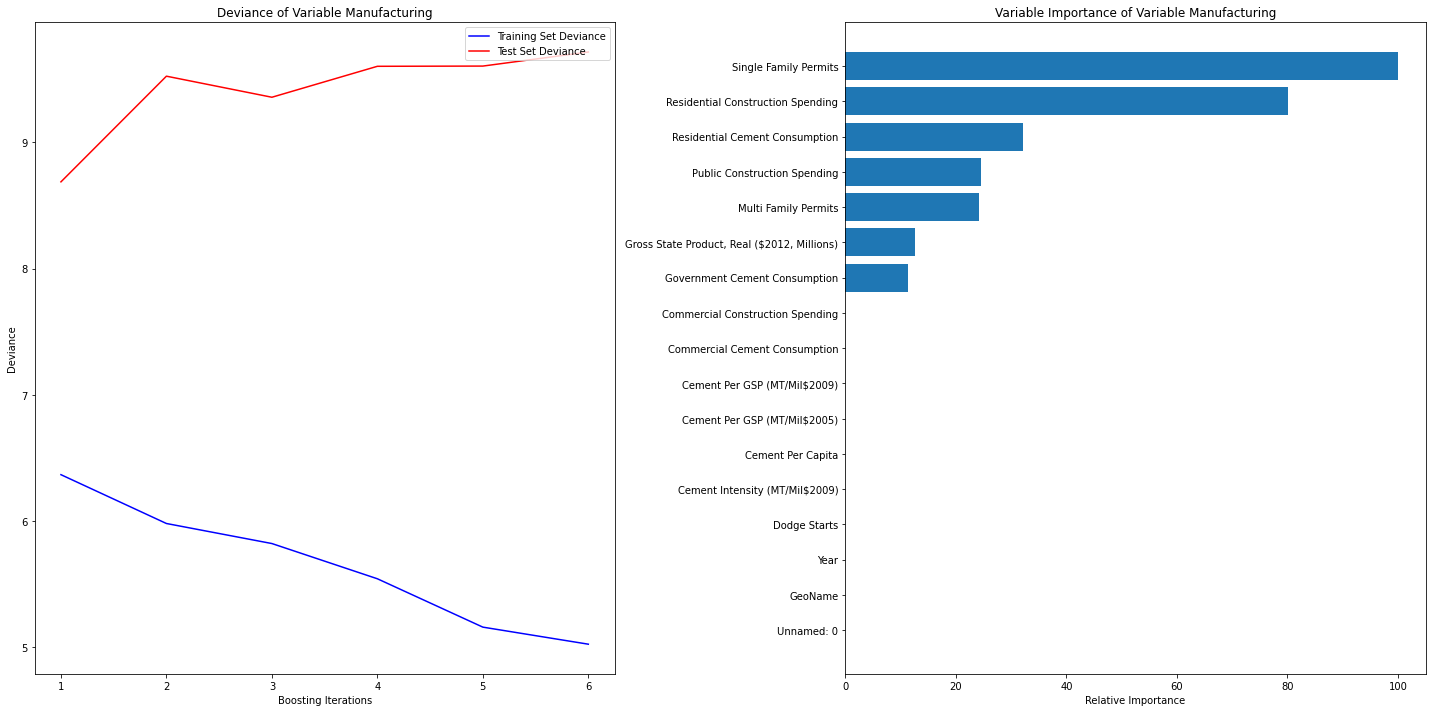

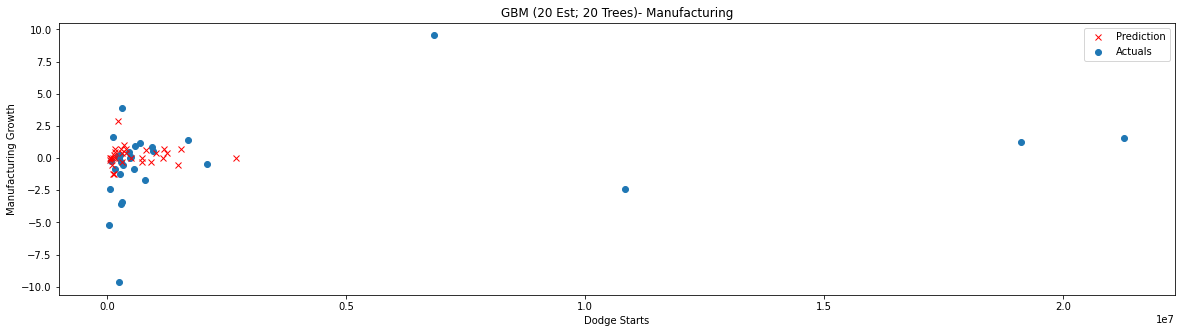

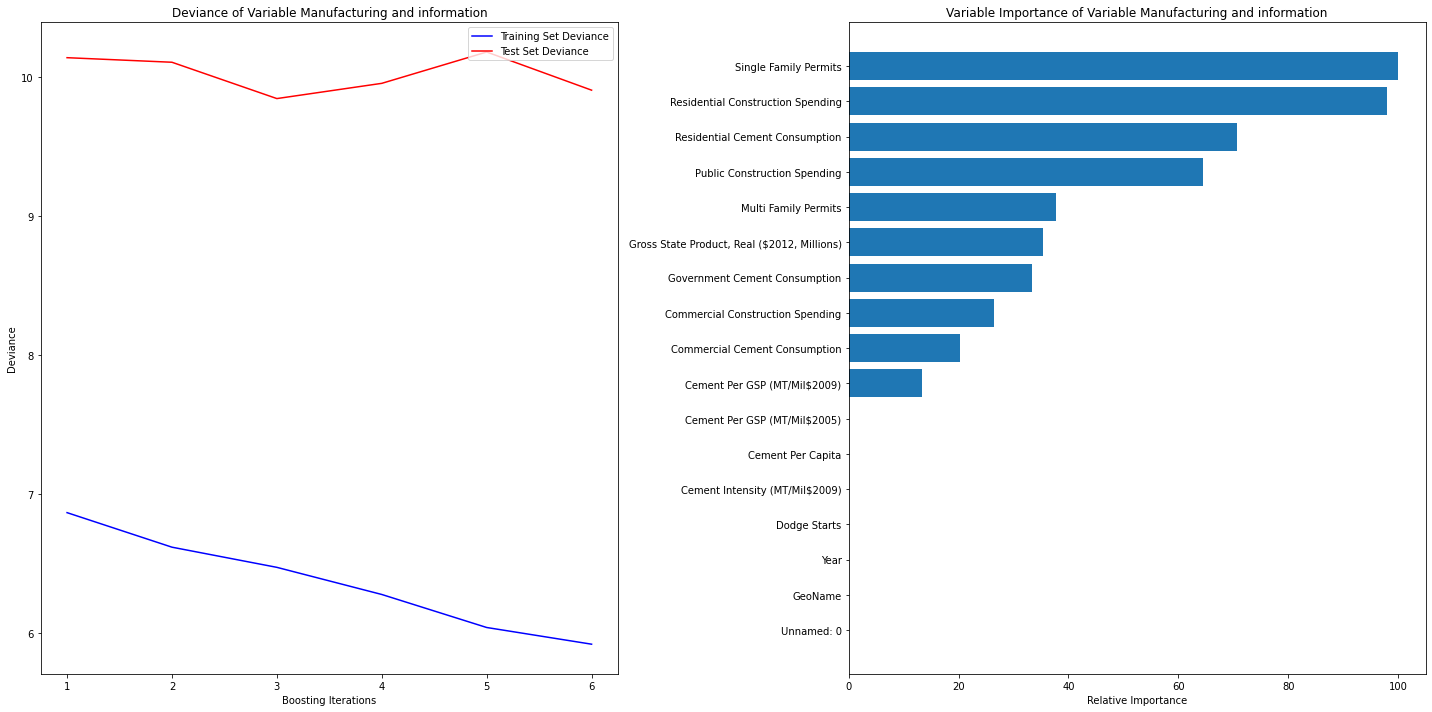

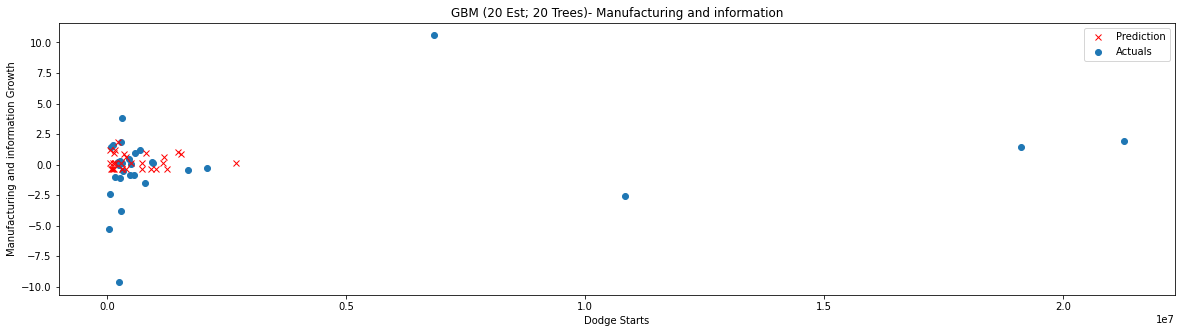

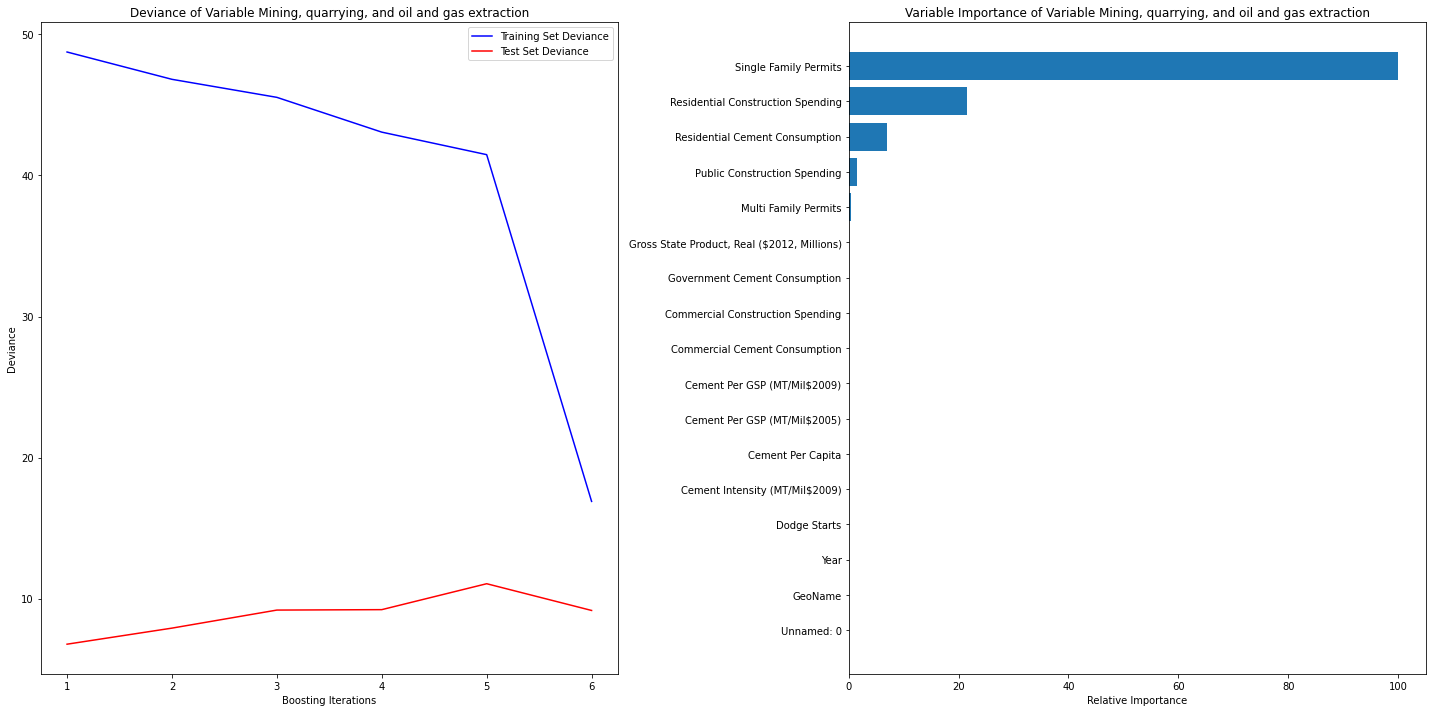

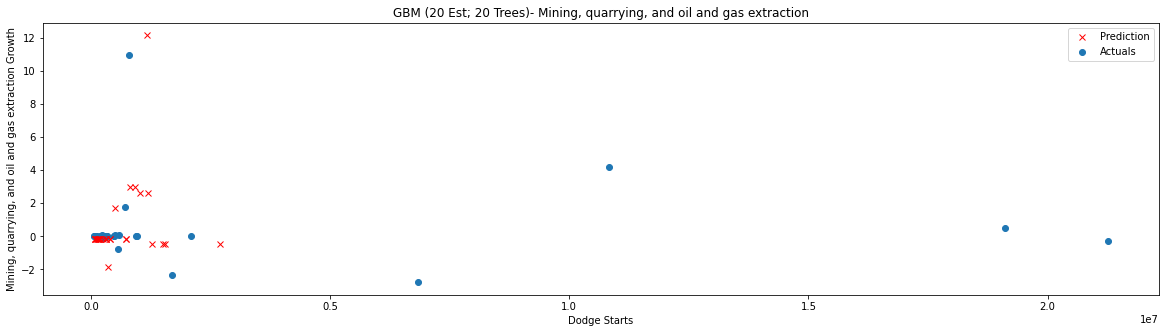

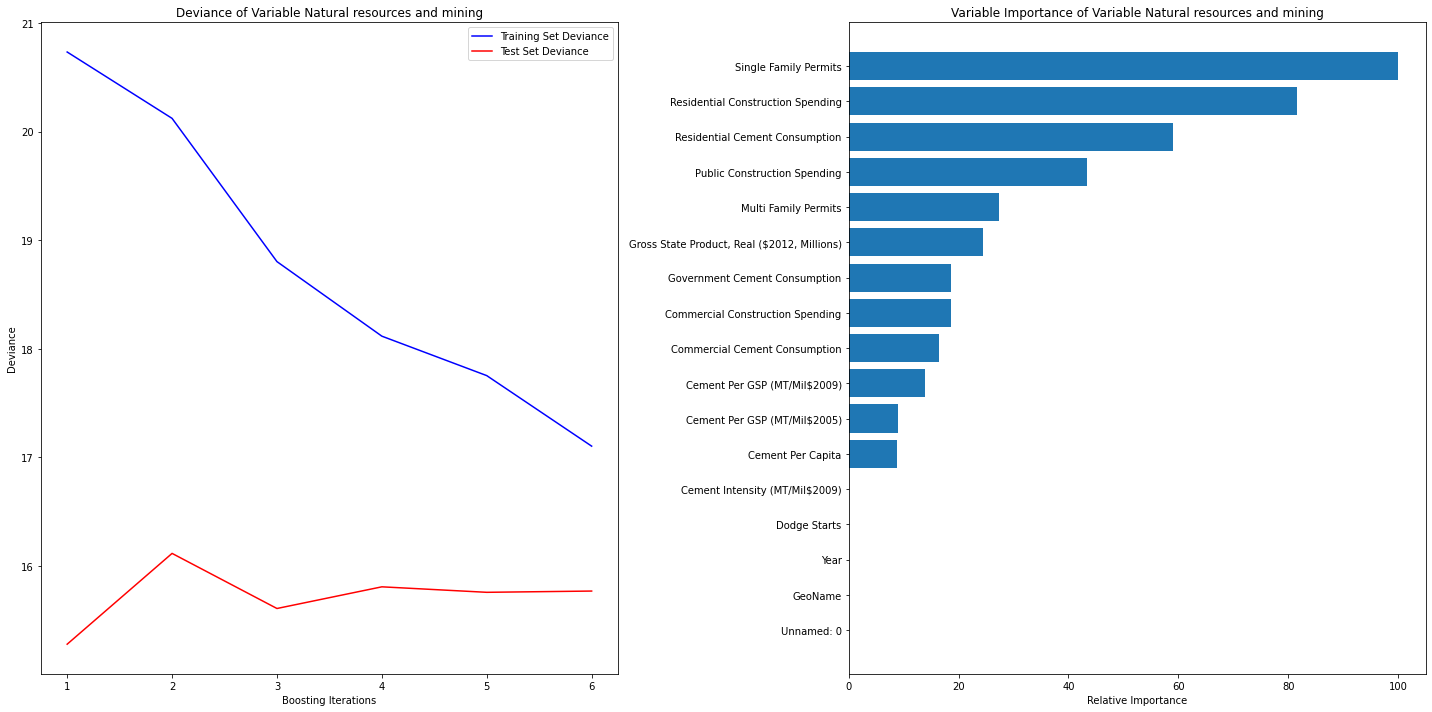

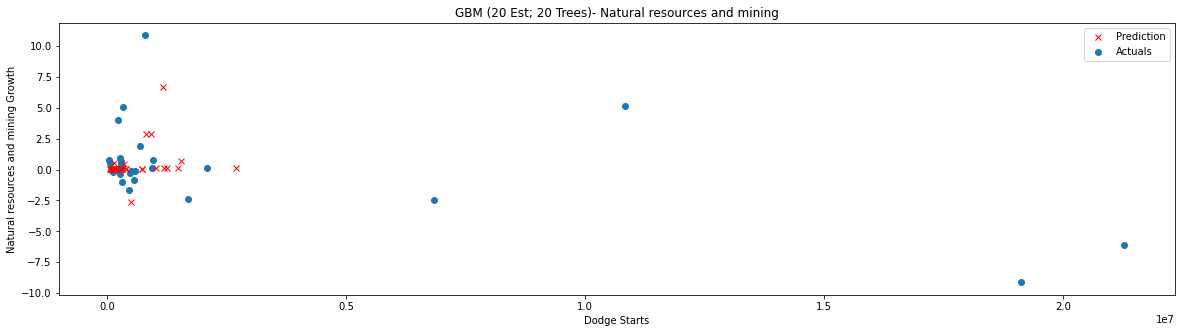

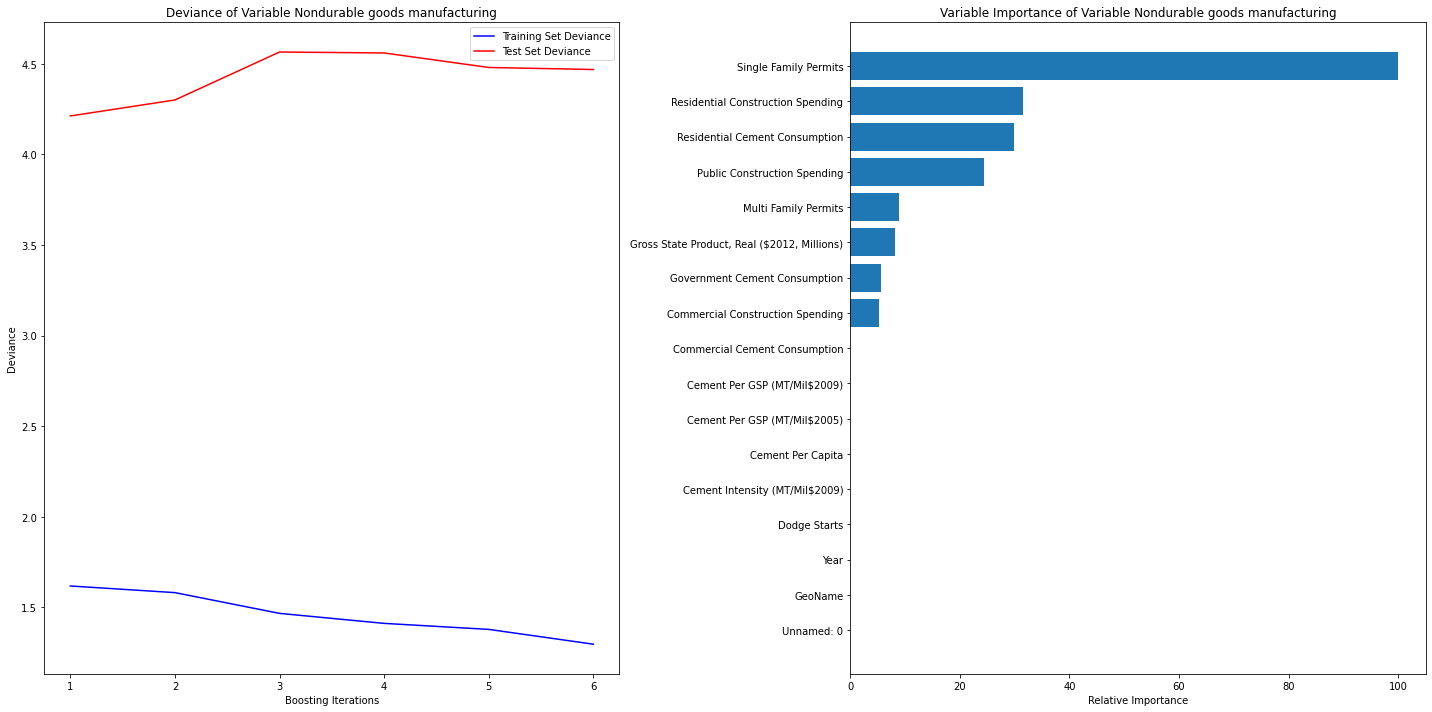

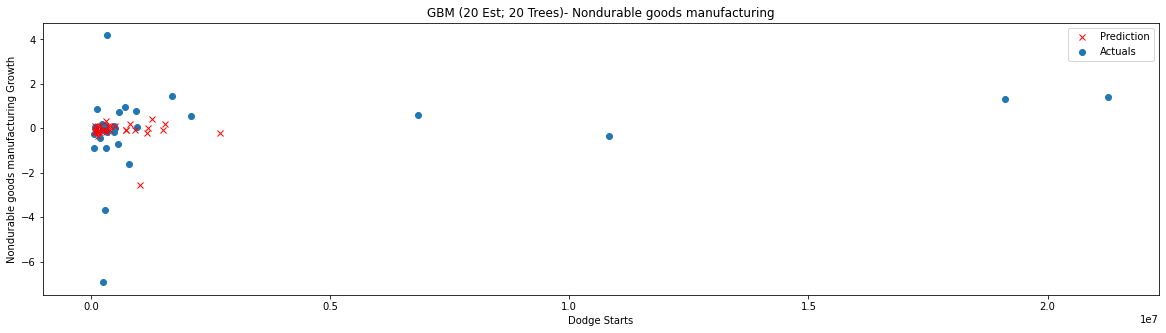

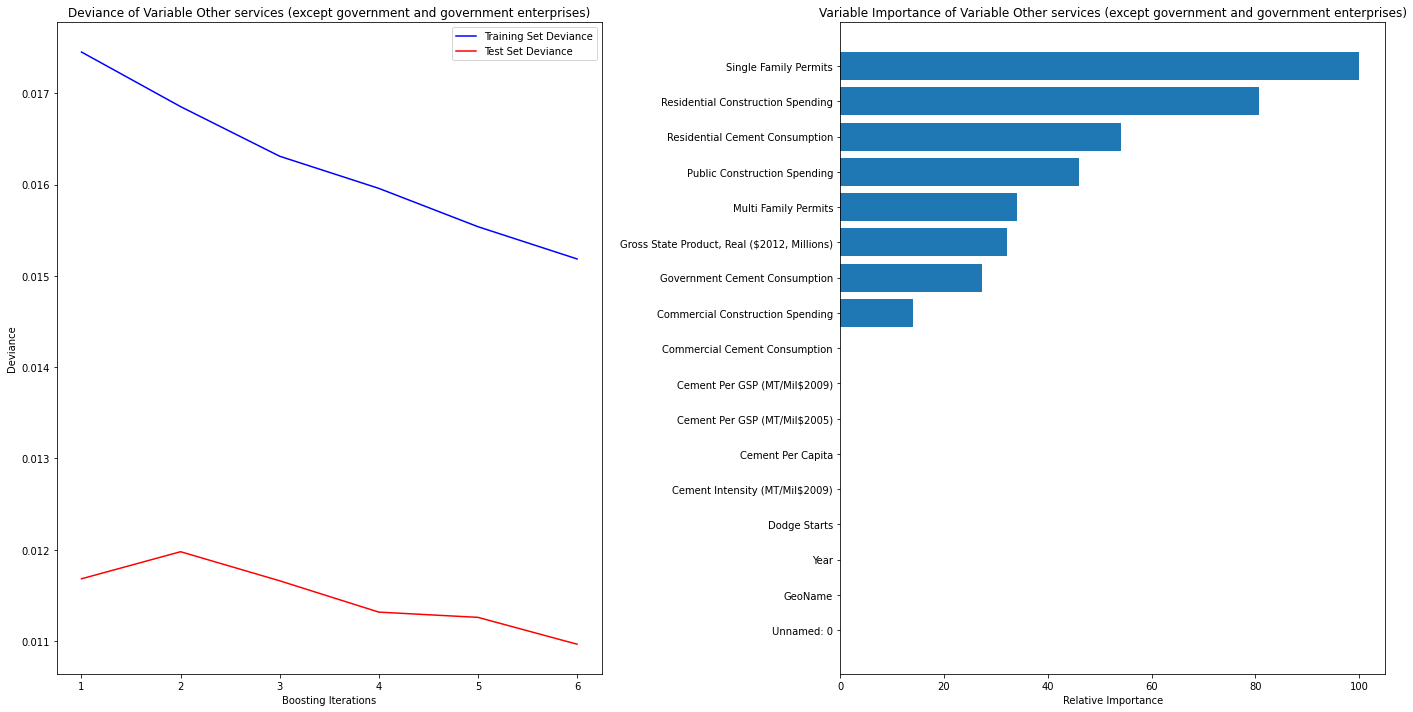

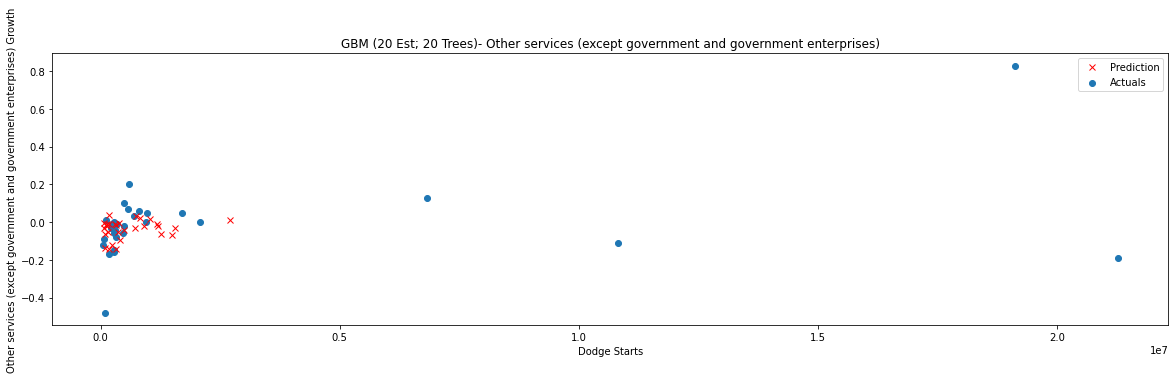

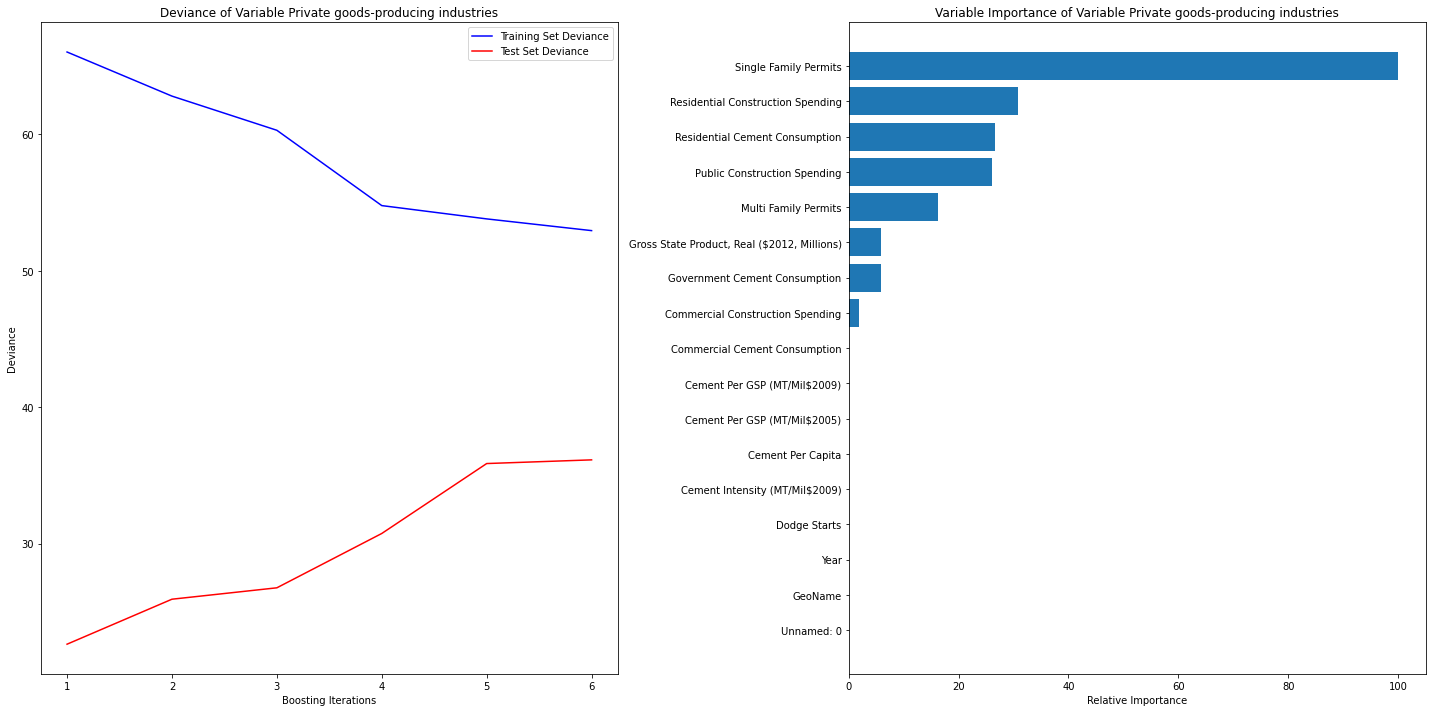

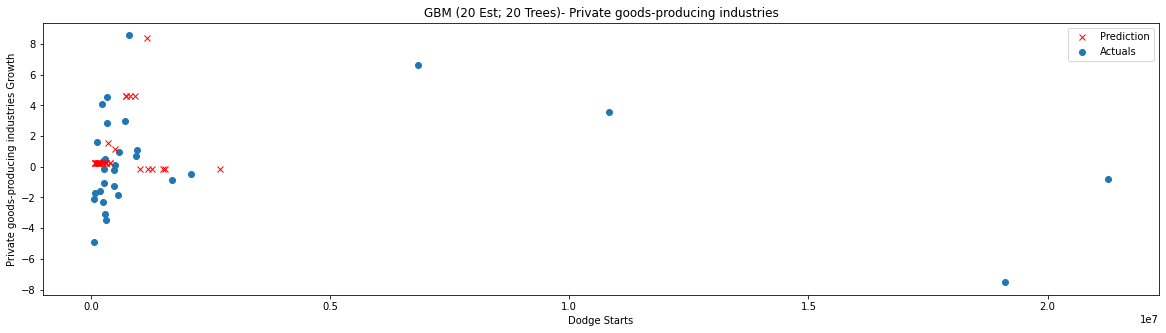

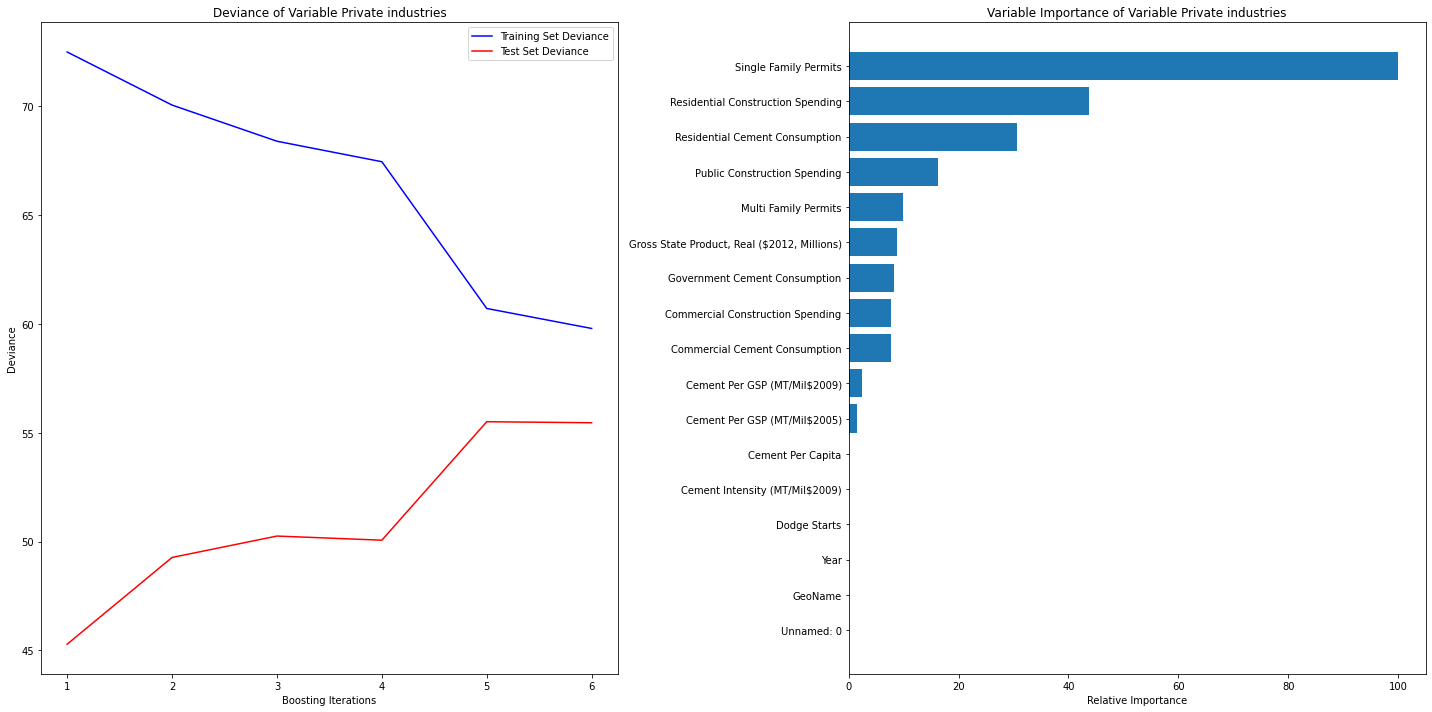

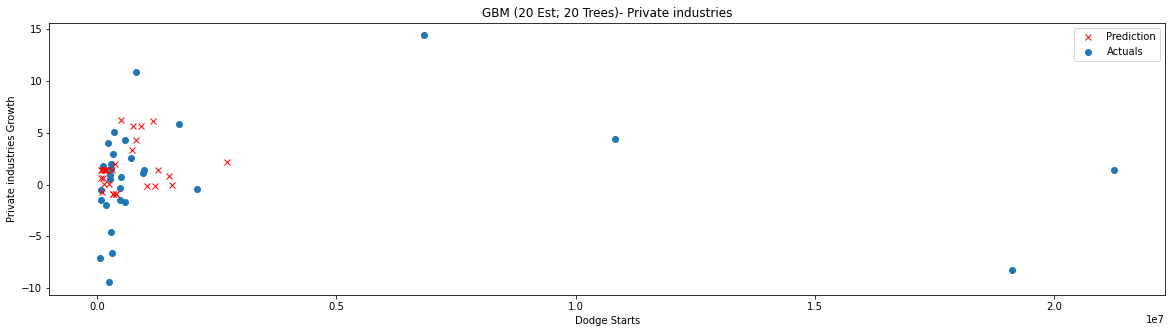

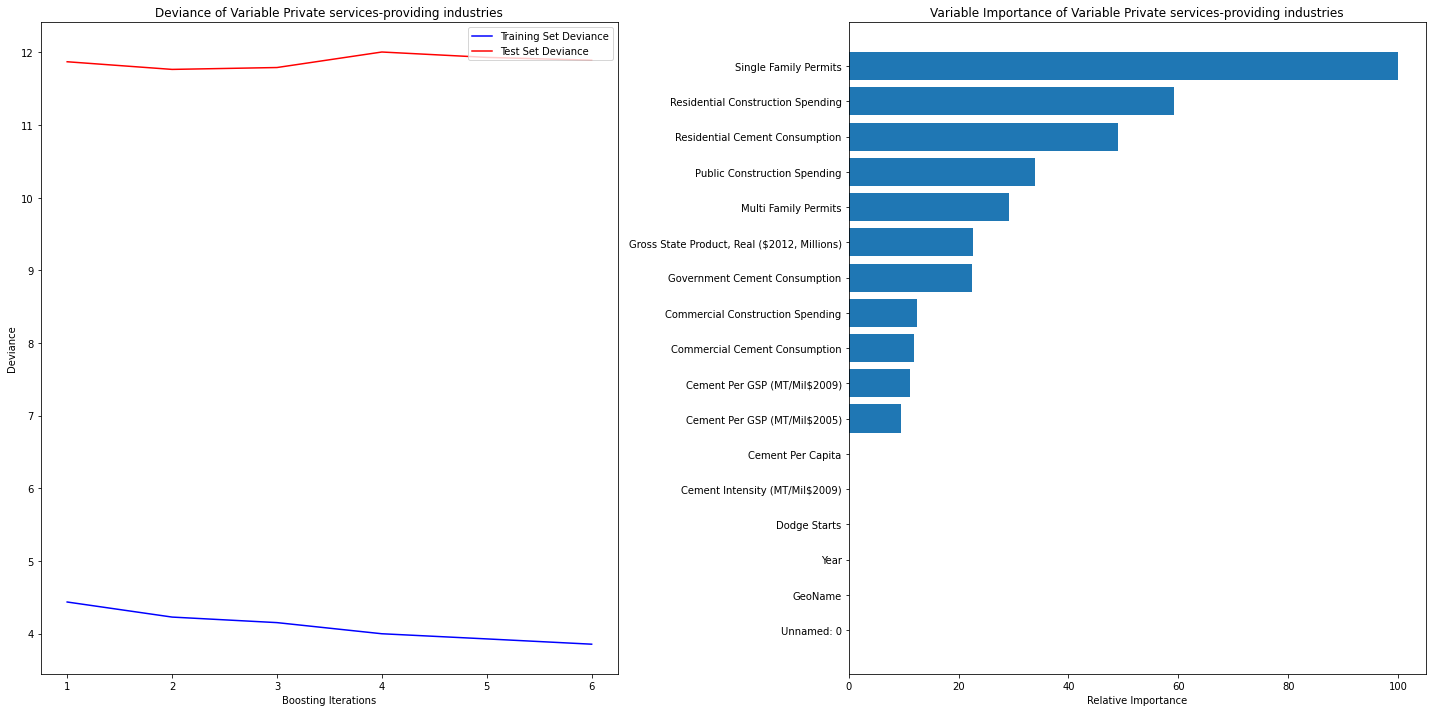

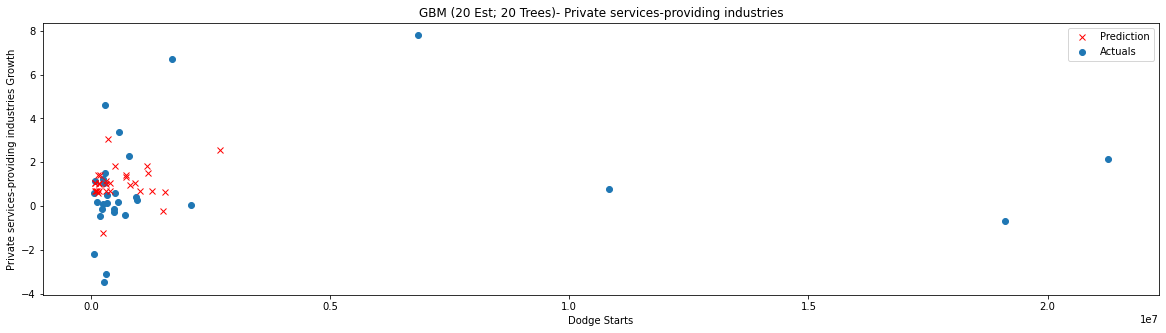

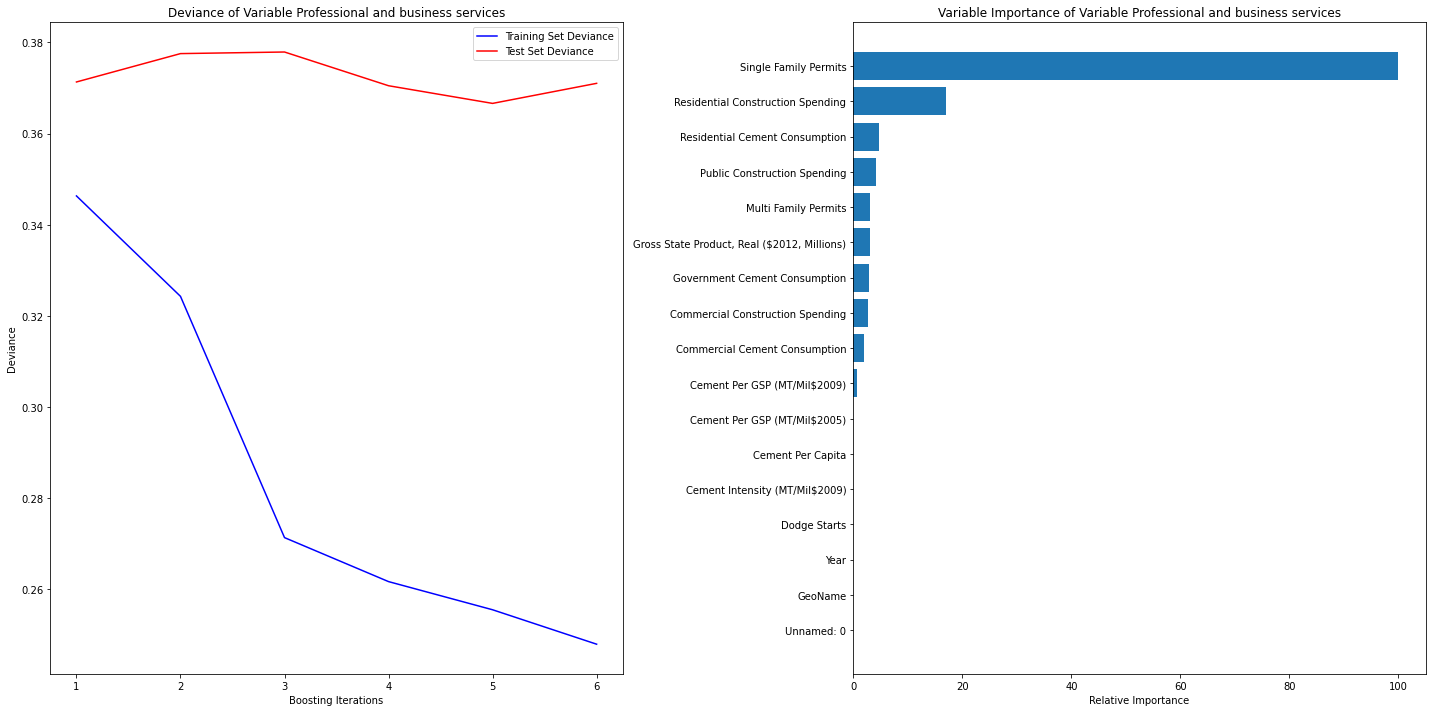

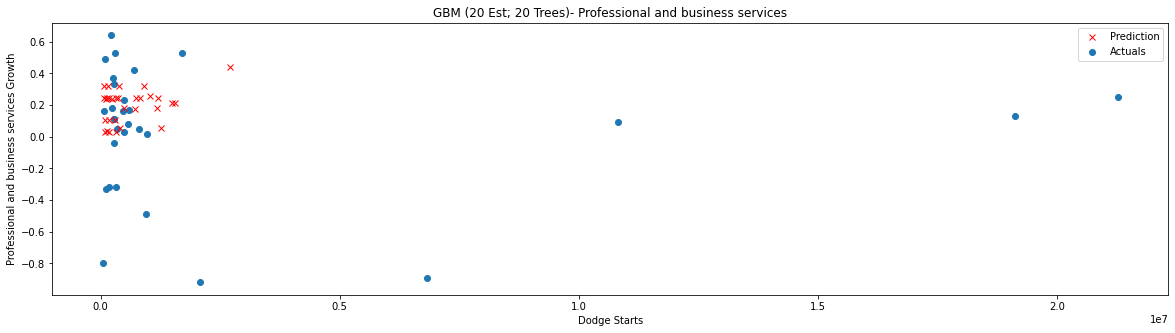

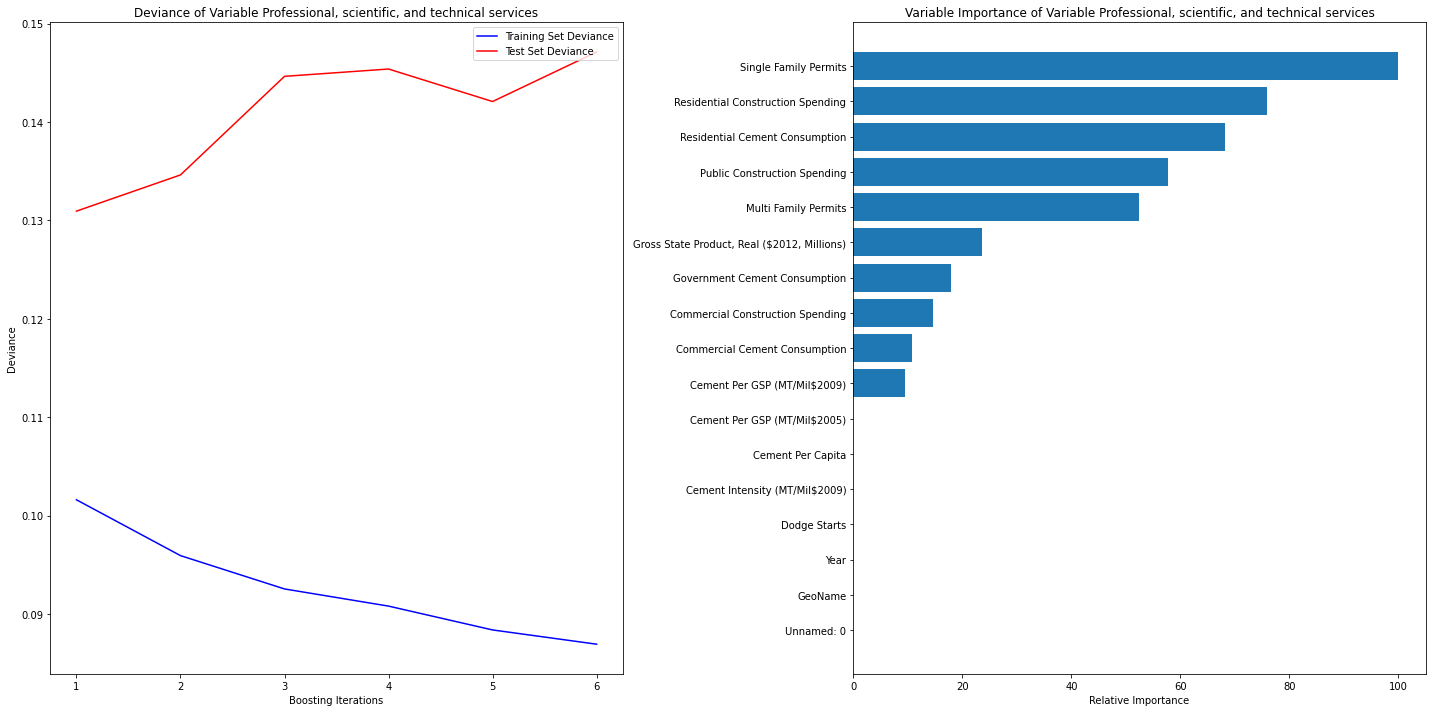

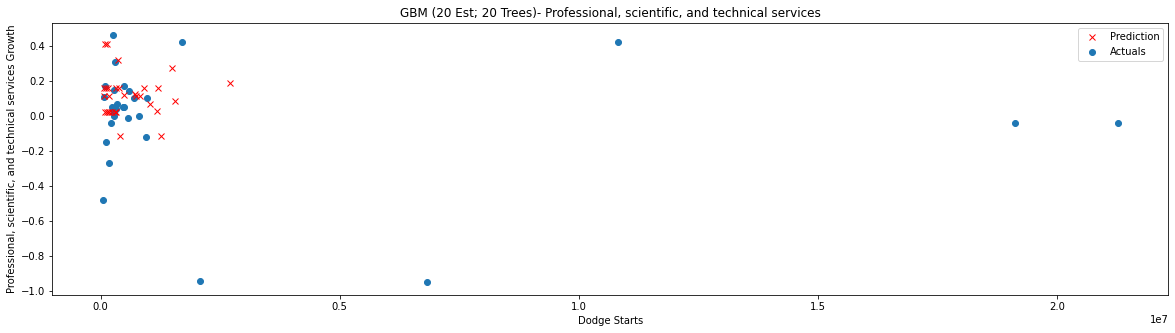

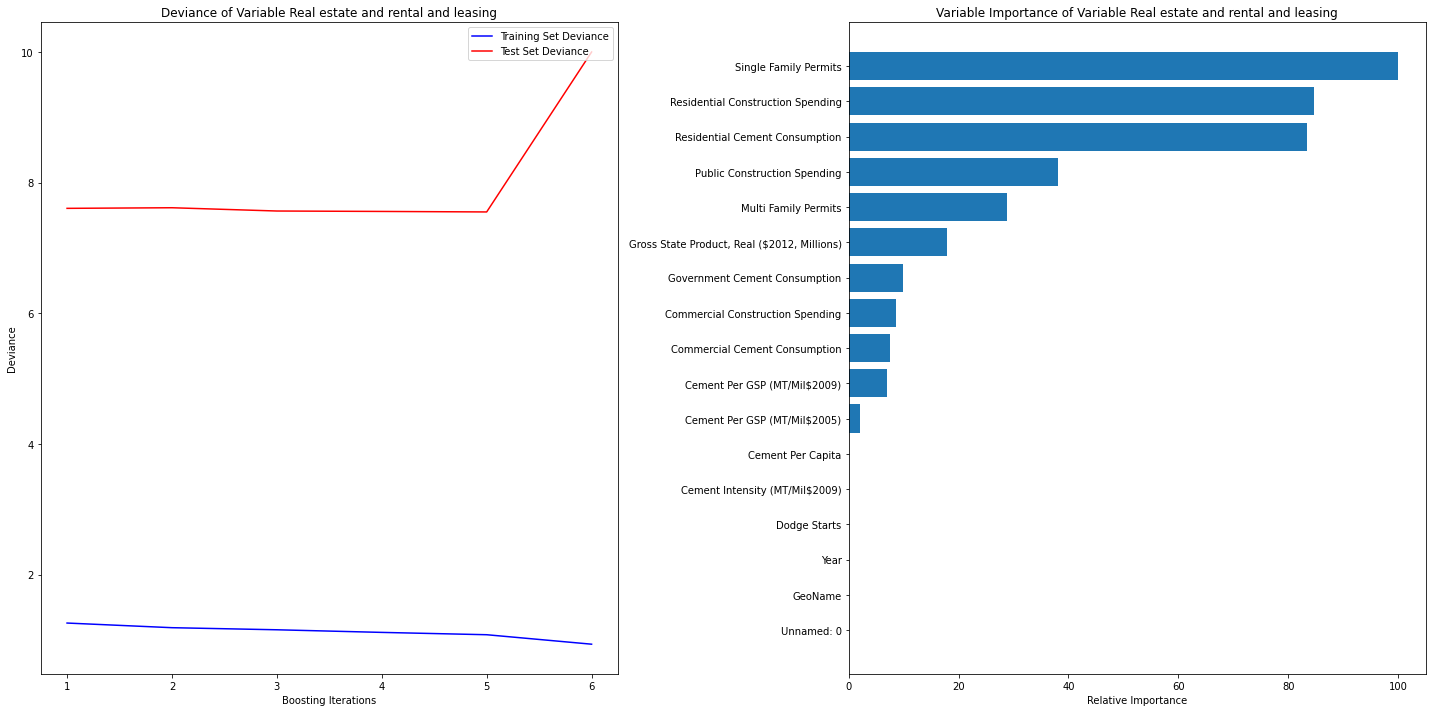

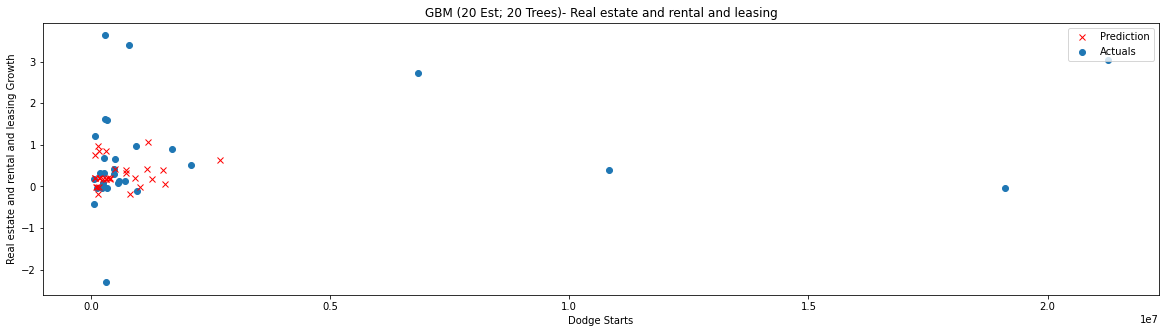

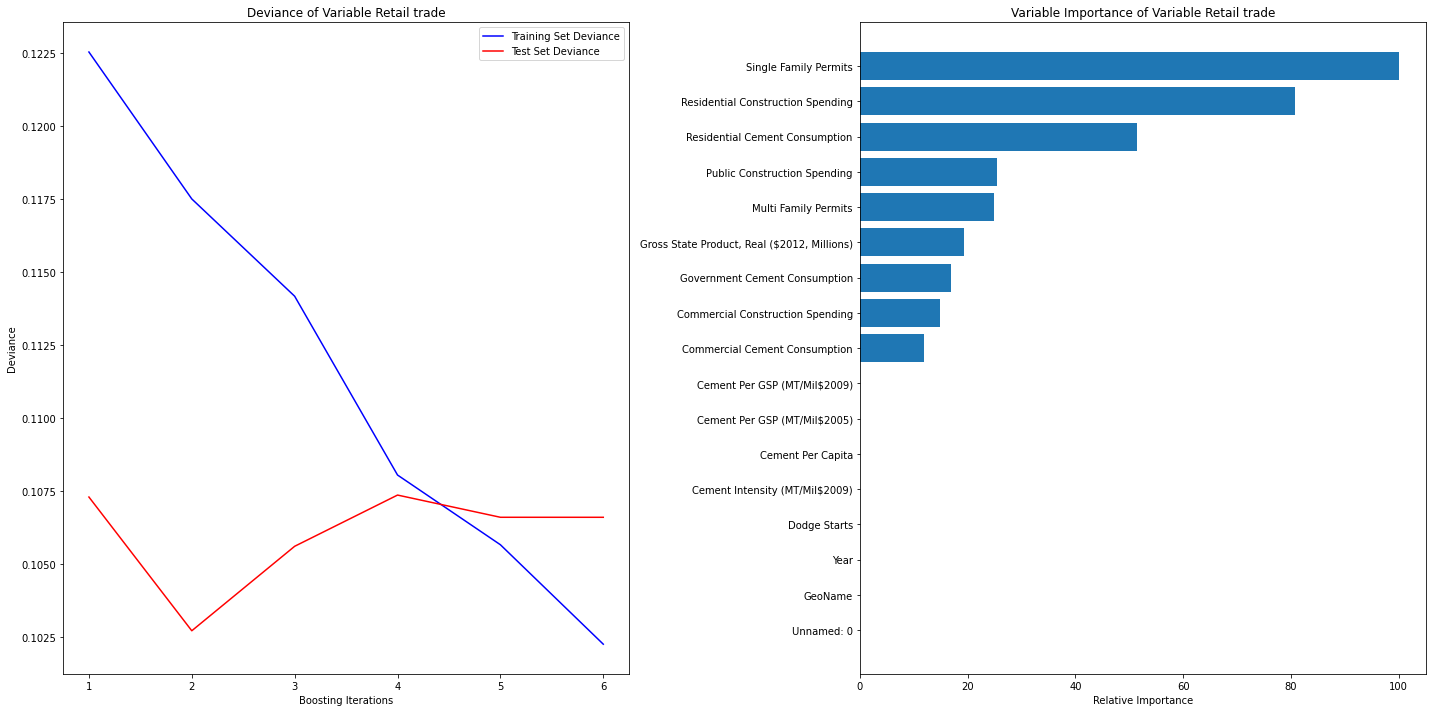

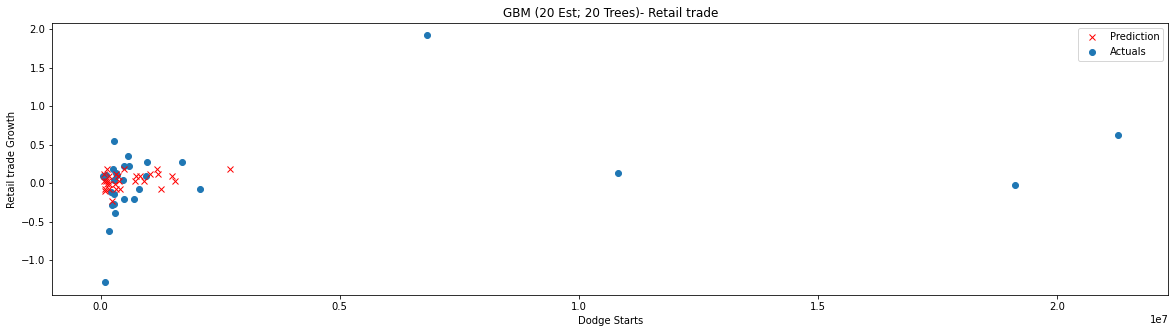

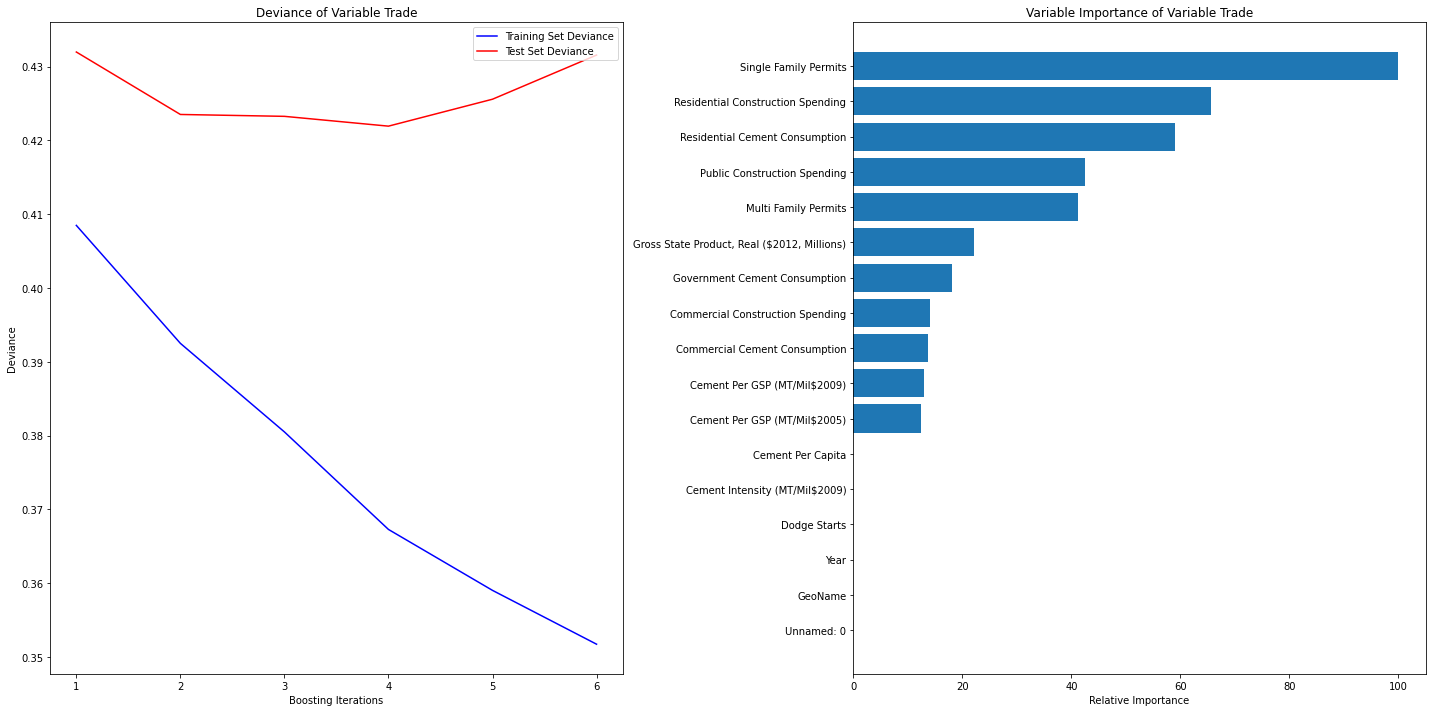

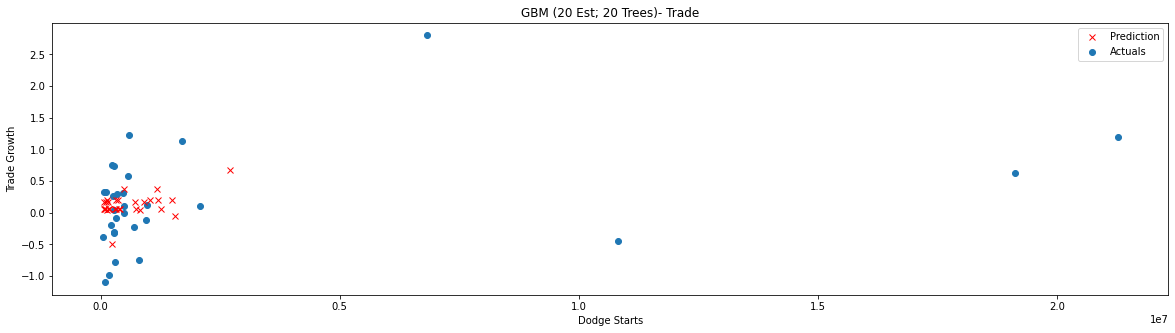

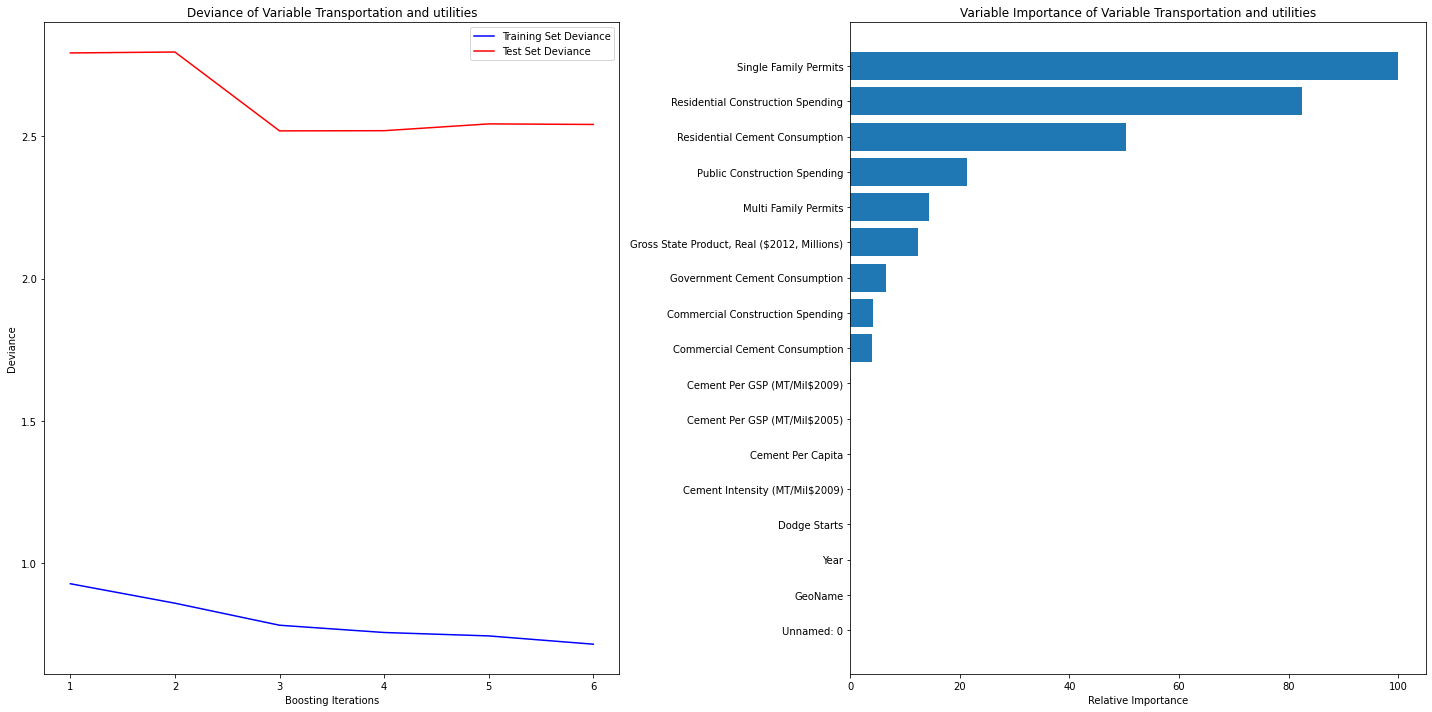

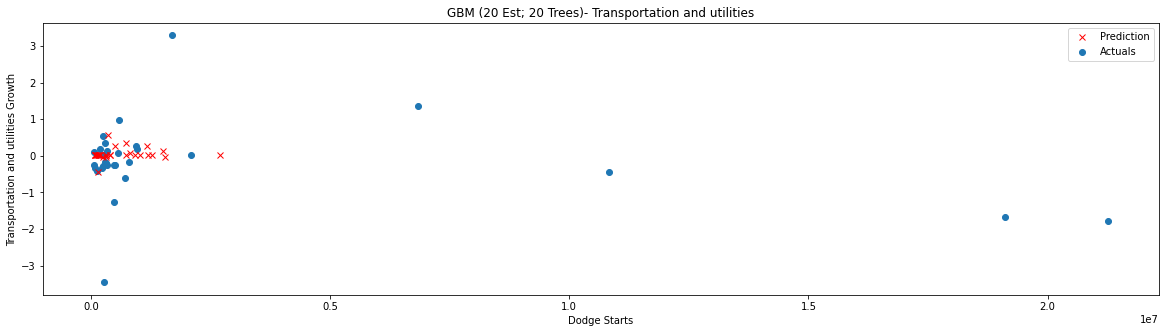

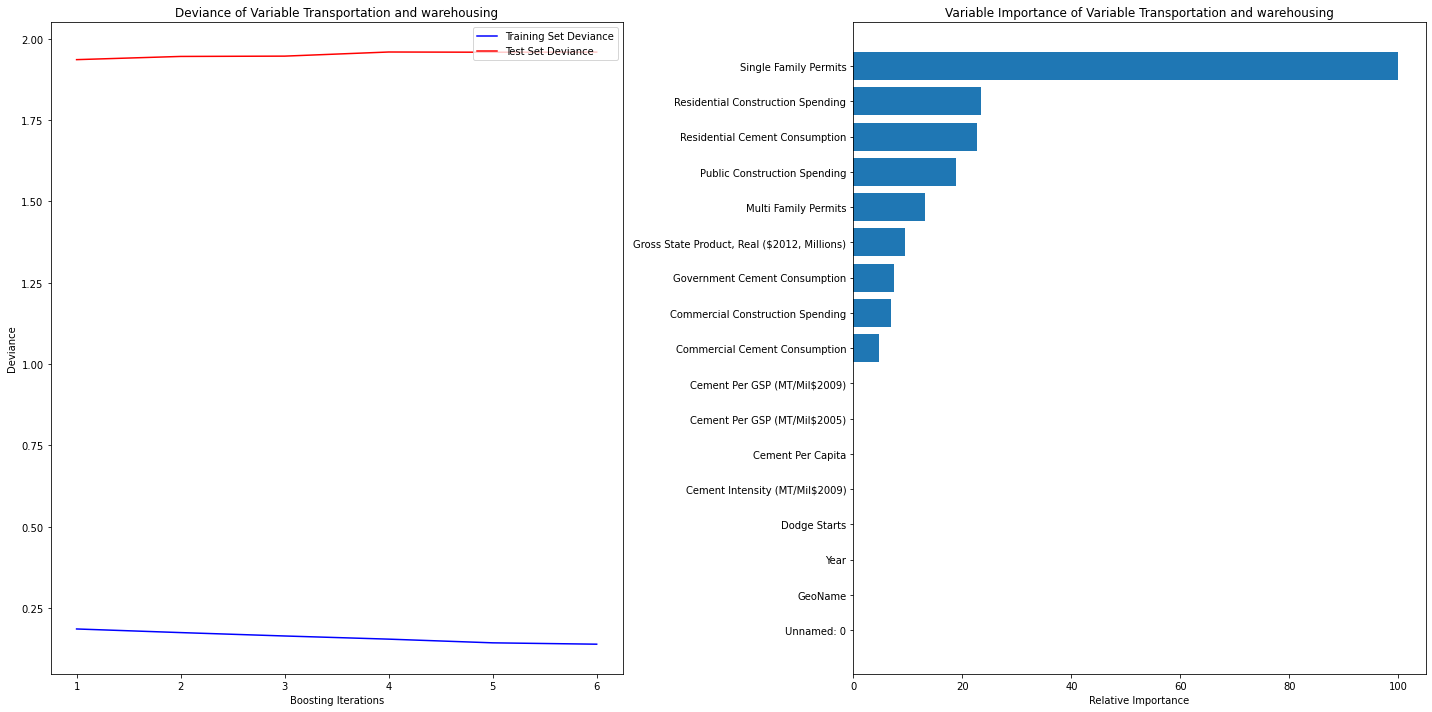

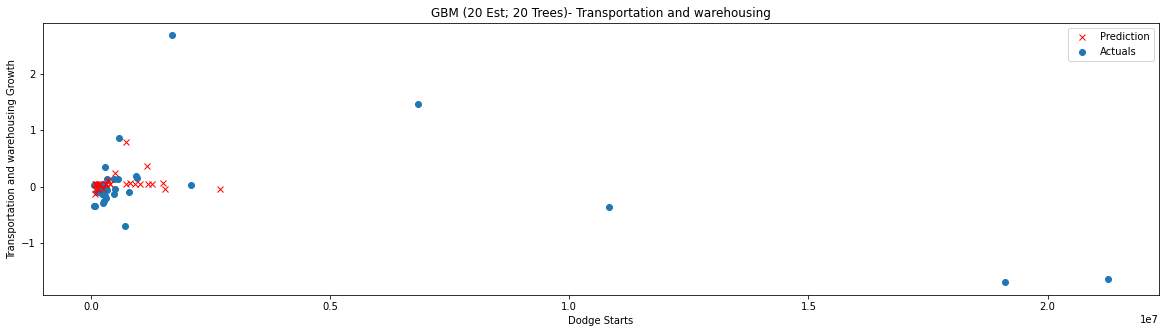

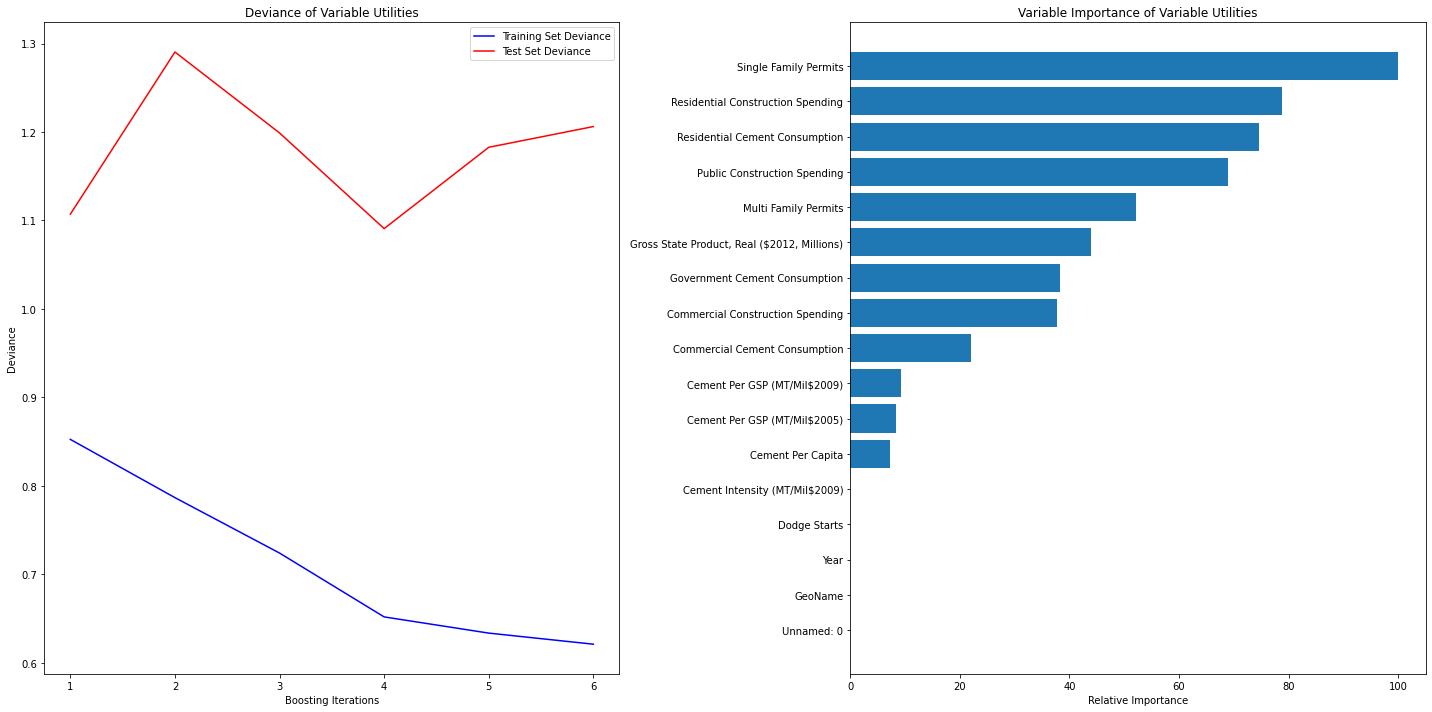

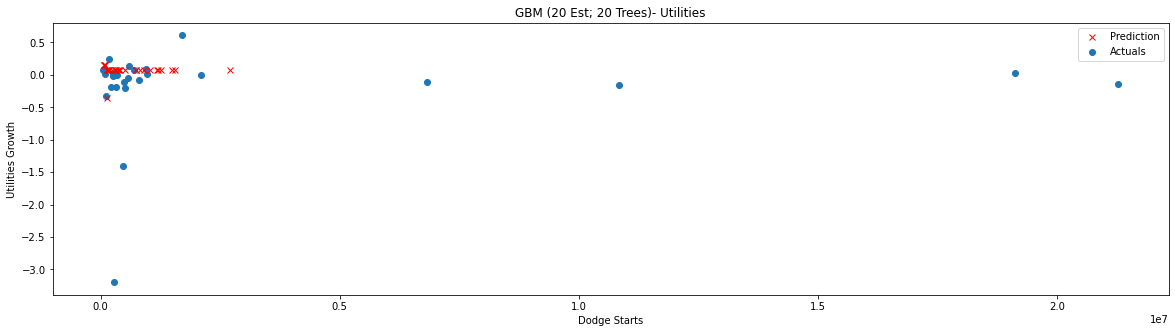

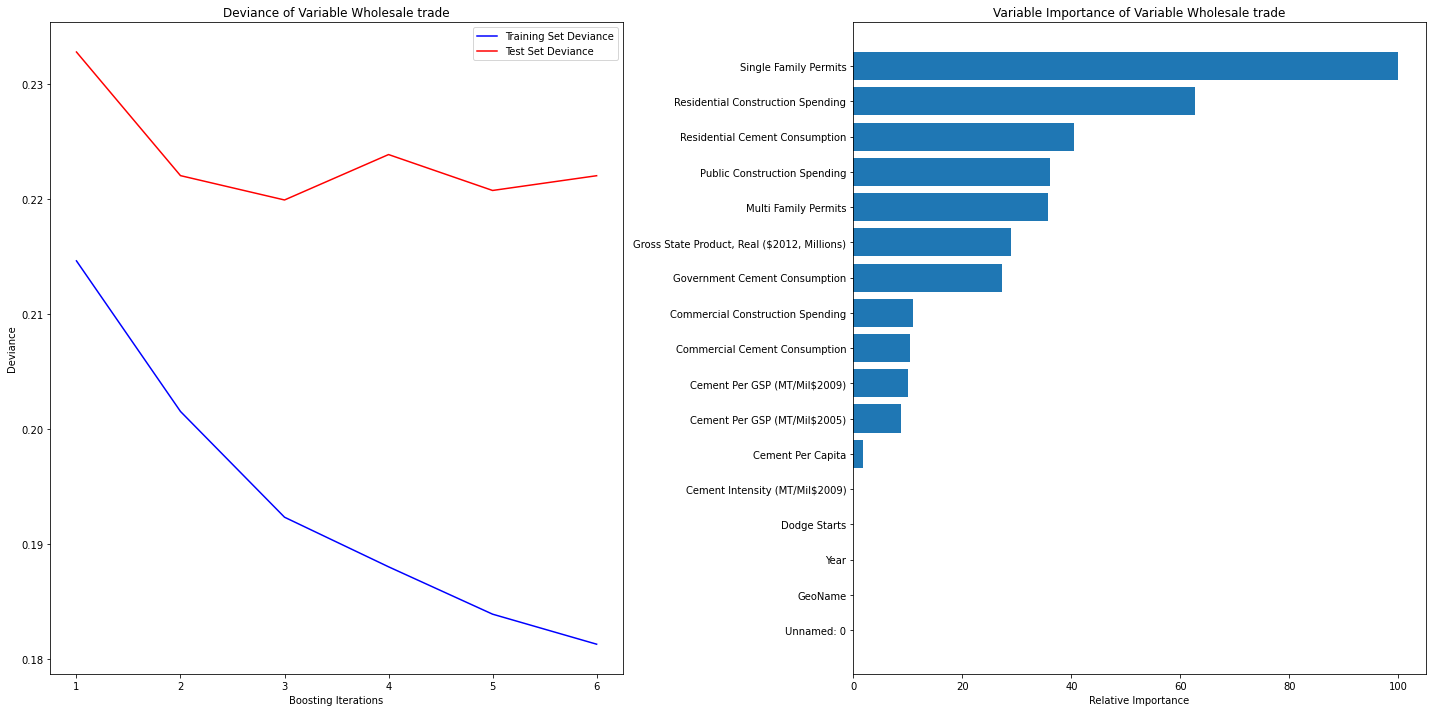

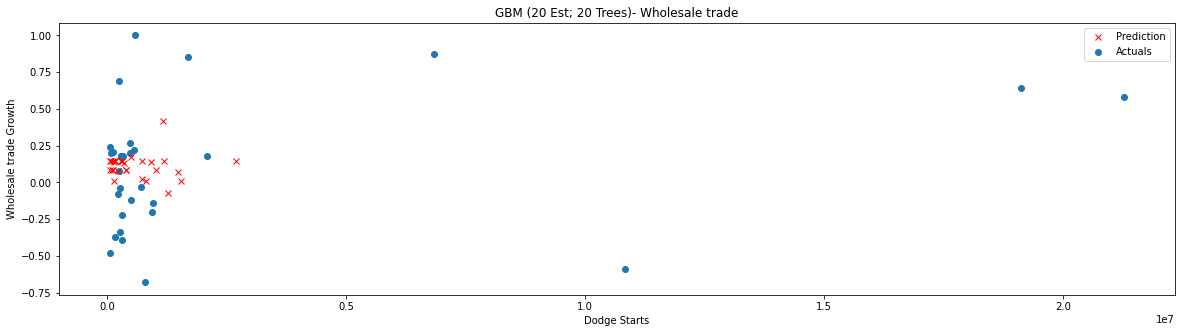

In [21]:
#####using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#var=['Cement Per Capita','Commercial Construction Spending',"Unemployment Rate (%)",'Gross State Product, Real ($2012, Millions)','Transportation and utilities','Transportation and warehousing',]

#label="Construction"
os.chdir(grad_boost_img) ###CHANGE DIRECTORY OF IMAGES
########################################
params = {
    'n_estimators': 6,
    'max_depth': 2,
    'learning_rate': .9,
    'criterion': 'mse'}
#########################################
var=var_pca
df_pred_grad_boost=pd.DataFrame()
for label in var_bed:
  df_train_var=df_train[var_pca]
  df_train_label=df_train[label]
  df_val_var=df_val[var_pca]
  df_val_label=df_val[label]
  
  clf = ensemble.GradientBoostingRegressor(**params)
  clf.fit(df_train_var, df_train_label)
  # compute test set deviance
  test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

  for i, y_pred in enumerate(clf.staged_predict(df_val_var)):
      test_score[i] = clf.loss_(df_val_label, y_pred)

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title('Deviance of Variable {}'.format(label))
  plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
          label='Training Set Deviance')
  plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
          label='Test Set Deviance')
  plt.legend(loc='upper right')
  plt.xlabel('Boosting Iterations')
  plt.ylabel('Deviance')
  #axes=plt.gca()
  #axes.set_ylim([0,1.8])

# #############################################################################
# Plot feature importance
#plt.figure(figsize=(10,5))
  feature_importance = clf.feature_importances_
# make importances relative to max importance
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplot(1, 2, 2)
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  plt.yticks(pos, df_final.columns)
  plt.xlabel('Relative Importance')
  plt.title('Variable Importance of Variable {}'.format(label))
  plt.tight_layout()

  plt.savefig("Gradient_boost_{}.png".format(label))
  plt.show()

  #'Total Construction Spending',
  plt_var='Dodge Starts'
  plt.figure(figsize=(20, 5))
  plt.title('GBM (20 Est; 20 Trees)- {}'.format(label))
  plt.scatter(df_train[plt_var][0:30], df_train_label[0:30],label="Actuals")
  plt.plot(df_val[plt_var][0:30], clf.predict(df_val_var[0:30]),'x',color='r',label="Prediction")
  plt.xlabel(plt_var)
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("Gradient_boost_predictions_{}.png".format(label))
  plt.show()
  clf.fit(df_final_rand[var_pca], df_final_rand[label])
  df_pred_grad_boost=pd.concat([df_pred_grad_boost,pd.DataFrame(clf.predict(df_pca_test),columns=[label])],axis=1)
  

In [0]:
df_pred_grad_boost_final=pd.concat([df_complete_pca_test.reset_index()[["Year","MSA","State_acro"]],df_pred_grad_boost,],axis=1)
df_pred_grad_boost_final=df_pred_grad_boost_final.sort_values(["MSA","Year"])

In [67]:
os.chdir(base_dir)
df_pred_grad_boost_final.to_csv("df_pred_gb_v2.csv",index=False)
df_pred_grad_boost_final

Year                      MSA  ... Utilities  Wholesale trade
222  2019  Albany-Schenectady-Troy  ...  0.033555        -0.474186
224  2020  Albany-Schenectady-Troy  ...  0.033555        -0.390932
226  2021  Albany-Schenectady-Troy  ...  0.033555        -0.390932
228  2022  Albany-Schenectady-Troy  ...  0.033555        -0.390932
230  2023  Albany-Schenectady-Troy  ...  0.033555        -0.390932
..    ...                      ...  ...       ...              ...
335  2020                   Yakima  ...  0.033555         0.105902
338  2021                   Yakima  ...  0.033555         0.105902
341  2022                   Yakima  ...  0.033555         0.105902
344  2023                   Yakima  ...  0.033555         0.105902
347  2024                   Yakima  ...  0.033555         0.105902

[594 rows x 37 columns]

In [22]:
mean_squared_error(df_val_label,clf.predict(df_val_var))

0.1866627499353248

In [0]:
######################################### DATA PREP FOR DEEP NEURAL NETWORKS & LSTM

df_train_label=df_train[label] ###Training data label
df_val_label=df_val[label] #Validation label
df_train_array=np.array(df_train[var_pca]) ##Train data numpy array
df_val_array=np.array(df_val[var_pca]) #Validation data numpy array
df_pca_test_array=np.array(df_pca_test)

dt=tf.expand_dims(df_train_array,axis=-1)
dv=tf.expand_dims(df_val_array,axis=-1)

dt_whole=tf.expand_dims(np.array(df_final_rand[var_pca]),axis=-1) ####Used to train entire dataset


dtest=tf.expand_dims(df_pca_test_array,axis=-1)

Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.0419 - mae: 0.2069 - val_loss: 0.1076 - val_mae: 0.3039
Epoch 2/6
1029/1029 [==============================] - 0s 264us/sample - loss: 0.0419 - mae: 0.2069 - val_loss: 0.1076 - val_mae: 0.3039
Epoch 3/6
1029/1029 [==============================] - 0s 268us/sample - loss: 0.0419 - mae: 0.2069 - val_loss: 0.1076 - val_mae: 0.3039
Epoch 4/6
1029/1029 [==============================] - 0s 259us/sample - loss: 0.0419 - mae: 0.2069 - val_loss: 0.1076 - val_mae: 0.3039
Epoch 5/6
1029/1029 [==============================] - 0s 276us/sample - loss: 0.0419 - mae: 0.2068 - val_loss: 0.1076 - val_mae: 0.3039
Epoch 6/6
1029/1029 [==============================] - 0s 259us/sample - loss: 0.0419 - mae: 0.2068 - val_loss: 0.1076 - val_mae: 0.3039


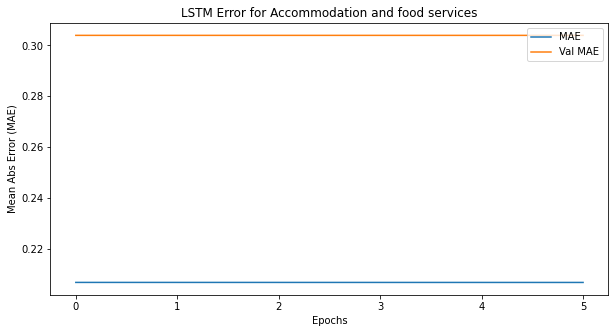

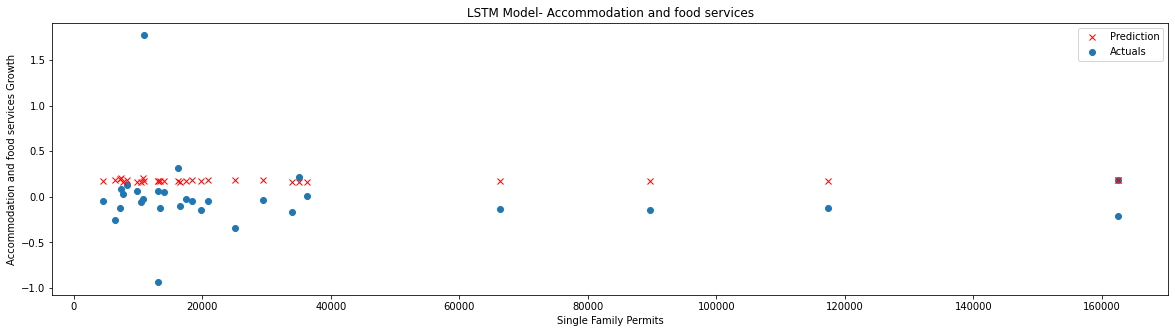

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 469us/sample - loss: 0.0444 - mae: 0.2087
Epoch 2/6
1287/1287 [==============================] - 0s 223us/sample - loss: 0.0444 - mae: 0.2087
Epoch 3/6
1287/1287 [==============================] - 0s 218us/sample - loss: 0.0444 - mae: 0.2087
Epoch 4/6
1287/1287 [==============================] - 0s 209us/sample - loss: 0.0444 - mae: 0.2087
Epoch 5/6
1287/1287 [==============================] - 0s 202us/sample - loss: 0.0444 - mae: 0.2087
Epoch 6/6
1287/1287 [==============================] - 0s 207us/sample - loss: 0.0444 - mae: 0.2087
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.0469 - mae: 0.2103 - val_loss: 0.1115 - val_mae: 0.3127
Epoch 2/6
1029/1029 [==============================] - 0s 269us/sample - loss: 0.0469 - mae: 0.2103 - val_loss: 0.1115 - val_mae: 0.3127
Epoch 3/6
1029/1029 [==============================] - 0s 2

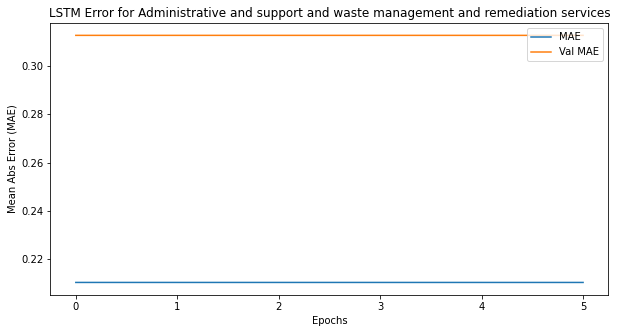

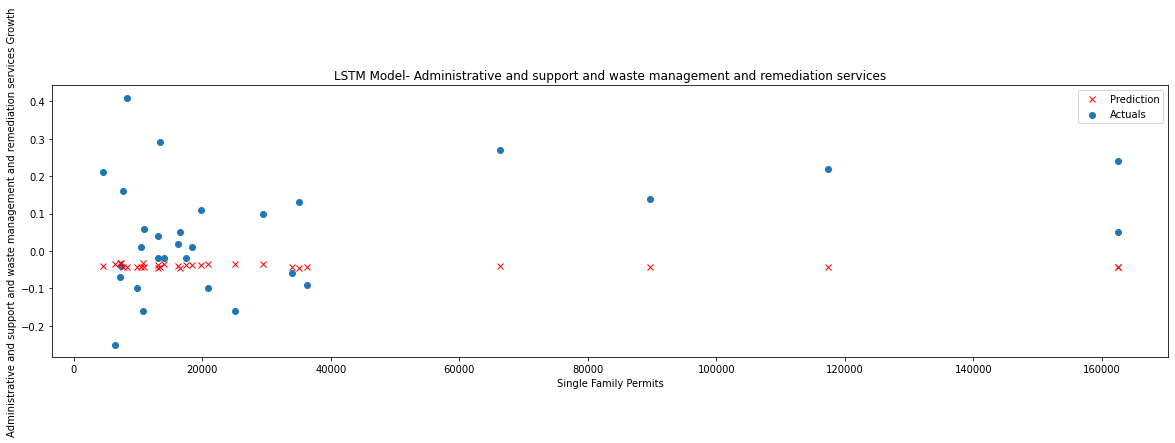

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 484us/sample - loss: 0.0464 - mae: 0.2087
Epoch 2/6
1287/1287 [==============================] - 0s 221us/sample - loss: 0.0464 - mae: 0.2087
Epoch 3/6
1287/1287 [==============================] - 0s 222us/sample - loss: 0.0464 - mae: 0.2087
Epoch 4/6
1287/1287 [==============================] - 0s 207us/sample - loss: 0.0464 - mae: 0.2087
Epoch 5/6
1287/1287 [==============================] - 0s 220us/sample - loss: 0.0464 - mae: 0.2087
Epoch 6/6
1287/1287 [==============================] - 0s 233us/sample - loss: 0.0464 - mae: 0.2087
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.7899 - mae: 1.0401 - val_loss: 0.1241 - val_mae: 0.3545
Epoch 2/6
1029/1029 [==============================] - 0s 273us/sample - loss: 0.7896 - mae: 1.0385 - val_loss: 0.1244 - val_mae: 0.3554
Epoch 3/6
1029/1029 [==============================] - 0s 2

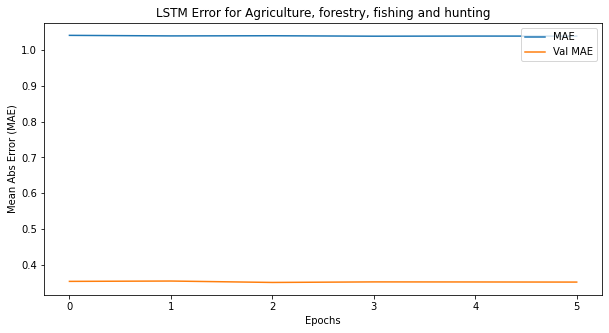

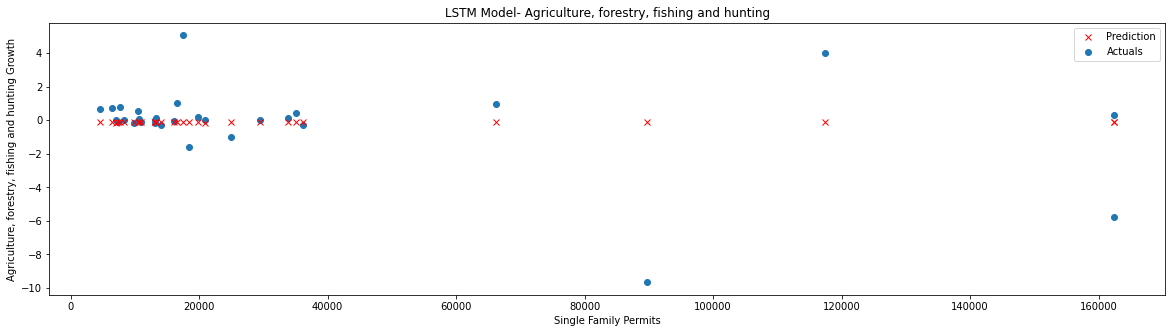

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 471us/sample - loss: 0.7665 - mae: 1.0136
Epoch 2/6
1287/1287 [==============================] - 0s 212us/sample - loss: 0.7667 - mae: 1.0146
Epoch 3/6
1287/1287 [==============================] - 0s 206us/sample - loss: 0.7667 - mae: 1.0146
Epoch 4/6
1287/1287 [==============================] - 0s 210us/sample - loss: 0.7667 - mae: 1.0146
Epoch 5/6
1287/1287 [==============================] - 0s 201us/sample - loss: 0.7667 - mae: 1.0145
Epoch 6/6
1287/1287 [==============================] - 0s 199us/sample - loss: 0.7667 - mae: 1.0144
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 3.5294 - mae: 3.9872 - val_loss: 0.1152 - val_mae: 0.3305
Epoch 2/6
1029/1029 [==============================] - 0s 250us/sample - loss: 3.5294 - mae: 3.9872 - val_loss: 0.1152 - val_mae: 0.3305
Epoch 3/6
1029/1029 [==============================] - 0s 2

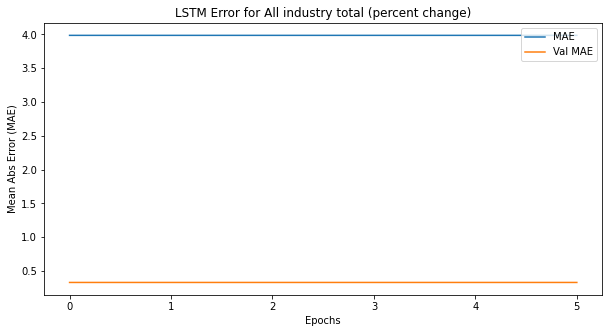

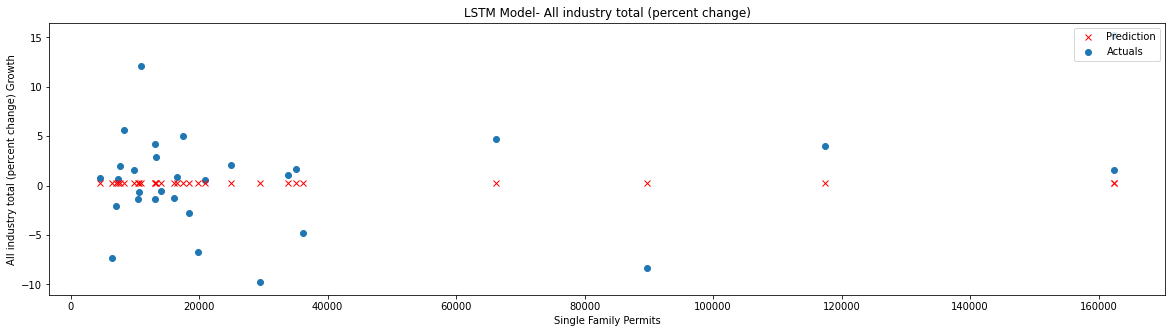

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 452us/sample - loss: 3.5312 - mae: 3.9911
Epoch 2/6
1287/1287 [==============================] - 0s 204us/sample - loss: 3.5312 - mae: 3.9911
Epoch 3/6
1287/1287 [==============================] - 0s 210us/sample - loss: 3.5312 - mae: 3.9911
Epoch 4/6
1287/1287 [==============================] - 0s 215us/sample - loss: 3.5312 - mae: 3.9911
Epoch 5/6
1287/1287 [==============================] - 0s 206us/sample - loss: 3.5312 - mae: 3.9911
Epoch 6/6
1287/1287 [==============================] - 0s 221us/sample - loss: 3.5312 - mae: 3.9911
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.0307 - mae: 0.1551 - val_loss: 0.1044 - val_mae: 0.2904
Epoch 2/6
1029/1029 [==============================] - 0s 259us/sample - loss: 0.0307 - mae: 0.1551 - val_loss: 0.1044 - val_mae: 0.2904
Epoch 3/6
1029/1029 [==============================] - 0s 2

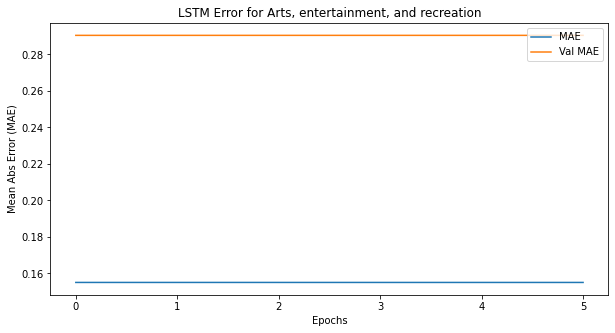

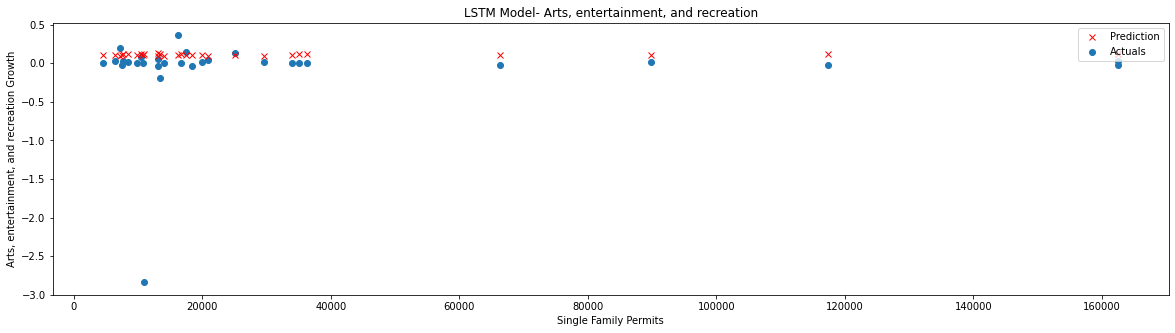

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 450us/sample - loss: 0.0280 - mae: 0.1512
Epoch 2/6
1287/1287 [==============================] - 0s 224us/sample - loss: 0.0280 - mae: 0.1512
Epoch 3/6
1287/1287 [==============================] - 0s 215us/sample - loss: 0.0280 - mae: 0.1512
Epoch 4/6
1287/1287 [==============================] - 0s 223us/sample - loss: 0.0280 - mae: 0.1512
Epoch 5/6
1287/1287 [==============================] - 0s 218us/sample - loss: 0.0280 - mae: 0.1512
Epoch 6/6
1287/1287 [==============================] - 0s 206us/sample - loss: 0.0280 - mae: 0.1512
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.0895 - mae: 0.3352 - val_loss: 0.1571 - val_mae: 0.4432
Epoch 2/6
1029/1029 [==============================] - 0s 253us/sample - loss: 0.0895 - mae: 0.3352 - val_loss: 0.1571 - val_mae: 0.4432
Epoch 3/6
1029/1029 [==============================] - 0s 2

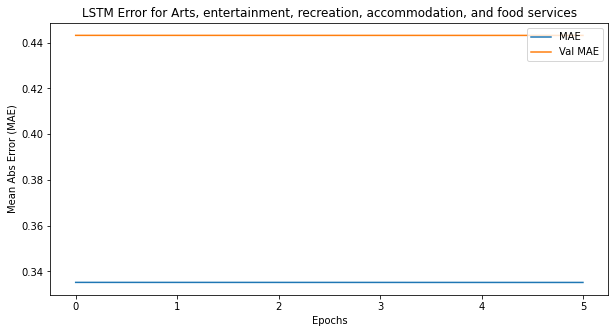

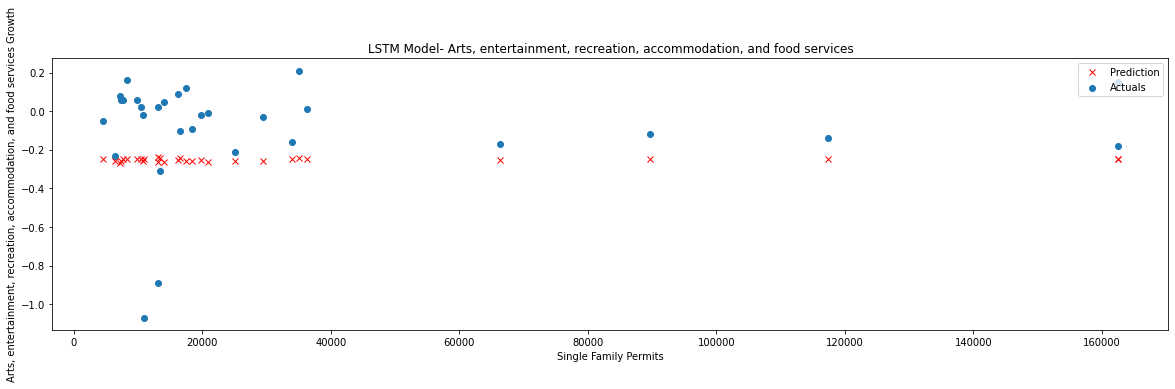

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 454us/sample - loss: 0.0915 - mae: 0.3393
Epoch 2/6
1287/1287 [==============================] - 0s 216us/sample - loss: 0.0915 - mae: 0.3393
Epoch 3/6
1287/1287 [==============================] - 0s 218us/sample - loss: 0.0915 - mae: 0.3393
Epoch 4/6
1287/1287 [==============================] - 0s 218us/sample - loss: 0.0915 - mae: 0.3393
Epoch 5/6
1287/1287 [==============================] - 0s 210us/sample - loss: 0.0915 - mae: 0.3393
Epoch 6/6
1287/1287 [==============================] - 0s 206us/sample - loss: 0.0915 - mae: 0.3392
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.2392 - mae: 0.5019 - val_loss: 0.1261 - val_mae: 0.3608
Epoch 2/6
1029/1029 [==============================] - 0s 256us/sample - loss: 0.2392 - mae: 0.5019 - val_loss: 0.1261 - val_mae: 0.3608
Epoch 3/6
1029/1029 [==============================] - 0s 2

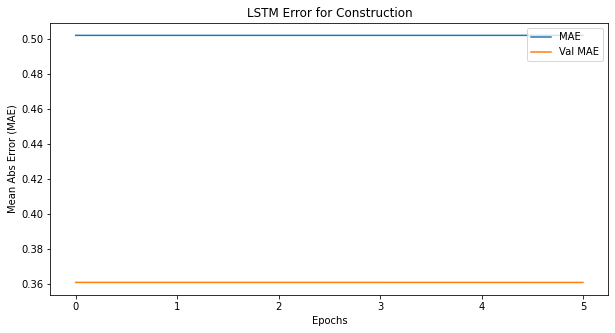

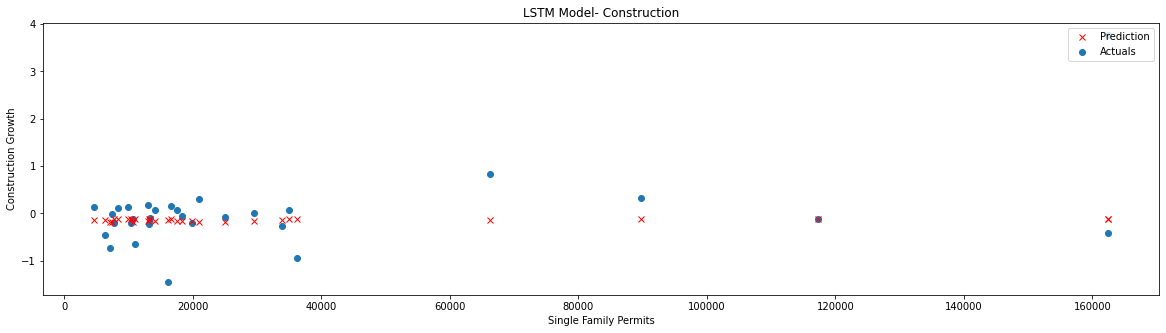

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 469us/sample - loss: 0.2434 - mae: 0.5066
Epoch 2/6
1287/1287 [==============================] - 0s 228us/sample - loss: 0.2434 - mae: 0.5066
Epoch 3/6
1287/1287 [==============================] - 0s 225us/sample - loss: 0.2434 - mae: 0.5066
Epoch 4/6
1287/1287 [==============================] - 0s 221us/sample - loss: 0.2434 - mae: 0.5066
Epoch 5/6
1287/1287 [==============================] - 0s 226us/sample - loss: 0.2434 - mae: 0.5066
Epoch 6/6
1287/1287 [==============================] - 0s 212us/sample - loss: 0.2434 - mae: 0.5066
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.7098 - mae: 1.0459 - val_loss: 0.1294 - val_mae: 0.3759
Epoch 2/6
1029/1029 [==============================] - 0s 247us/sample - loss: 0.7098 - mae: 1.0459 - val_loss: 0.1294 - val_mae: 0.3759
Epoch 3/6
1029/1029 [==============================] - 0s 2

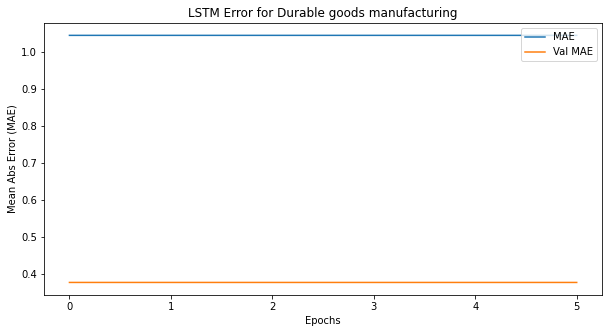

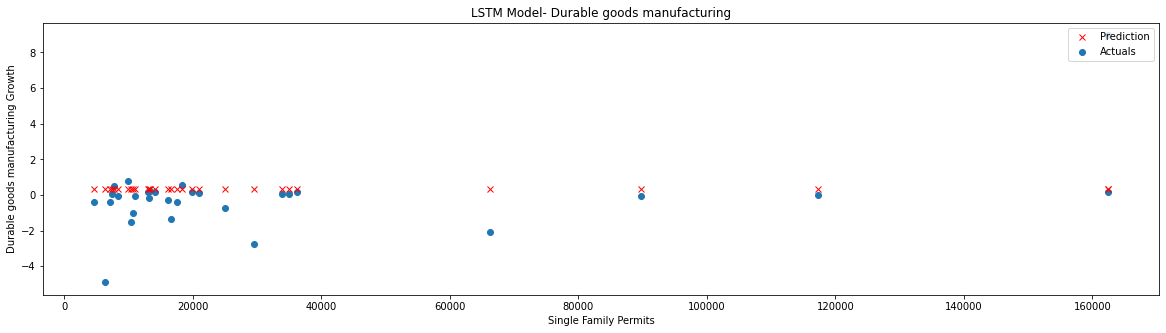

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 456us/sample - loss: 0.6828 - mae: 1.0164
Epoch 2/6
1287/1287 [==============================] - 0s 214us/sample - loss: 0.6828 - mae: 1.0164
Epoch 3/6
1287/1287 [==============================] - 0s 231us/sample - loss: 0.6828 - mae: 1.0164
Epoch 4/6
1287/1287 [==============================] - 0s 218us/sample - loss: 0.6828 - mae: 1.0164
Epoch 5/6
1287/1287 [==============================] - 0s 227us/sample - loss: 0.6828 - mae: 1.0164
Epoch 6/6
1287/1287 [==============================] - 0s 228us/sample - loss: 0.6828 - mae: 1.0164
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.1875 - mae: 0.6048 - val_loss: 0.2328 - val_mae: 0.6040
Epoch 2/6
1029/1029 [==============================] - 0s 250us/sample - loss: 0.1875 - mae: 0.6048 - val_loss: 0.2328 - val_mae: 0.6039
Epoch 3/6
1029/1029 [==============================] - 0s 2

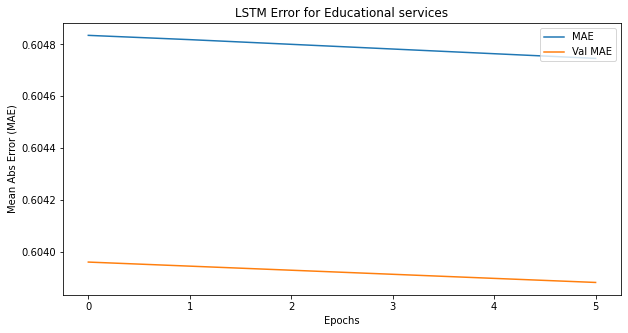

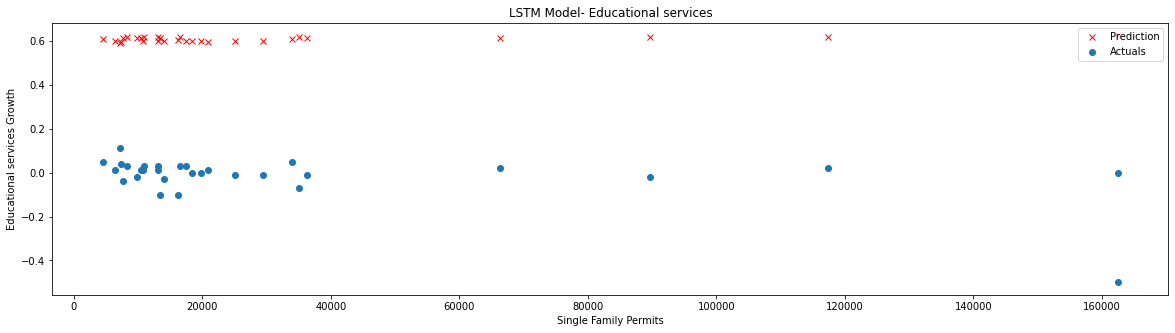

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 445us/sample - loss: 0.1869 - mae: 0.6042
Epoch 2/6
1287/1287 [==============================] - 0s 214us/sample - loss: 0.1869 - mae: 0.6042
Epoch 3/6
1287/1287 [==============================] - 0s 226us/sample - loss: 0.1869 - mae: 0.6041
Epoch 4/6
1287/1287 [==============================] - 0s 221us/sample - loss: 0.1869 - mae: 0.6041
Epoch 5/6
1287/1287 [==============================] - 0s 225us/sample - loss: 0.1869 - mae: 0.6041
Epoch 6/6
1287/1287 [==============================] - 0s 225us/sample - loss: 0.1869 - mae: 0.6041
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.3106 - mae: 0.7332 - val_loss: 0.2937 - val_mae: 0.7031
Epoch 2/6
1029/1029 [==============================] - 0s 253us/sample - loss: 0.3106 - mae: 0.7332 - val_loss: 0.2937 - val_mae: 0.7031
Epoch 3/6
1029/1029 [==============================] - 0s 2

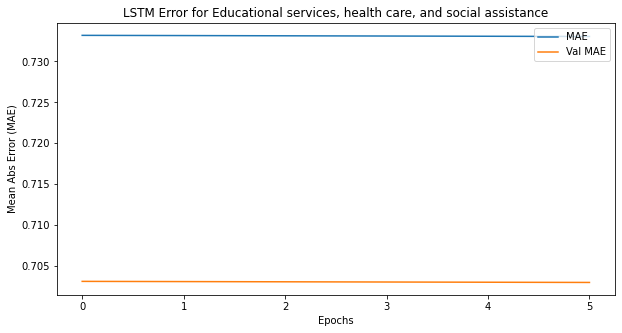

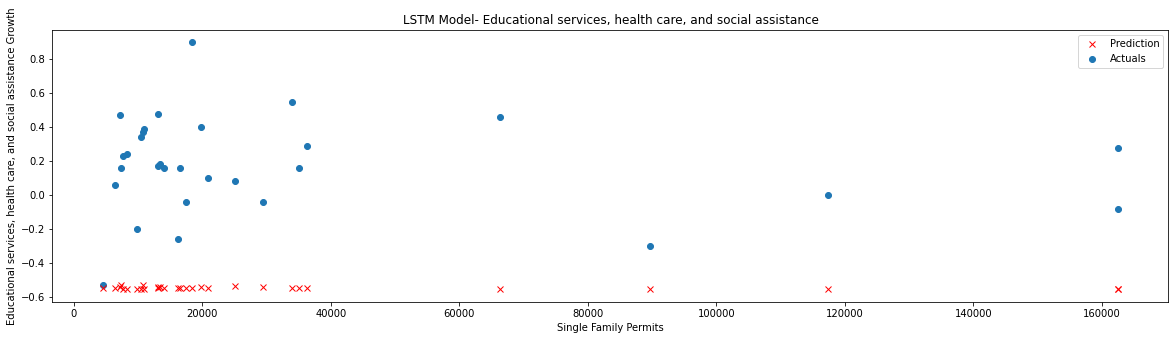

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 467us/sample - loss: 0.3094 - mae: 0.7307
Epoch 2/6
1287/1287 [==============================] - 0s 224us/sample - loss: 0.3094 - mae: 0.7307
Epoch 3/6
1287/1287 [==============================] - 0s 222us/sample - loss: 0.3093 - mae: 0.7307
Epoch 4/6
1287/1287 [==============================] - 0s 224us/sample - loss: 0.3093 - mae: 0.7306
Epoch 5/6
1287/1287 [==============================] - 0s 228us/sample - loss: 0.3093 - mae: 0.7306
Epoch 6/6
1287/1287 [==============================] - 0s 216us/sample - loss: 0.3093 - mae: 0.7305
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.4631 - mae: 0.9084 - val_loss: 0.4982 - val_mae: 0.9683
Epoch 2/6
1029/1029 [==============================] - 0s 267us/sample - loss: 0.4631 - mae: 0.9084 - val_loss: 0.4982 - val_mae: 0.9682
Epoch 3/6
1029/1029 [==============================] - 0s 2

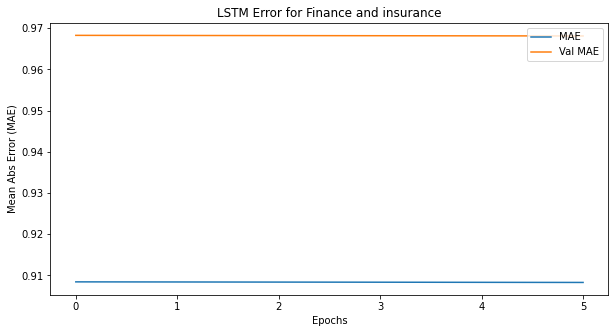

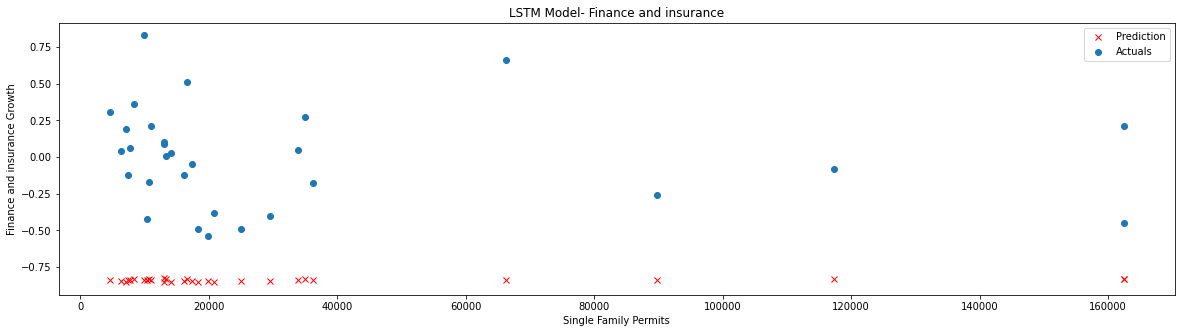

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 467us/sample - loss: 0.4590 - mae: 0.9044
Epoch 2/6
1287/1287 [==============================] - 0s 230us/sample - loss: 0.4589 - mae: 0.9044
Epoch 3/6
1287/1287 [==============================] - 0s 218us/sample - loss: 0.4589 - mae: 0.9044
Epoch 4/6
1287/1287 [==============================] - 0s 206us/sample - loss: 0.4589 - mae: 0.9043
Epoch 5/6
1287/1287 [==============================] - 0s 213us/sample - loss: 0.4588 - mae: 0.9043
Epoch 6/6
1287/1287 [==============================] - 0s 205us/sample - loss: 0.4588 - mae: 0.9043
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.8833 - mae: 1.3237 - val_loss: 0.4698 - val_mae: 0.9354
Epoch 2/6
1029/1029 [==============================] - 0s 254us/sample - loss: 0.8832 - mae: 1.3237 - val_loss: 0.4697 - val_mae: 0.9354
Epoch 3/6
1029/1029 [==============================] - 0s 2

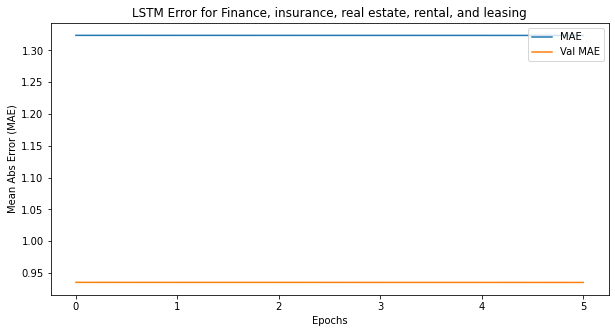

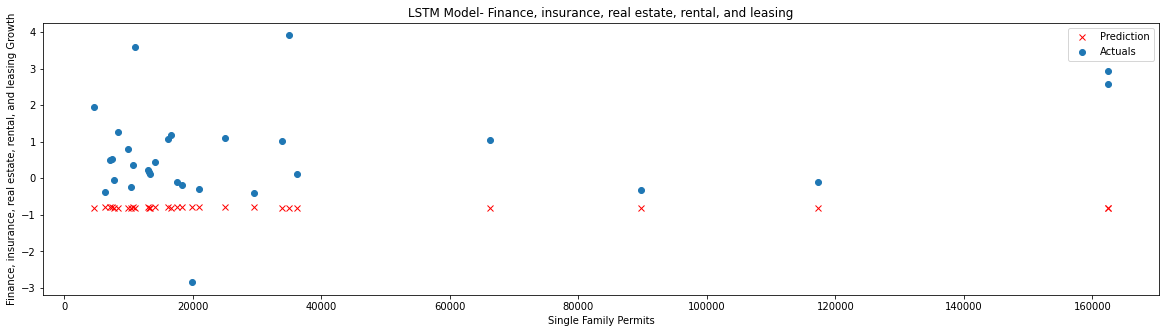

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 456us/sample - loss: 0.9072 - mae: 1.3479
Epoch 2/6
1287/1287 [==============================] - 0s 215us/sample - loss: 0.9072 - mae: 1.3479
Epoch 3/6
1287/1287 [==============================] - 0s 219us/sample - loss: 0.9072 - mae: 1.3479
Epoch 4/6
1287/1287 [==============================] - 0s 220us/sample - loss: 0.9071 - mae: 1.3479
Epoch 5/6
1287/1287 [==============================] - 0s 212us/sample - loss: 0.9071 - mae: 1.3478
Epoch 6/6
1287/1287 [==============================] - 0s 228us/sample - loss: 0.9071 - mae: 1.3478
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.2105 - mae: 0.5347 - val_loss: 0.1466 - val_mae: 0.4221
Epoch 2/6
1029/1029 [==============================] - 0s 266us/sample - loss: 0.2105 - mae: 0.5346 - val_loss: 0.1466 - val_mae: 0.4221
Epoch 3/6
1029/1029 [==============================] - 0s 2

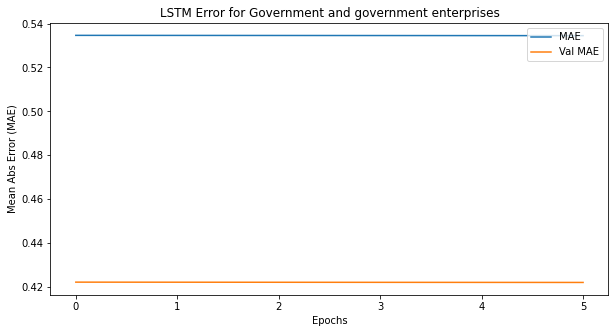

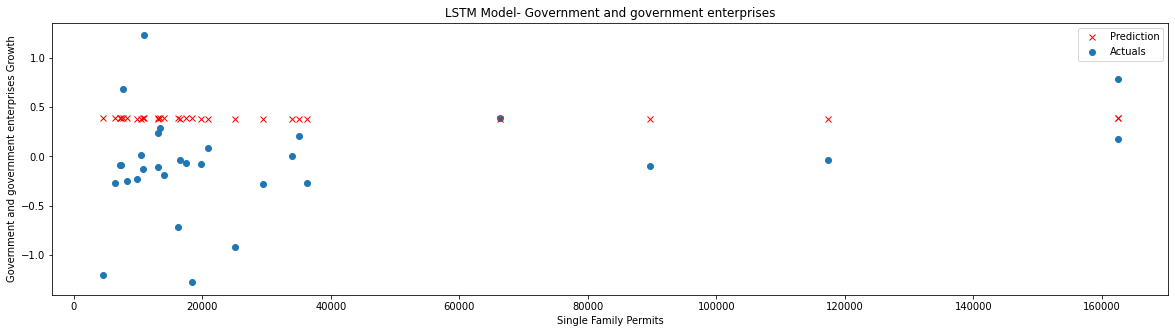

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 451us/sample - loss: 0.2209 - mae: 0.5461
Epoch 2/6
1287/1287 [==============================] - 0s 210us/sample - loss: 0.2209 - mae: 0.5461
Epoch 3/6
1287/1287 [==============================] - 0s 215us/sample - loss: 0.2208 - mae: 0.5460
Epoch 4/6
1287/1287 [==============================] - 0s 218us/sample - loss: 0.2208 - mae: 0.5460
Epoch 5/6
1287/1287 [==============================] - 0s 216us/sample - loss: 0.2208 - mae: 0.5460
Epoch 6/6
1287/1287 [==============================] - 0s 210us/sample - loss: 0.2208 - mae: 0.5459
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.0803 - mae: 0.3152 - val_loss: 0.1429 - val_mae: 0.4131
Epoch 2/6
1029/1029 [==============================] - 0s 275us/sample - loss: 0.0803 - mae: 0.3152 - val_loss: 0.1429 - val_mae: 0.4131
Epoch 3/6
1029/1029 [==============================] - 0s 2

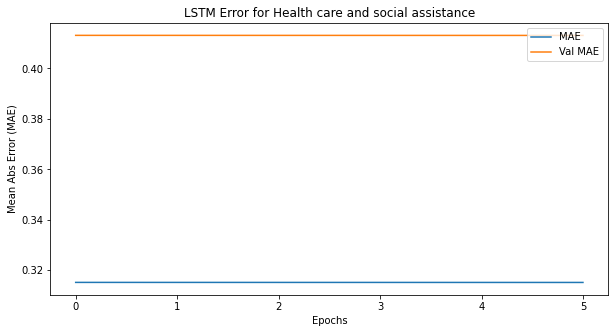

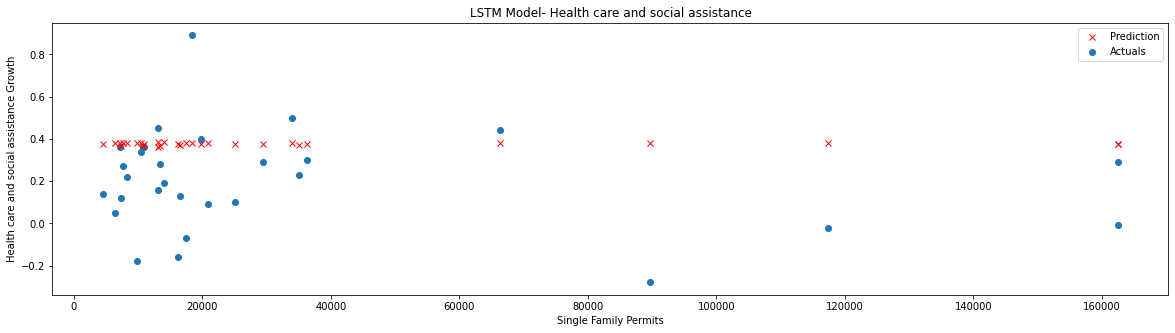

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 470us/sample - loss: 0.0819 - mae: 0.3184
Epoch 2/6
1287/1287 [==============================] - 0s 227us/sample - loss: 0.0819 - mae: 0.3184
Epoch 3/6
1287/1287 [==============================] - 0s 216us/sample - loss: 0.0819 - mae: 0.3184
Epoch 4/6
1287/1287 [==============================] - 0s 211us/sample - loss: 0.0819 - mae: 0.3184
Epoch 5/6
1287/1287 [==============================] - 0s 217us/sample - loss: 0.0819 - mae: 0.3184
Epoch 6/6
1287/1287 [==============================] - 0s 217us/sample - loss: 0.0818 - mae: 0.3184
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.0997 - mae: 0.3002 - val_loss: 0.1100 - val_mae: 0.3129
Epoch 2/6
1029/1029 [==============================] - 0s 261us/sample - loss: 0.0997 - mae: 0.3002 - val_loss: 0.1100 - val_mae: 0.3129
Epoch 3/6
1029/1029 [==============================] - 0s 2

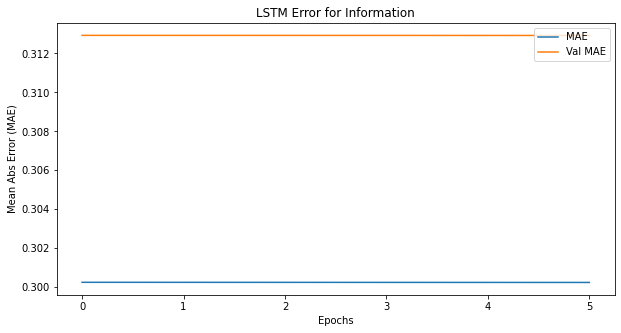

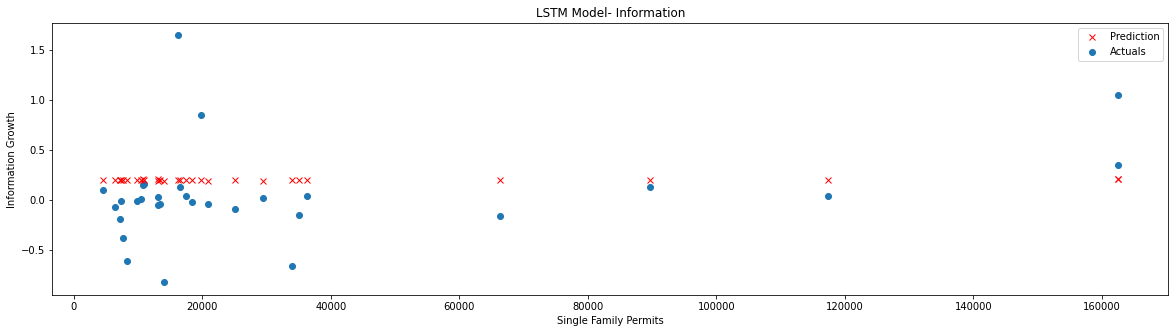

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 478us/sample - loss: 0.1043 - mae: 0.3068
Epoch 2/6
1287/1287 [==============================] - 0s 233us/sample - loss: 0.1043 - mae: 0.3068
Epoch 3/6
1287/1287 [==============================] - 0s 230us/sample - loss: 0.1043 - mae: 0.3068
Epoch 4/6
1287/1287 [==============================] - 0s 221us/sample - loss: 0.1043 - mae: 0.3068
Epoch 5/6
1287/1287 [==============================] - 0s 215us/sample - loss: 0.1043 - mae: 0.3068
Epoch 6/6
1287/1287 [==============================] - 0s 214us/sample - loss: 0.1043 - mae: 0.3068
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.0619 - mae: 0.2577 - val_loss: 0.1320 - val_mae: 0.3785
Epoch 2/6
1029/1029 [==============================] - 0s 250us/sample - loss: 0.0619 - mae: 0.2577 - val_loss: 0.1320 - val_mae: 0.3785
Epoch 3/6
1029/1029 [==============================] - 0s 2

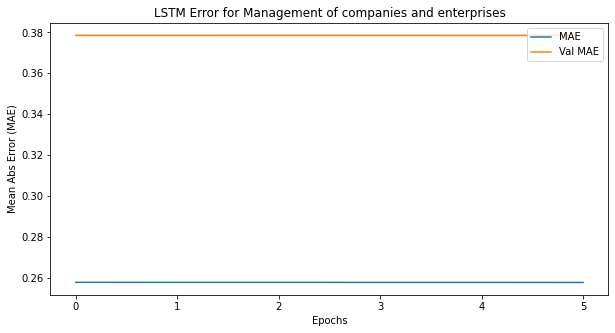

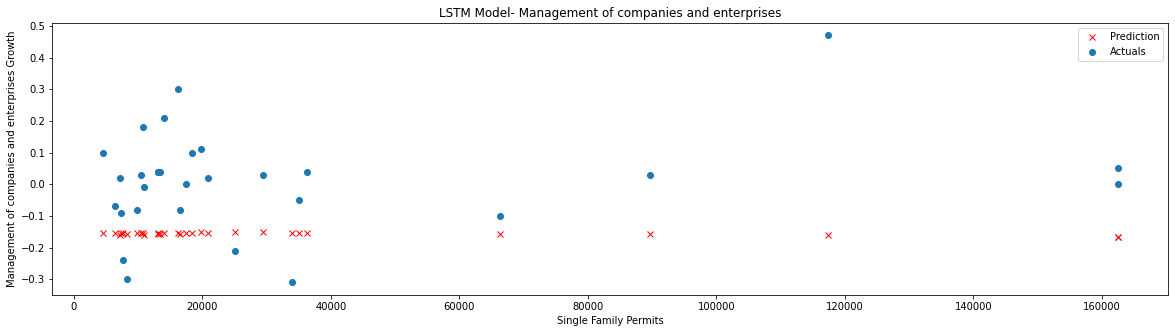

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 485us/sample - loss: 0.0653 - mae: 0.2604
Epoch 2/6
1287/1287 [==============================] - 0s 218us/sample - loss: 0.0653 - mae: 0.2604
Epoch 3/6
1287/1287 [==============================] - 0s 214us/sample - loss: 0.0652 - mae: 0.2604
Epoch 4/6
1287/1287 [==============================] - 0s 220us/sample - loss: 0.0652 - mae: 0.2604
Epoch 5/6
1287/1287 [==============================] - 0s 225us/sample - loss: 0.0652 - mae: 0.2603
Epoch 6/6
1287/1287 [==============================] - 0s 216us/sample - loss: 0.0652 - mae: 0.2603
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.9791 - mae: 1.3276 - val_loss: 0.1052 - val_mae: 0.2872
Epoch 2/6
1029/1029 [==============================] - 0s 272us/sample - loss: 0.9791 - mae: 1.3276 - val_loss: 0.1052 - val_mae: 0.2872
Epoch 3/6
1029/1029 [==============================] - 0s 2

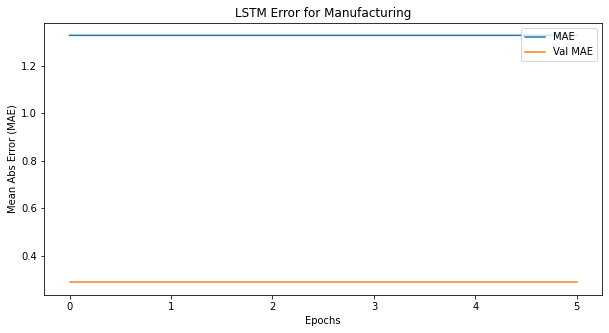

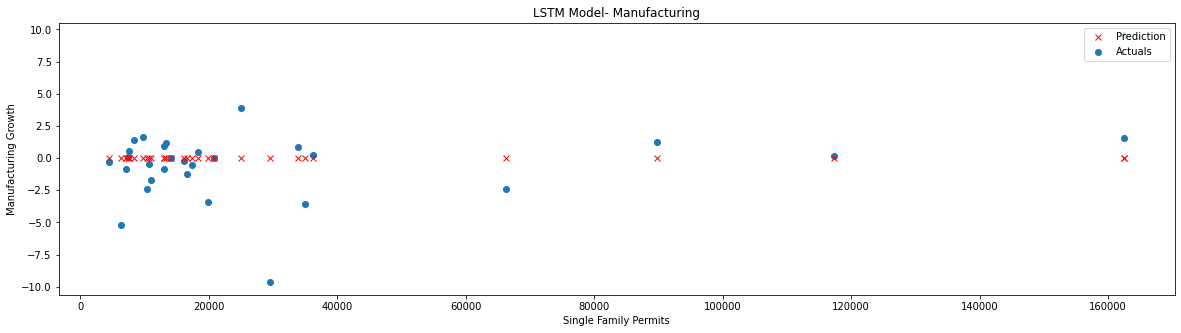

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 497us/sample - loss: 0.9960 - mae: 1.3455
Epoch 2/6
1287/1287 [==============================] - 0s 225us/sample - loss: 0.9960 - mae: 1.3455
Epoch 3/6
1287/1287 [==============================] - 0s 221us/sample - loss: 0.9960 - mae: 1.3455
Epoch 4/6
1287/1287 [==============================] - 0s 236us/sample - loss: 0.9960 - mae: 1.3455
Epoch 5/6
1287/1287 [==============================] - 0s 233us/sample - loss: 0.9960 - mae: 1.3455
Epoch 6/6
1287/1287 [==============================] - 0s 232us/sample - loss: 0.9960 - mae: 1.3455
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 1.0914 - mae: 1.4604 - val_loss: 0.1044 - val_mae: 0.2852
Epoch 2/6
1029/1029 [==============================] - 0s 282us/sample - loss: 1.0914 - mae: 1.4604 - val_loss: 0.1044 - val_mae: 0.2852
Epoch 3/6
1029/1029 [==============================] - 0s 2

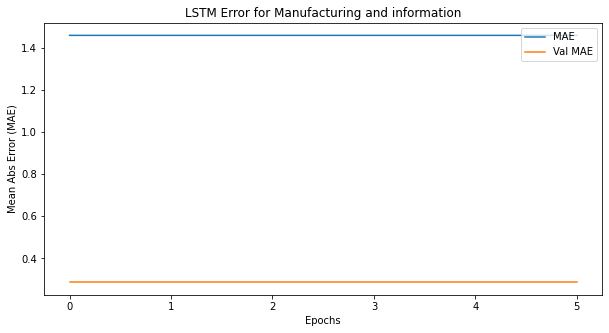

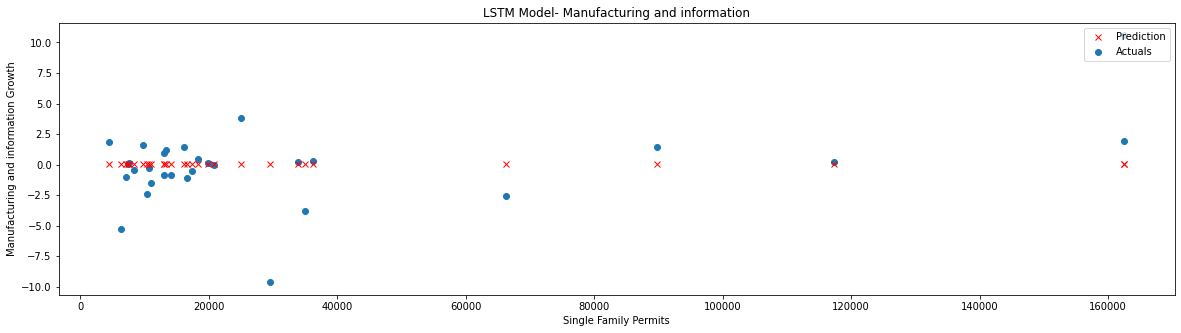

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 481us/sample - loss: 1.1060 - mae: 1.4766
Epoch 2/6
1287/1287 [==============================] - 0s 219us/sample - loss: 1.1060 - mae: 1.4766
Epoch 3/6
1287/1287 [==============================] - 0s 231us/sample - loss: 1.1060 - mae: 1.4766
Epoch 4/6
1287/1287 [==============================] - 0s 220us/sample - loss: 1.1060 - mae: 1.4766
Epoch 5/6
1287/1287 [==============================] - 0s 217us/sample - loss: 1.1060 - mae: 1.4766
Epoch 6/6
1287/1287 [==============================] - 0s 220us/sample - loss: 1.1060 - mae: 1.4766
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.9136 - mae: 1.1368 - val_loss: 0.1082 - val_mae: 0.3069
Epoch 2/6
1029/1029 [==============================] - 0s 275us/sample - loss: 0.9136 - mae: 1.1368 - val_loss: 0.1082 - val_mae: 0.3069
Epoch 3/6
1029/1029 [==============================] - 0s 2

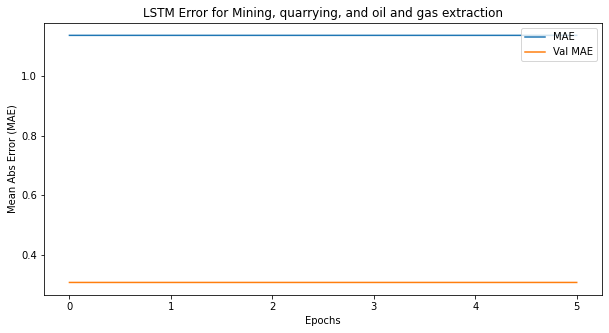

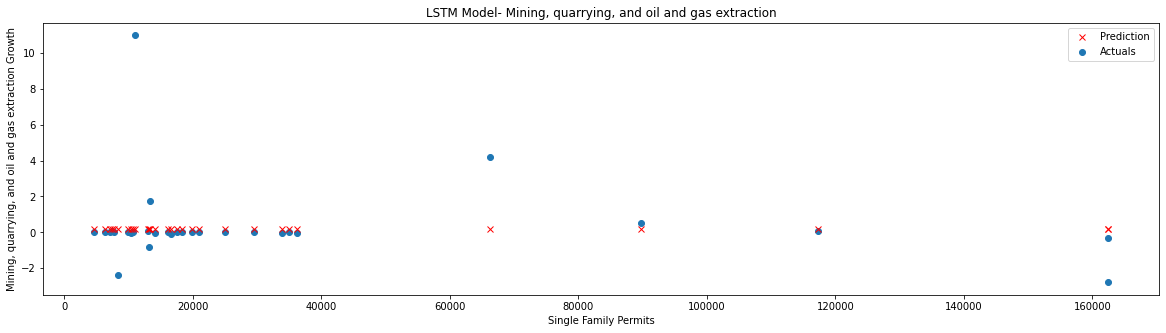

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 499us/sample - loss: 0.8219 - mae: 1.0423
Epoch 2/6
1287/1287 [==============================] - 0s 232us/sample - loss: 0.8219 - mae: 1.0423
Epoch 3/6
1287/1287 [==============================] - 0s 232us/sample - loss: 0.8219 - mae: 1.0423
Epoch 4/6
1287/1287 [==============================] - 0s 215us/sample - loss: 0.8218 - mae: 1.0423
Epoch 5/6
1287/1287 [==============================] - 0s 219us/sample - loss: 0.8218 - mae: 1.0423
Epoch 6/6
1287/1287 [==============================] - 0s 223us/sample - loss: 0.8218 - mae: 1.0423
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 1.4448 - mae: 1.8617 - val_loss: 0.3215 - val_mae: 0.7443
Epoch 2/6
1029/1029 [==============================] - 0s 272us/sample - loss: 1.4448 - mae: 1.8617 - val_loss: 0.3215 - val_mae: 0.7443
Epoch 3/6
1029/1029 [==============================] - 0s 2

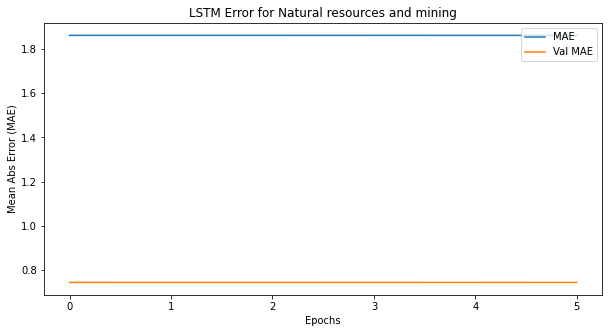

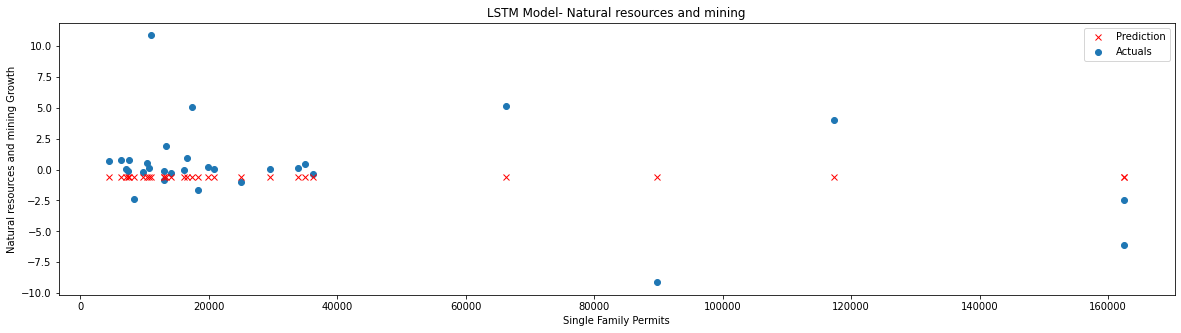

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 497us/sample - loss: 1.4051 - mae: 1.8179
Epoch 2/6
1287/1287 [==============================] - 0s 224us/sample - loss: 1.4051 - mae: 1.8179
Epoch 3/6
1287/1287 [==============================] - 0s 224us/sample - loss: 1.4051 - mae: 1.8179
Epoch 4/6
1287/1287 [==============================] - 0s 228us/sample - loss: 1.4050 - mae: 1.8178
Epoch 5/6
1287/1287 [==============================] - 0s 236us/sample - loss: 1.4050 - mae: 1.8178
Epoch 6/6
1287/1287 [==============================] - 0s 223us/sample - loss: 1.4050 - mae: 1.8178
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.3818 - mae: 0.6276 - val_loss: 0.1057 - val_mae: 0.2889
Epoch 2/6
1029/1029 [==============================] - 0s 283us/sample - loss: 0.3818 - mae: 0.6276 - val_loss: 0.1057 - val_mae: 0.2889
Epoch 3/6
1029/1029 [==============================] - 0s 2

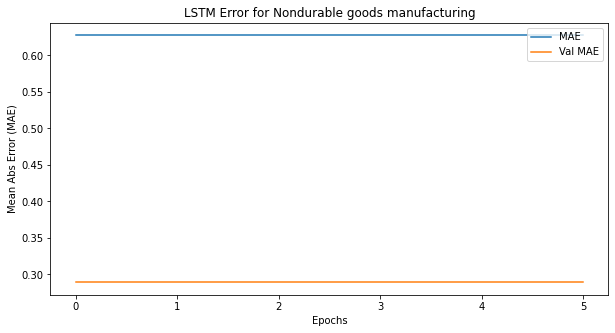

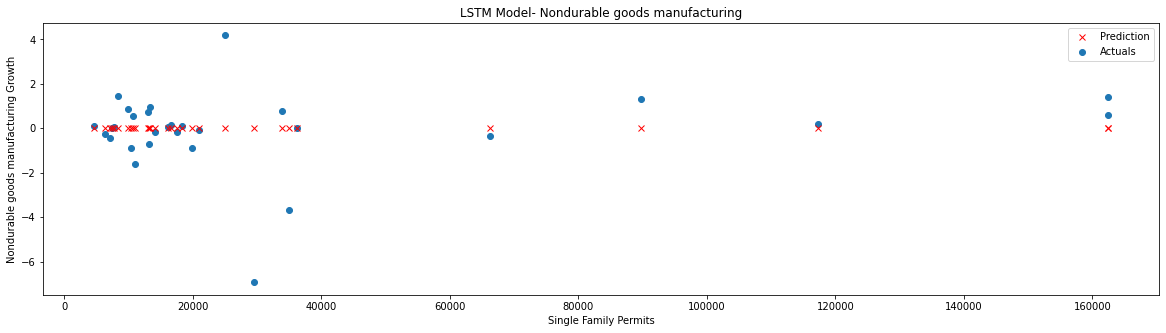

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 534us/sample - loss: 0.4102 - mae: 0.6594
Epoch 2/6
1287/1287 [==============================] - 0s 228us/sample - loss: 0.4102 - mae: 0.6594
Epoch 3/6
1287/1287 [==============================] - 0s 228us/sample - loss: 0.4102 - mae: 0.6594
Epoch 4/6
1287/1287 [==============================] - 0s 227us/sample - loss: 0.4102 - mae: 0.6594
Epoch 5/6
1287/1287 [==============================] - 0s 218us/sample - loss: 0.4102 - mae: 0.6594
Epoch 6/6
1287/1287 [==============================] - 0s 229us/sample - loss: 0.4102 - mae: 0.6594
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.3057 - mae: 0.7716 - val_loss: 0.3042 - val_mae: 0.7183
Epoch 2/6
1029/1029 [==============================] - 0s 263us/sample - loss: 0.3057 - mae: 0.7716 - val_loss: 0.3042 - val_mae: 0.7182
Epoch 3/6
1029/1029 [==============================] - 0s 2

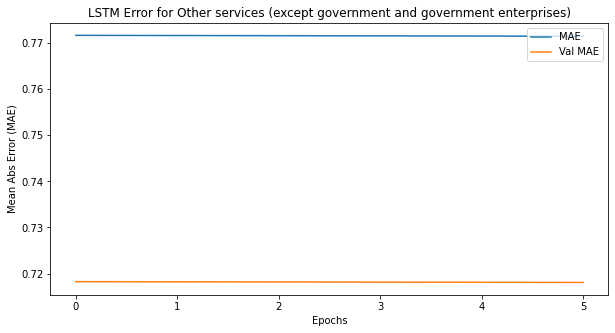

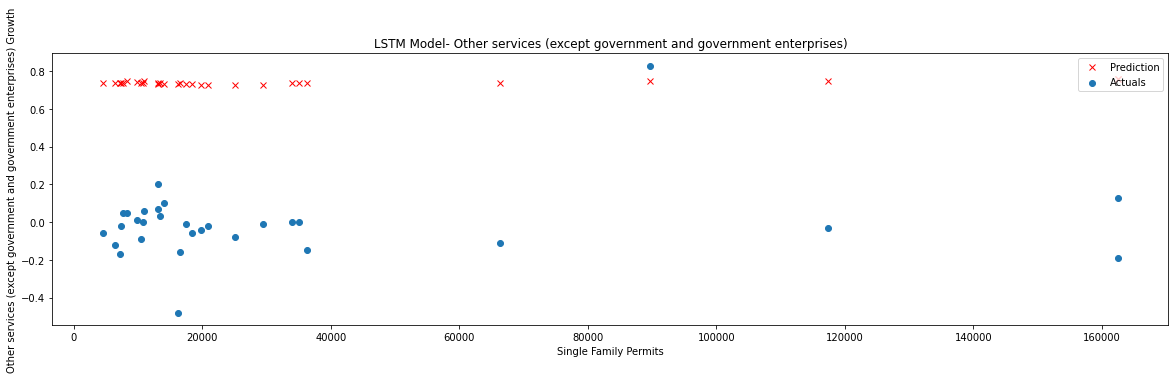

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 478us/sample - loss: 0.3027 - mae: 0.7683
Epoch 2/6
1287/1287 [==============================] - 0s 215us/sample - loss: 0.3027 - mae: 0.7682
Epoch 3/6
1287/1287 [==============================] - 0s 215us/sample - loss: 0.3026 - mae: 0.7682
Epoch 4/6
1287/1287 [==============================] - 0s 219us/sample - loss: 0.3026 - mae: 0.7681
Epoch 5/6
1287/1287 [==============================] - 0s 216us/sample - loss: 0.3026 - mae: 0.7681
Epoch 6/6
1287/1287 [==============================] - 0s 229us/sample - loss: 0.3025 - mae: 0.7680
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 2.6876 - mae: 3.1304 - val_loss: 0.3084 - val_mae: 0.7251
Epoch 2/6
1029/1029 [==============================] - 0s 274us/sample - loss: 2.6876 - mae: 3.1304 - val_loss: 0.3084 - val_mae: 0.7251
Epoch 3/6
1029/1029 [==============================] - 0s 2

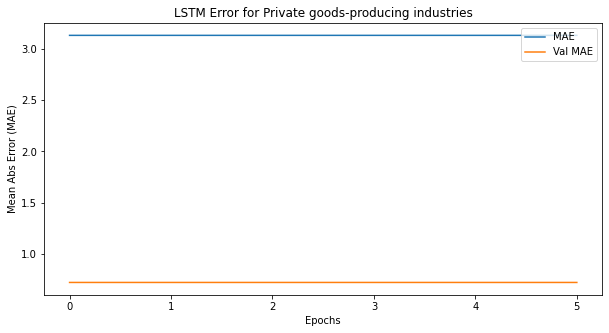

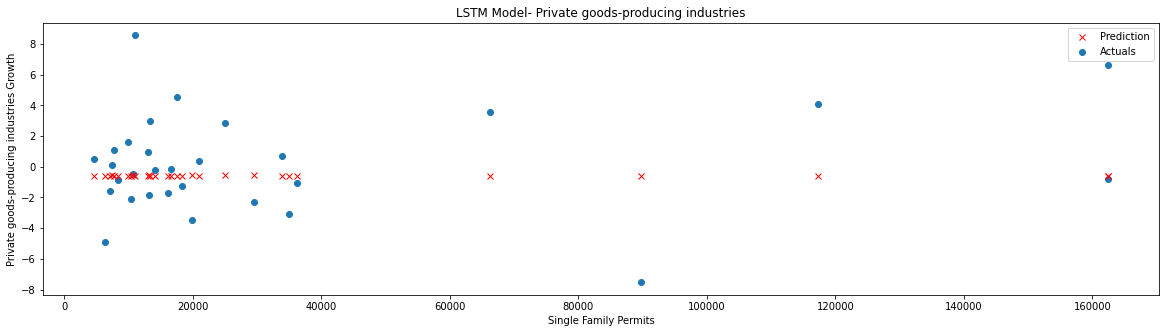

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 505us/sample - loss: 2.5749 - mae: 3.0150
Epoch 2/6
1287/1287 [==============================] - 0s 238us/sample - loss: 2.5749 - mae: 3.0150
Epoch 3/6
1287/1287 [==============================] - 0s 227us/sample - loss: 2.5749 - mae: 3.0150
Epoch 4/6
1287/1287 [==============================] - 0s 223us/sample - loss: 2.5749 - mae: 3.0150
Epoch 5/6
1287/1287 [==============================] - 0s 215us/sample - loss: 2.5749 - mae: 3.0150
Epoch 6/6
1287/1287 [==============================] - 0s 222us/sample - loss: 2.5749 - mae: 3.0150
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 3.5508 - mae: 4.0085 - val_loss: 0.1061 - val_mae: 0.2905
Epoch 2/6
1029/1029 [==============================] - 0s 255us/sample - loss: 3.5508 - mae: 4.0085 - val_loss: 0.1061 - val_mae: 0.2905
Epoch 3/6
1029/1029 [==============================] - 0s 2

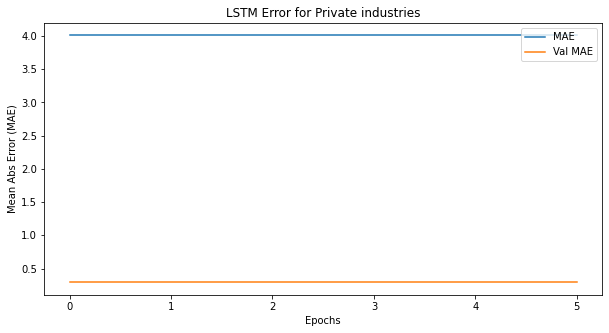

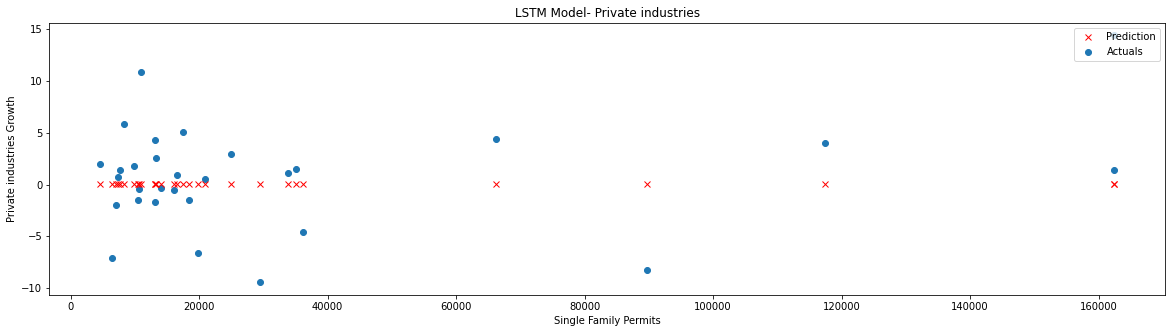

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 528us/sample - loss: 3.5409 - mae: 4.0013
Epoch 2/6
1287/1287 [==============================] - 0s 243us/sample - loss: 3.5409 - mae: 4.0013
Epoch 3/6
1287/1287 [==============================] - 0s 215us/sample - loss: 3.5409 - mae: 4.0013
Epoch 4/6
1287/1287 [==============================] - 0s 226us/sample - loss: 3.5409 - mae: 4.0013
Epoch 5/6
1287/1287 [==============================] - 0s 221us/sample - loss: 3.5409 - mae: 4.0013
Epoch 6/6
1287/1287 [==============================] - 0s 224us/sample - loss: 3.5409 - mae: 4.0013
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 1.6740 - mae: 2.1285 - val_loss: 0.3460 - val_mae: 0.7788
Epoch 2/6
1029/1029 [==============================] - 0s 258us/sample - loss: 1.6740 - mae: 2.1285 - val_loss: 0.3460 - val_mae: 0.7788
Epoch 3/6
1029/1029 [==============================] - 0s 2

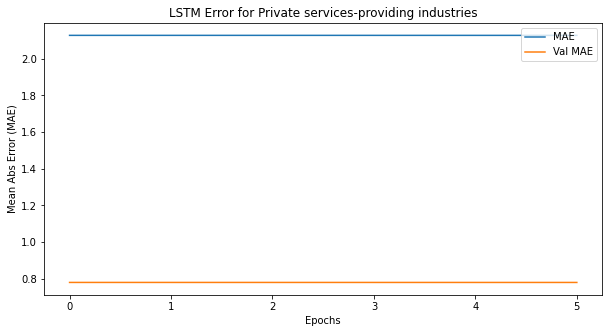

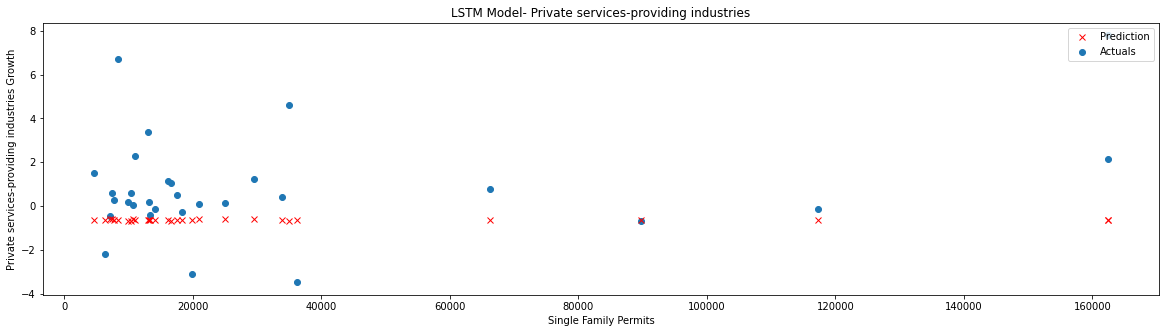

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 516us/sample - loss: 1.7142 - mae: 2.1681
Epoch 2/6
1287/1287 [==============================] - 0s 224us/sample - loss: 1.7141 - mae: 2.1680
Epoch 3/6
1287/1287 [==============================] - 0s 225us/sample - loss: 1.7141 - mae: 2.1680
Epoch 4/6
1287/1287 [==============================] - 0s 225us/sample - loss: 1.7141 - mae: 2.1680
Epoch 5/6
1287/1287 [==============================] - 0s 238us/sample - loss: 1.7141 - mae: 2.1680
Epoch 6/6
1287/1287 [==============================] - 0s 231us/sample - loss: 1.7141 - mae: 2.1680
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 2s 1ms/sample - loss: 0.1855 - mae: 0.4884 - val_loss: 0.2017 - val_mae: 0.5456
Epoch 2/6
1029/1029 [==============================] - 0s 271us/sample - loss: 0.1855 - mae: 0.4884 - val_loss: 0.2017 - val_mae: 0.5456
Epoch 3/6
1029/1029 [==============================] - 0s 2

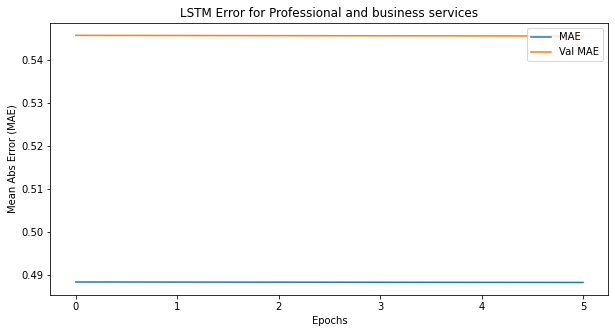

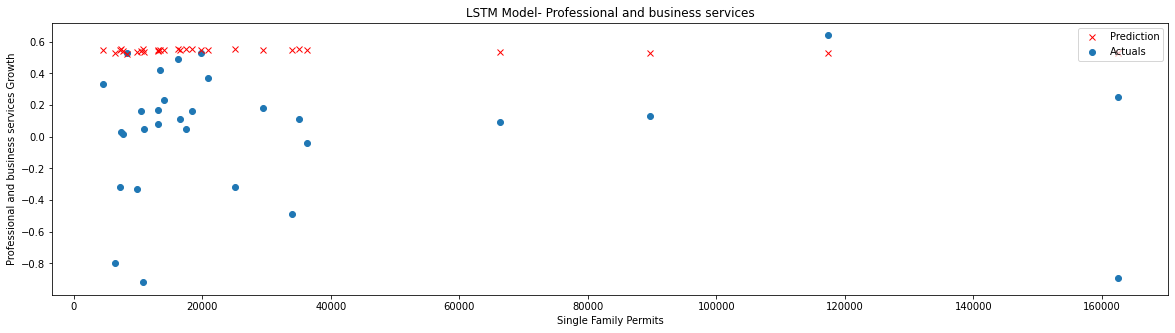

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 538us/sample - loss: 0.1912 - mae: 0.4970
Epoch 2/6
1287/1287 [==============================] - 0s 238us/sample - loss: 0.1912 - mae: 0.4970
Epoch 3/6
1287/1287 [==============================] - 0s 225us/sample - loss: 0.1912 - mae: 0.4969
Epoch 4/6
1287/1287 [==============================] - 0s 228us/sample - loss: 0.1912 - mae: 0.4969
Epoch 5/6
1287/1287 [==============================] - 0s 228us/sample - loss: 0.1911 - mae: 0.4969
Epoch 6/6
1287/1287 [==============================] - 0s 218us/sample - loss: 0.1911 - mae: 0.4969
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 2s 1ms/sample - loss: 0.0623 - mae: 0.2502 - val_loss: 0.1125 - val_mae: 0.3170
Epoch 2/6
1029/1029 [==============================] - 0s 270us/sample - loss: 0.0623 - mae: 0.2502 - val_loss: 0.1125 - val_mae: 0.3170
Epoch 3/6
1029/1029 [==============================] - 0s 2

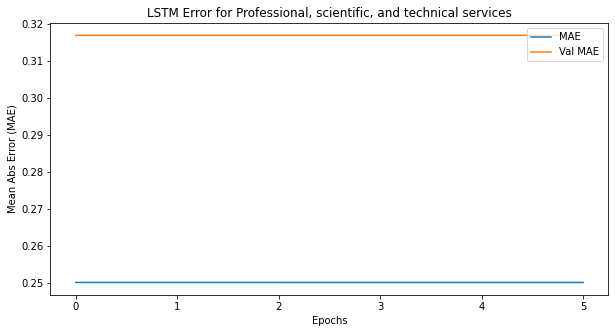

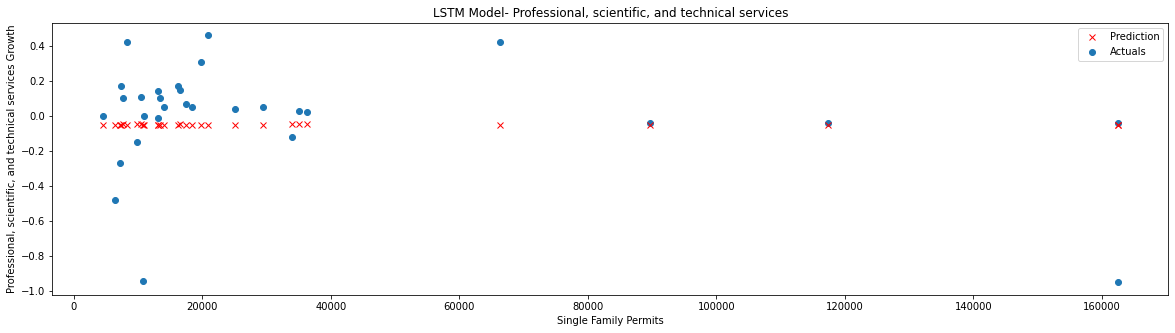

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 547us/sample - loss: 0.0648 - mae: 0.2519
Epoch 2/6
1287/1287 [==============================] - 0s 226us/sample - loss: 0.0648 - mae: 0.2519
Epoch 3/6
1287/1287 [==============================] - 0s 228us/sample - loss: 0.0648 - mae: 0.2519
Epoch 4/6
1287/1287 [==============================] - 0s 216us/sample - loss: 0.0648 - mae: 0.2519
Epoch 5/6
1287/1287 [==============================] - 0s 222us/sample - loss: 0.0648 - mae: 0.2519
Epoch 6/6
1287/1287 [==============================] - 0s 224us/sample - loss: 0.0648 - mae: 0.2519
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 2s 2ms/sample - loss: 0.3567 - mae: 0.6557 - val_loss: 0.1041 - val_mae: 0.2877
Epoch 2/6
1029/1029 [==============================] - 0s 258us/sample - loss: 0.3567 - mae: 0.6556 - val_loss: 0.1041 - val_mae: 0.2877
Epoch 3/6
1029/1029 [==============================] - 0s 2

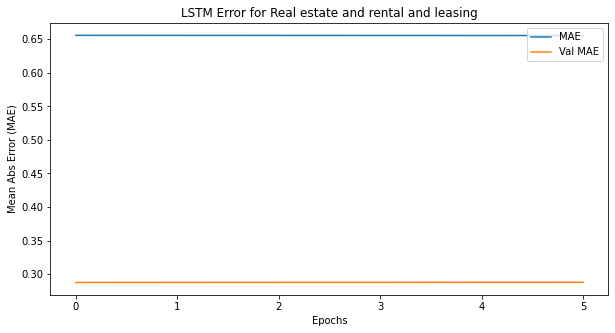

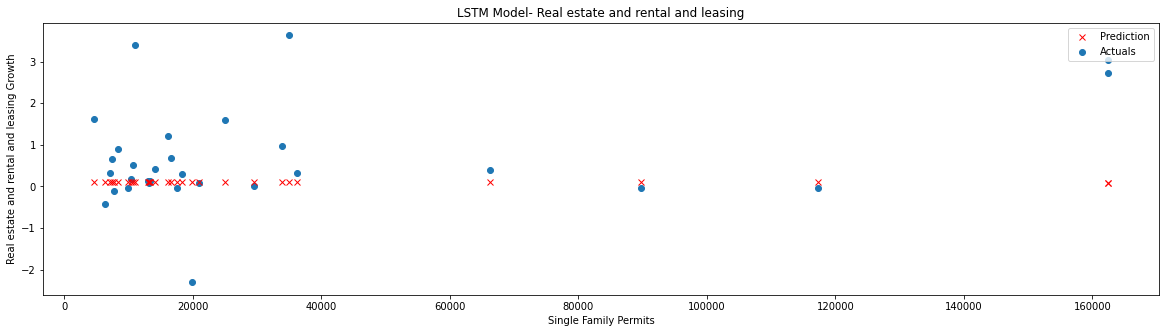

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 535us/sample - loss: 0.3891 - mae: 0.6908
Epoch 2/6
1287/1287 [==============================] - 0s 234us/sample - loss: 0.3891 - mae: 0.6907
Epoch 3/6
1287/1287 [==============================] - 0s 225us/sample - loss: 0.3890 - mae: 0.6906
Epoch 4/6
1287/1287 [==============================] - 0s 242us/sample - loss: 0.3889 - mae: 0.6905
Epoch 5/6
1287/1287 [==============================] - 0s 231us/sample - loss: 0.3888 - mae: 0.6903
Epoch 6/6
1287/1287 [==============================] - 0s 229us/sample - loss: 0.3885 - mae: 0.6899
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.2212 - mae: 0.6031 - val_loss: 0.2386 - val_mae: 0.6135
Epoch 2/6
1029/1029 [==============================] - 0s 268us/sample - loss: 0.2211 - mae: 0.6030 - val_loss: 0.2386 - val_mae: 0.6135
Epoch 3/6
1029/1029 [==============================] - 0s 2

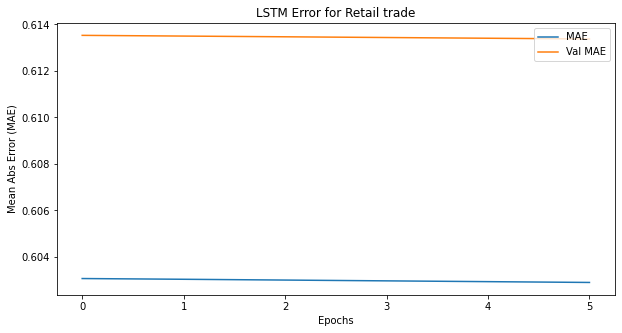

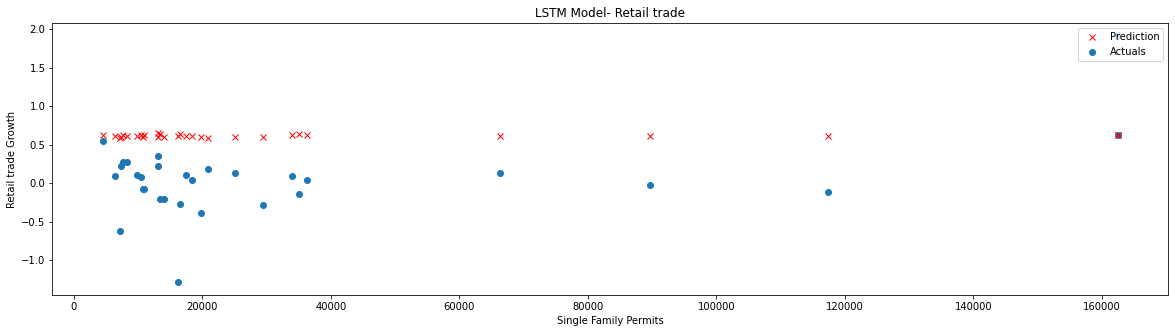

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 529us/sample - loss: 0.2233 - mae: 0.6063
Epoch 2/6
1287/1287 [==============================] - 0s 219us/sample - loss: 0.2233 - mae: 0.6063
Epoch 3/6
1287/1287 [==============================] - 0s 223us/sample - loss: 0.2233 - mae: 0.6062
Epoch 4/6
1287/1287 [==============================] - 0s 209us/sample - loss: 0.2232 - mae: 0.6062
Epoch 5/6
1287/1287 [==============================] - 0s 214us/sample - loss: 0.2232 - mae: 0.6062
Epoch 6/6
1287/1287 [==============================] - 0s 233us/sample - loss: 0.2232 - mae: 0.6061
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 2s 1ms/sample - loss: 0.5516 - mae: 0.9978 - val_loss: 0.4750 - val_mae: 0.9416
Epoch 2/6
1029/1029 [==============================] - 0s 301us/sample - loss: 0.5516 - mae: 0.9977 - val_loss: 0.4750 - val_mae: 0.9416
Epoch 3/6
1029/1029 [==============================] - 0s 2

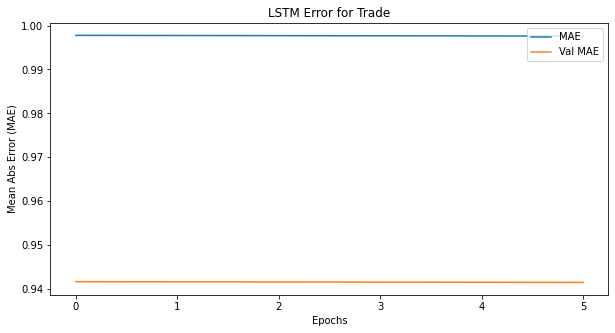

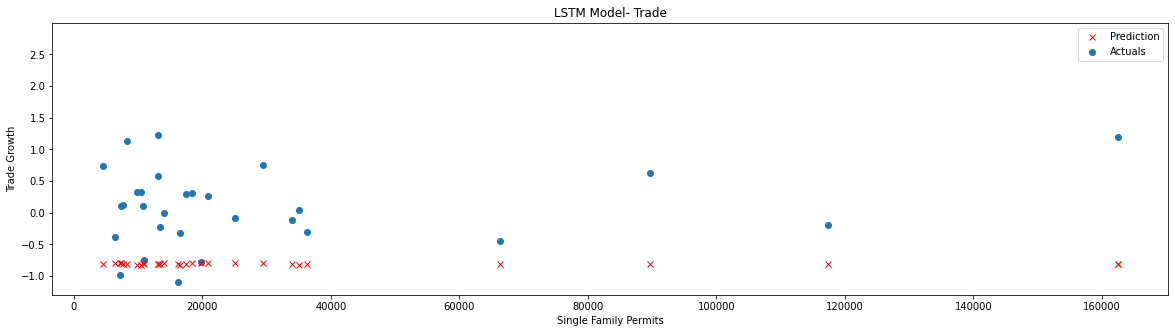

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 532us/sample - loss: 0.5500 - mae: 0.9978
Epoch 2/6
1287/1287 [==============================] - 0s 233us/sample - loss: 0.5500 - mae: 0.9977
Epoch 3/6
1287/1287 [==============================] - 0s 223us/sample - loss: 0.5500 - mae: 0.9977
Epoch 4/6
1287/1287 [==============================] - 0s 234us/sample - loss: 0.5499 - mae: 0.9976
Epoch 5/6
1287/1287 [==============================] - 0s 212us/sample - loss: 0.5499 - mae: 0.9976
Epoch 6/6
1287/1287 [==============================] - 0s 230us/sample - loss: 0.5498 - mae: 0.9975
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.3290 - mae: 0.6470 - val_loss: 0.1844 - val_mae: 0.5078
Epoch 2/6
1029/1029 [==============================] - 0s 275us/sample - loss: 0.3290 - mae: 0.6470 - val_loss: 0.1844 - val_mae: 0.5077
Epoch 3/6
1029/1029 [==============================] - 0s 2

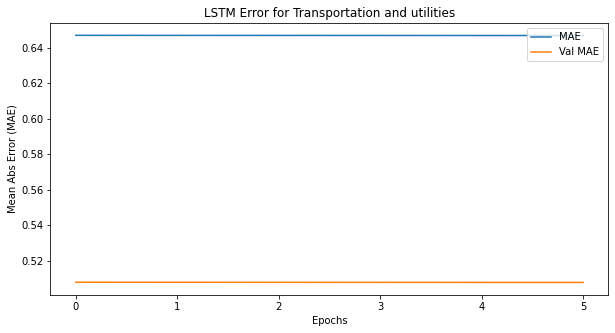

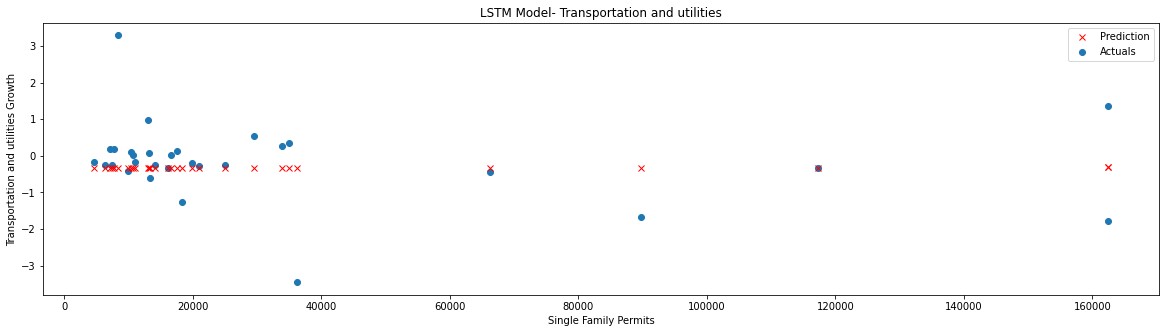

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 526us/sample - loss: 0.3385 - mae: 0.6568
Epoch 2/6
1287/1287 [==============================] - 0s 253us/sample - loss: 0.3385 - mae: 0.6568
Epoch 3/6
1287/1287 [==============================] - 0s 244us/sample - loss: 0.3385 - mae: 0.6567
Epoch 4/6
1287/1287 [==============================] - 0s 256us/sample - loss: 0.3385 - mae: 0.6567
Epoch 5/6
1287/1287 [==============================] - 0s 228us/sample - loss: 0.3384 - mae: 0.6567
Epoch 6/6
1287/1287 [==============================] - 0s 244us/sample - loss: 0.3384 - mae: 0.6567
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.0968 - mae: 0.2976 - val_loss: 0.1300 - val_mae: 0.3709
Epoch 2/6
1029/1029 [==============================] - 0s 279us/sample - loss: 0.0936 - mae: 0.2852 - val_loss: 0.1084 - val_mae: 0.3024
Epoch 3/6
1029/1029 [==============================] - 0s 2

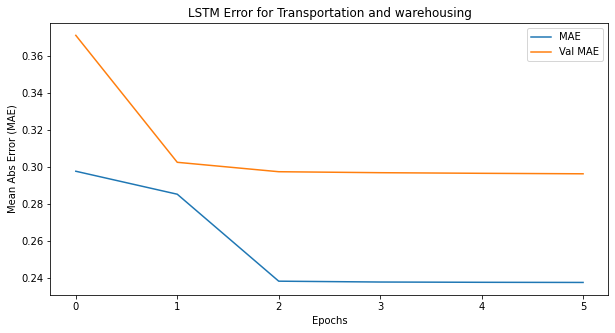

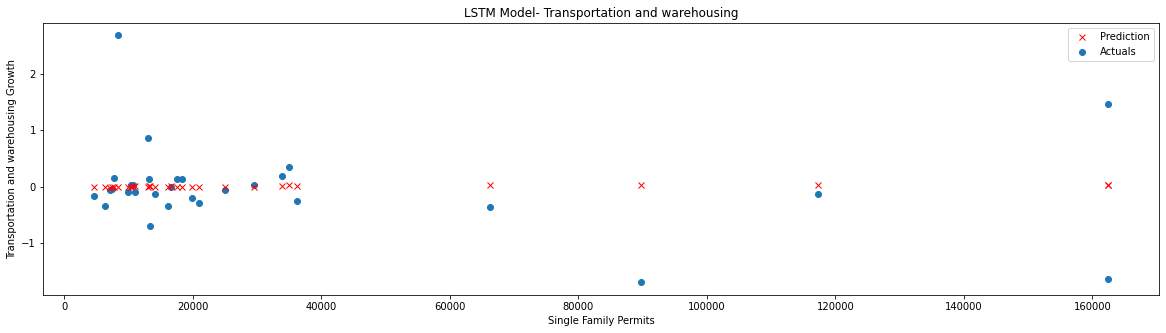

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 492us/sample - loss: 0.1032 - mae: 0.2582
Epoch 2/6
1287/1287 [==============================] - 0s 219us/sample - loss: 0.1032 - mae: 0.2581
Epoch 3/6
1287/1287 [==============================] - 0s 210us/sample - loss: 0.1032 - mae: 0.2581
Epoch 4/6
1287/1287 [==============================] - 0s 217us/sample - loss: 0.1032 - mae: 0.2580
Epoch 5/6
1287/1287 [==============================] - 0s 231us/sample - loss: 0.1032 - mae: 0.2580
Epoch 6/6
1287/1287 [==============================] - 0s 243us/sample - loss: 0.1031 - mae: 0.2580
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.4647 - mae: 0.9199 - val_loss: 0.3337 - val_mae: 0.7611
Epoch 2/6
1029/1029 [==============================] - 0s 270us/sample - loss: 0.4647 - mae: 0.9199 - val_loss: 0.3337 - val_mae: 0.7611
Epoch 3/6
1029/1029 [==============================] - 0s 2

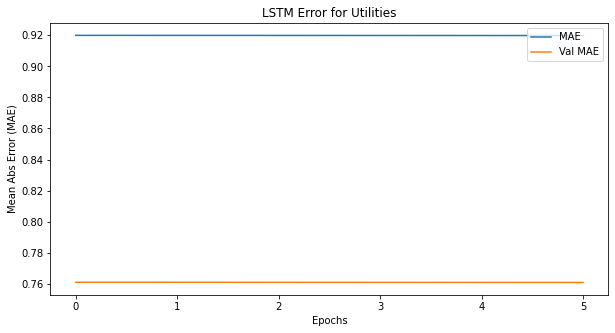

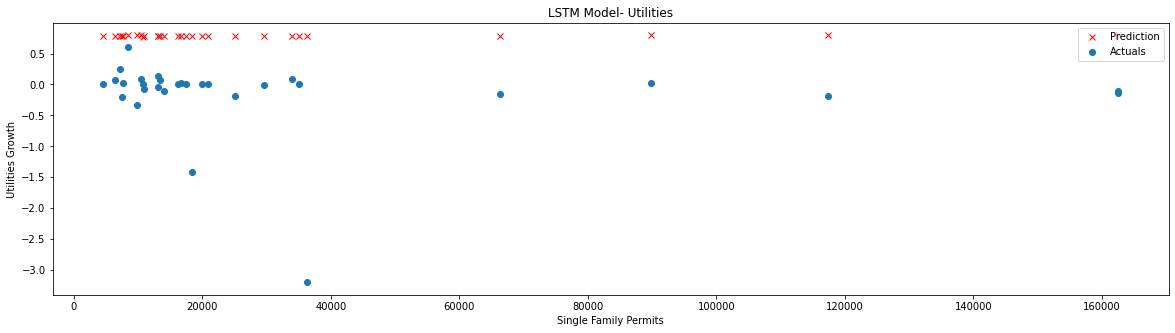

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 507us/sample - loss: 0.4593 - mae: 0.9139
Epoch 2/6
1287/1287 [==============================] - 0s 225us/sample - loss: 0.4593 - mae: 0.9139
Epoch 3/6
1287/1287 [==============================] - 0s 214us/sample - loss: 0.4592 - mae: 0.9138
Epoch 4/6
1287/1287 [==============================] - 0s 214us/sample - loss: 0.4592 - mae: 0.9138
Epoch 5/6
1287/1287 [==============================] - 0s 211us/sample - loss: 0.4592 - mae: 0.9138
Epoch 6/6
1287/1287 [==============================] - 0s 217us/sample - loss: 0.4592 - mae: 0.9138
Train on 1029 samples, validate on 258 samples
Epoch 1/6
1029/1029 [==============================] - 1s 1ms/sample - loss: 0.2708 - mae: 0.6588 - val_loss: 0.2677 - val_mae: 0.6621
Epoch 2/6
1029/1029 [==============================] - 0s 275us/sample - loss: 0.2702 - mae: 0.6580 - val_loss: 0.2671 - val_mae: 0.6612
Epoch 3/6
1029/1029 [==============================] - 0s 2

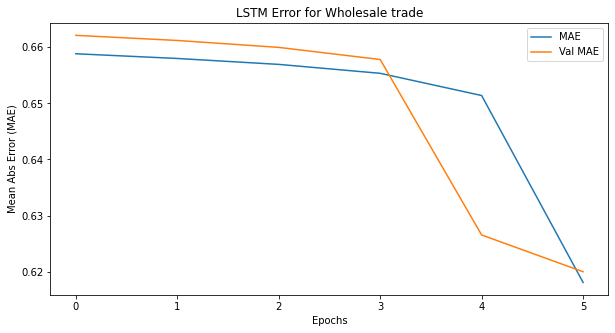

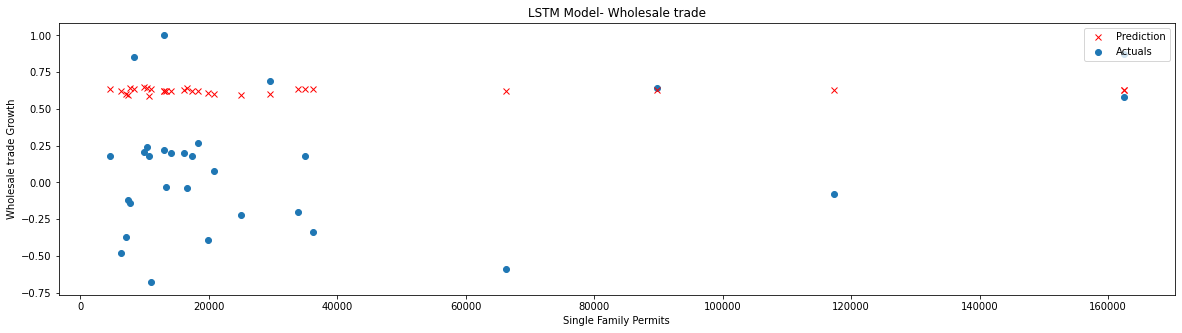

Train on 1287 samples
Epoch 1/6
1287/1287 [==============================] - 1s 492us/sample - loss: 0.2438 - mae: 0.6167
Epoch 2/6
1287/1287 [==============================] - 0s 222us/sample - loss: 0.2434 - mae: 0.6161
Epoch 3/6
1287/1287 [==============================] - 0s 232us/sample - loss: 0.2431 - mae: 0.6156
Epoch 4/6
1287/1287 [==============================] - 0s 216us/sample - loss: 0.2429 - mae: 0.6153
Epoch 5/6
1287/1287 [==============================] - 0s 211us/sample - loss: 0.2428 - mae: 0.6150
Epoch 6/6
1287/1287 [==============================] - 0s 229us/sample - loss: 0.2426 - mae: 0.6148


In [62]:
################################################ LSTM & DNN
os.chdir(LSTM_img)
var=var_pca
df_pred_lstm=pd.DataFrame()
epoch=6
for label in var_bed:
  model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(17,1),return_sequences=True),
    #tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    #tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
  #tf.keras.layers.Lambda(lambda x: x * 400)
    ])

  optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

  dt=tf.expand_dims(df_train_array,axis=-1)
  dv=tf.expand_dims(df_val_array,axis=-1)

#ds = ds.map(lambda window: (window[:-1], window[-1:])) #All but the last entry; The last entry
#ds = ds.batch(10).prefetch(1)
  history = model.fit(dt,df_train[label],epochs=epoch,validation_data=(dv,df_val_label))
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(epoch),history.history["mae"],label="MAE")
  plt.plot(np.arange(epoch),history.history["val_mae"],label="Val MAE")
  plt.legend(loc="upper right")
  plt.title("LSTM Error for {}".format(label))
  plt.xlabel("Epochs")
  plt.ylabel("Mean Abs Error (MAE)")
  plt.savefig("{}.png".format(label))
    #'Total Construction Spending',
  plt_var='Single Family Permits'
  plt.figure(figsize=(20, 5))
  plt.title('LSTM Model- {}'.format(label))
  plt.scatter(df_train[plt_var][0:30], df_train[label][0:30],label="Actuals")
  plt.plot(df_train[plt_var][0:30], model.predict(dt[0:30]),'x',color='r',label="Prediction")
  plt.xlabel(plt_var)
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("LSTM_predictions_{}.png".format(label))
  plt.show()
  #########REFIT DATA WITH ENTIRE DATASET
  model.fit(dt_whole,df_final_rand[label],epochs=epoch)
  mod=model.predict(dtest)
  df_pred_lstm=pd.concat([df_pred_lstm,pd.DataFrame(mod,columns=[label])],axis=1) ####OUTPUT DATA
  

In [0]:
df_pred_lstm_final=pd.concat([df_complete_pca_test.reset_index()[["Year","MSA","State_acro"]],df_pred_lstm],axis=1)
df_pred_lstm_final=df_pred_lstm_final.sort_values(["MSA","Year"])

os.chdir(base_dir)
df_pred_lstm_final.to_csv("LSTM_predictions.csv",index=False)

In [64]:
df_pred_lstm

Accommodation and food services  ...  Wholesale trade
0                           0.181535  ...         0.633506
1                           0.181535  ...         0.633506
2                           0.181535  ...         0.633506
3                           0.181535  ...         0.633506
4                           0.181535  ...         0.633506
..                               ...  ...              ...
589                         0.172724  ...         0.629182
590                         0.172724  ...         0.629182
591                         0.172724  ...         0.629182
592                         0.172724  ...         0.629182
593                         0.172724  ...         0.629182

[594 rows x 34 columns]

Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 170us/sample - loss: 149334.6835 - mae: 149335.1875 - val_loss: 18073.7996 - val_mae: 18074.0684
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 2379.0104 - mae: 2379.1990 - val_loss: 439.3095 - val_mae: 439.4609
Epoch 3/25
1029/1029 [==============================] - 0s 42us/sample - loss: 107.5545 - mae: 107.7002 - val_loss: 43.3007 - val_mae: 43.4376
Epoch 4/25
1029/1029 [==============================] - 0s 43us/sample - loss: 38.9022 - mae: 39.0428 - val_loss: 48.5648 - val_mae: 48.7017
Epoch 5/25
1029/1029 [==============================] - 0s 42us/sample - loss: 25.9986 - mae: 26.1376 - val_loss: 22.8243 - val_mae: 22.9602
Epoch 6/25
1029/1029 [==============================] - 0s 39us/sample - loss: 42.3706 - mae: 42.5093 - val_loss: 25.4051 - val_mae: 25.5402
Epoch 7/25
1029/1029 [==============================] - 0s 37us/sample - loss: 16.04

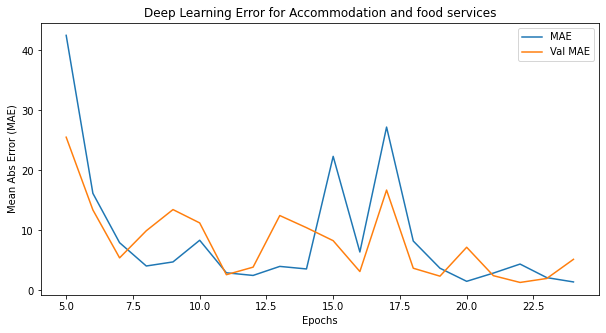

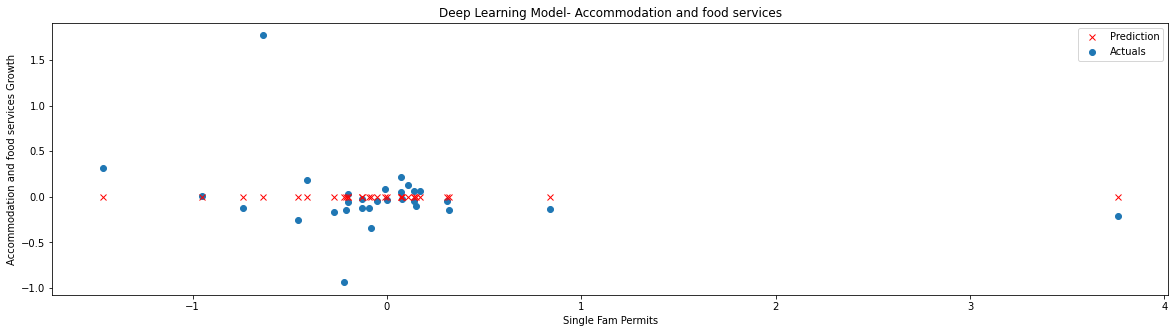

Train on 1287 samples
1287/1287 [==============================] - 0s 63us/sample - loss: 4.8846 - mae: 5.0153
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 178us/sample - loss: 72148.6261 - mae: 72149.1250 - val_loss: 17250.6894 - val_mae: 17251.1895
Epoch 2/25
1029/1029 [==============================] - 0s 39us/sample - loss: 7025.9432 - mae: 7026.4434 - val_loss: 6733.9634 - val_mae: 6734.4639
Epoch 3/25
1029/1029 [==============================] - 0s 47us/sample - loss: 2687.5745 - mae: 2688.0745 - val_loss: 812.1398 - val_mae: 812.6398
Epoch 4/25
1029/1029 [==============================] - 0s 42us/sample - loss: 264.6328 - mae: 265.1204 - val_loss: 70.3805 - val_mae: 70.8239
Epoch 5/25
1029/1029 [==============================] - 0s 37us/sample - loss: 47.6861 - mae: 48.1212 - val_loss: 76.6126 - val_mae: 77.0173
Epoch 6/25
1029/1029 [==============================] - 0s 41us/sample - loss: 37.5504 - mae: 37.9326 - val_

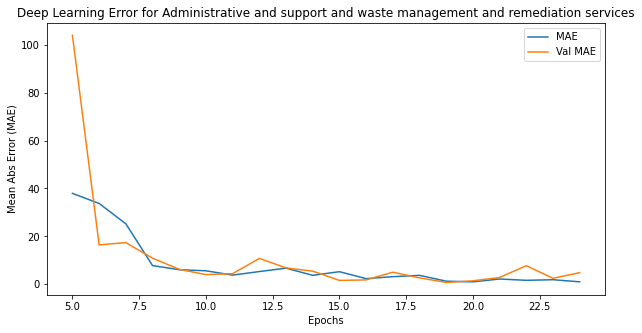

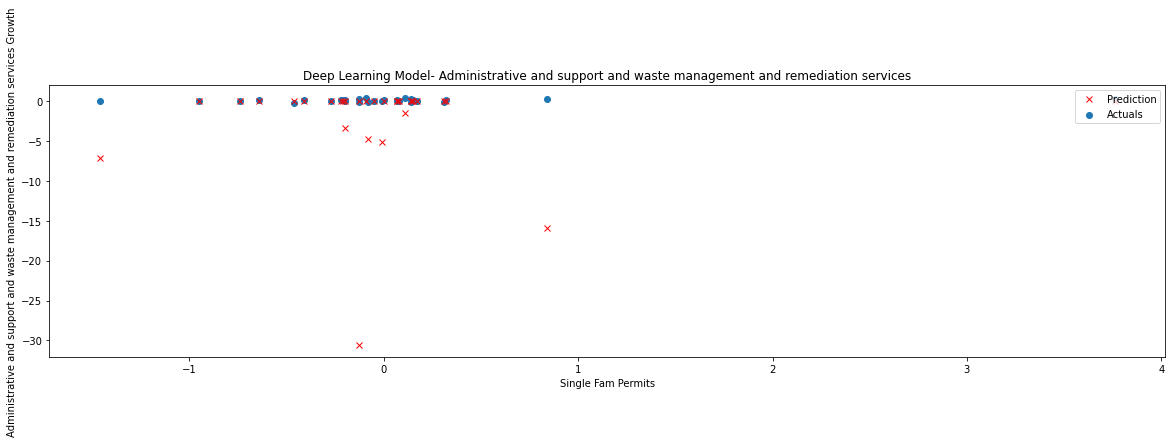

Train on 1287 samples
1287/1287 [==============================] - 0s 63us/sample - loss: 3.1253 - mae: 3.3616
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 170us/sample - loss: 196783.5629 - mae: 196784.0000 - val_loss: 1180.9848 - val_mae: 1181.2338
Epoch 2/25
1029/1029 [==============================] - 0s 41us/sample - loss: 178.9062 - mae: 179.1796 - val_loss: 8.0108 - val_mae: 8.1337
Epoch 3/25
1029/1029 [==============================] - 0s 41us/sample - loss: 4.3612 - mae: 4.5906 - val_loss: 1.9356 - val_mae: 2.0510
Epoch 4/25
1029/1029 [==============================] - 0s 40us/sample - loss: 1.7917 - mae: 2.0193 - val_loss: 0.0434 - val_mae: 0.1520
Epoch 5/25
1029/1029 [==============================] - 0s 44us/sample - loss: 0.7970 - mae: 1.0185 - val_loss: 0.0433 - val_mae: 0.1524
Epoch 6/25
1029/1029 [==============================] - 0s 41us/sample - loss: 0.8174 - mae: 1.0401 - val_loss: 0.0436 - val_mae: 0.1535

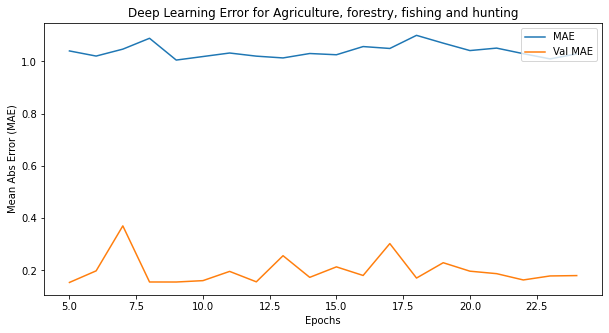

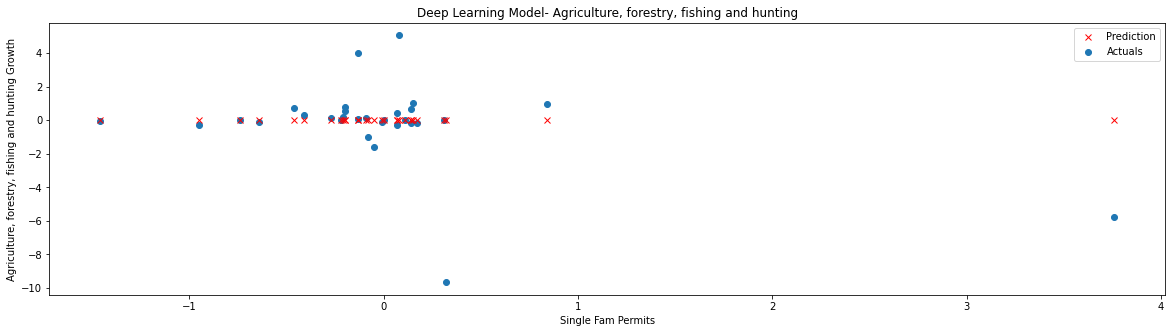

Train on 1287 samples
1287/1287 [==============================] - 0s 58us/sample - loss: 0.7706 - mae: 0.9917
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 166us/sample - loss: 80980.3934 - mae: 80980.8906 - val_loss: 6205.6434 - val_mae: 6206.1436
Epoch 2/25
1029/1029 [==============================] - 0s 38us/sample - loss: 3191.2593 - mae: 3191.7549 - val_loss: 436.2911 - val_mae: 436.6591
Epoch 3/25
1029/1029 [==============================] - 0s 45us/sample - loss: 310.2450 - mae: 310.7277 - val_loss: 328.2817 - val_mae: 328.5817
Epoch 4/25
1029/1029 [==============================] - 0s 44us/sample - loss: 111.5079 - mae: 111.9865 - val_loss: 90.9361 - val_mae: 91.2273
Epoch 5/25
1029/1029 [==============================] - 0s 45us/sample - loss: 58.3272 - mae: 58.8051 - val_loss: 201.4379 - val_mae: 201.7171
Epoch 6/25
1029/1029 [==============================] - 0s 45us/sample - loss: 63.0631 - mae: 63.5413 - val_loss

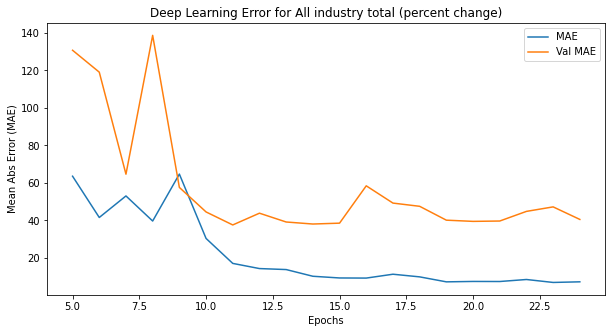

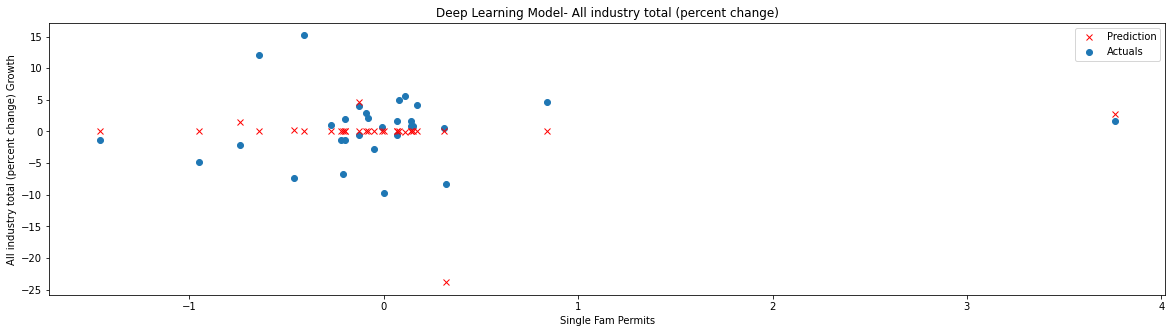

Train on 1287 samples
1287/1287 [==============================] - 0s 58us/sample - loss: 13.2220 - mae: 13.6844
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 159us/sample - loss: 121600.8176 - mae: 121601.3047 - val_loss: 154136.6773 - val_mae: 154137.1875
Epoch 2/25
1029/1029 [==============================] - 0s 43us/sample - loss: 52149.8052 - mae: 52150.3125 - val_loss: 4517.5328 - val_mae: 4518.0322
Epoch 3/25
1029/1029 [==============================] - 0s 39us/sample - loss: 3410.3166 - mae: 3410.8167 - val_loss: 1513.8960 - val_mae: 1514.3960
Epoch 4/25
1029/1029 [==============================] - 0s 39us/sample - loss: 1217.6375 - mae: 1218.1370 - val_loss: 907.4468 - val_mae: 907.9457
Epoch 5/25
1029/1029 [==============================] - 0s 37us/sample - loss: 497.0179 - mae: 497.5159 - val_loss: 612.7818 - val_mae: 613.2798
Epoch 6/25
1029/1029 [==============================] - 0s 38us/sample - loss: 564.8705 - 

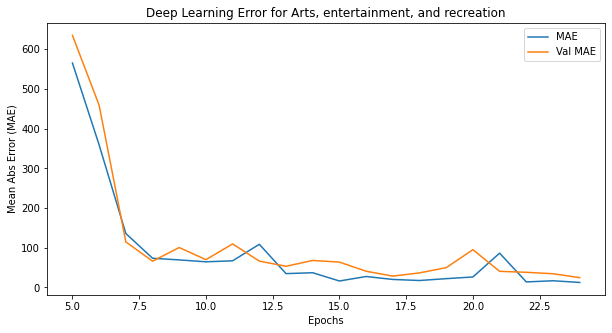

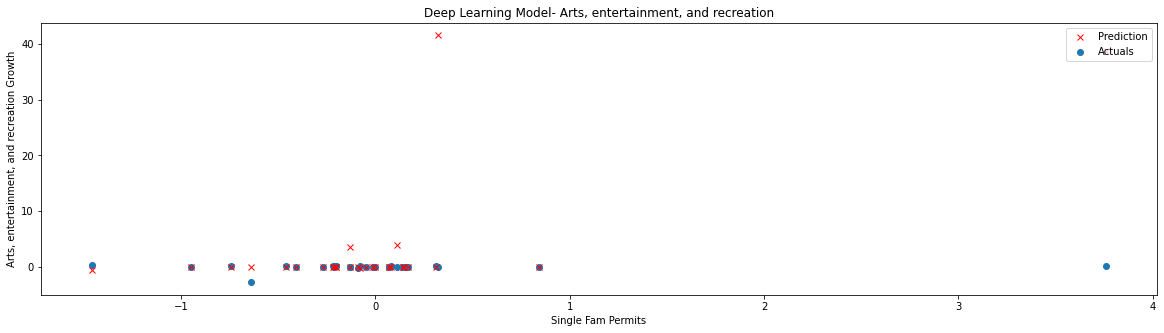

Train on 1287 samples
1287/1287 [==============================] - 0s 58us/sample - loss: 16.3092 - mae: 16.5252
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 158us/sample - loss: 137357.1027 - mae: 137357.6094 - val_loss: 21863.8725 - val_mae: 21864.3730
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 7374.4758 - mae: 7374.9546 - val_loss: 1660.1346 - val_mae: 1660.4310
Epoch 3/25
1029/1029 [==============================] - 0s 38us/sample - loss: 575.4908 - mae: 575.7480 - val_loss: 612.1102 - val_mae: 612.3436
Epoch 4/25
1029/1029 [==============================] - 0s 40us/sample - loss: 237.6627 - mae: 237.8981 - val_loss: 511.2094 - val_mae: 511.4296
Epoch 5/25
1029/1029 [==============================] - 0s 37us/sample - loss: 348.4586 - mae: 348.6934 - val_loss: 132.4902 - val_mae: 132.6998
Epoch 6/25
1029/1029 [==============================] - 0s 38us/sample - loss: 74.3098 - mae: 74.534

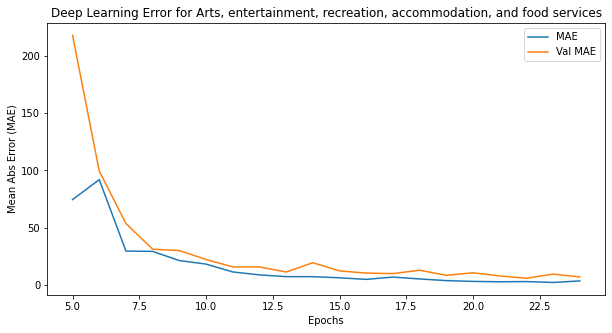

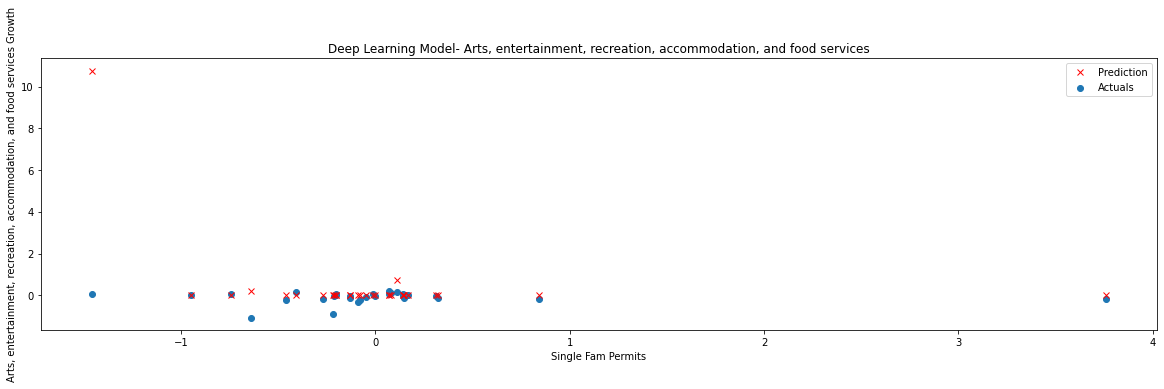

Train on 1287 samples
1287/1287 [==============================] - 0s 59us/sample - loss: 2.7584 - mae: 2.9421
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 168us/sample - loss: 137852.2822 - mae: 137852.7969 - val_loss: 66928.2536 - val_mae: 66928.7500
Epoch 2/25
1029/1029 [==============================] - 0s 49us/sample - loss: 24289.4518 - mae: 24289.9531 - val_loss: 30659.5026 - val_mae: 30660.0039
Epoch 3/25
1029/1029 [==============================] - 0s 39us/sample - loss: 7656.5810 - mae: 7657.0815 - val_loss: 2563.1266 - val_mae: 2563.6267
Epoch 4/25
1029/1029 [==============================] - 0s 45us/sample - loss: 2022.1299 - mae: 2022.6301 - val_loss: 1325.1227 - val_mae: 1325.6226
Epoch 5/25
1029/1029 [==============================] - 0s 44us/sample - loss: 464.4670 - mae: 464.9661 - val_loss: 722.8218 - val_mae: 723.3210
Epoch 6/25
1029/1029 [==============================] - 0s 41us/sample - loss: 307.0749 - 

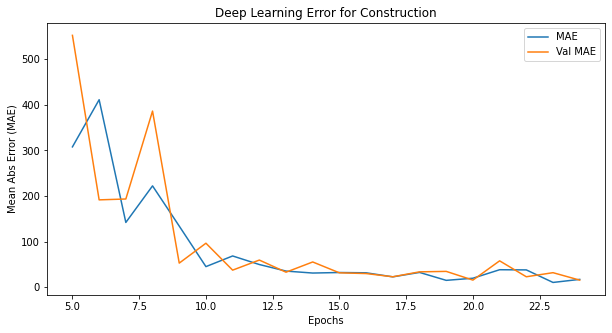

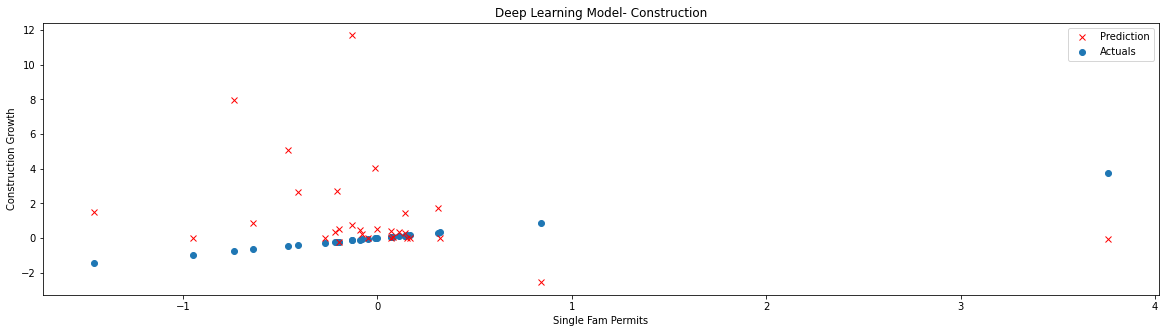

Train on 1287 samples
1287/1287 [==============================] - 0s 61us/sample - loss: 10.5204 - mae: 10.8622
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 166us/sample - loss: 122092.5400 - mae: 122093.0391 - val_loss: 77406.5503 - val_mae: 77407.0547
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 46350.7905 - mae: 46351.2852 - val_loss: 27047.8909 - val_mae: 27048.3906
Epoch 3/25
1029/1029 [==============================] - 0s 43us/sample - loss: 7832.6462 - mae: 7833.1465 - val_loss: 4138.2143 - val_mae: 4138.7144
Epoch 4/25
1029/1029 [==============================] - 0s 44us/sample - loss: 1771.5006 - mae: 1772.0001 - val_loss: 1519.9731 - val_mae: 1520.4731
Epoch 5/25
1029/1029 [==============================] - 0s 38us/sample - loss: 1944.7723 - mae: 1945.2723 - val_loss: 2617.0405 - val_mae: 2617.5408
Epoch 6/25
1029/1029 [==============================] - 0s 37us/sample - loss: 2082.

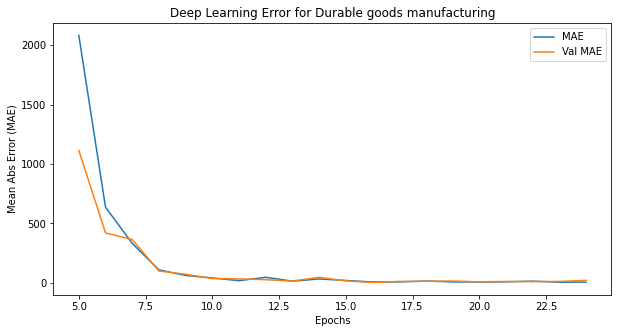

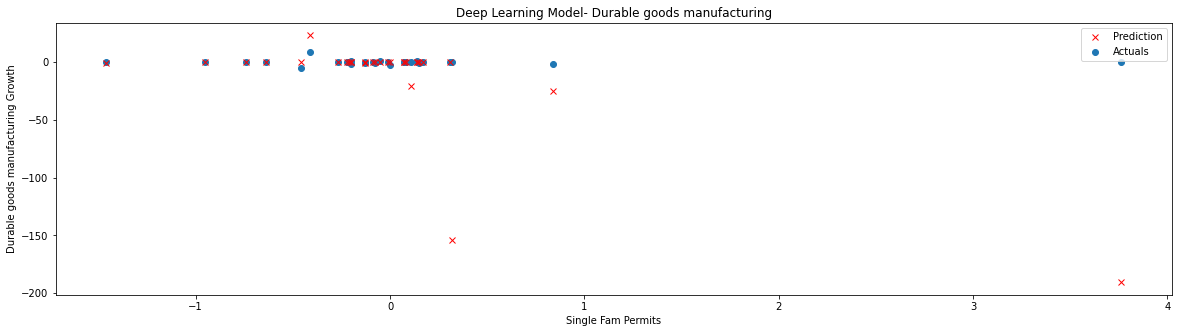

Train on 1287 samples
1287/1287 [==============================] - 0s 58us/sample - loss: 8.9738 - mae: 9.3379
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 184us/sample - loss: 81534.0991 - mae: 81534.6016 - val_loss: 35517.7587 - val_mae: 35518.2539
Epoch 2/25
1029/1029 [==============================] - 0s 40us/sample - loss: 29238.7859 - mae: 29239.2832 - val_loss: 16530.3608 - val_mae: 16530.8613
Epoch 3/25
1029/1029 [==============================] - 0s 37us/sample - loss: 9109.6908 - mae: 9110.1914 - val_loss: 5170.9901 - val_mae: 5171.4883
Epoch 4/25
1029/1029 [==============================] - 0s 38us/sample - loss: 1249.1088 - mae: 1249.4855 - val_loss: 471.0542 - val_mae: 471.3312
Epoch 5/25
1029/1029 [==============================] - 0s 40us/sample - loss: 156.2573 - mae: 156.4626 - val_loss: 77.3176 - val_mae: 77.5519
Epoch 6/25
1029/1029 [==============================] - 0s 39us/sample - loss: 41.5637 - mae: 41

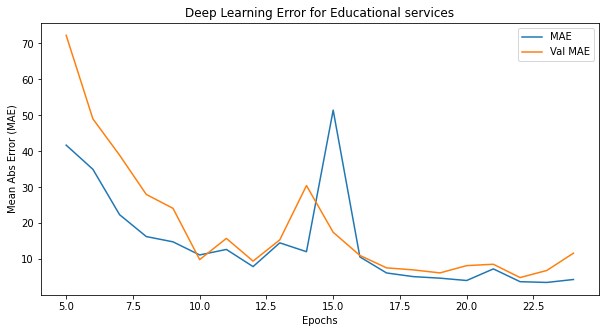

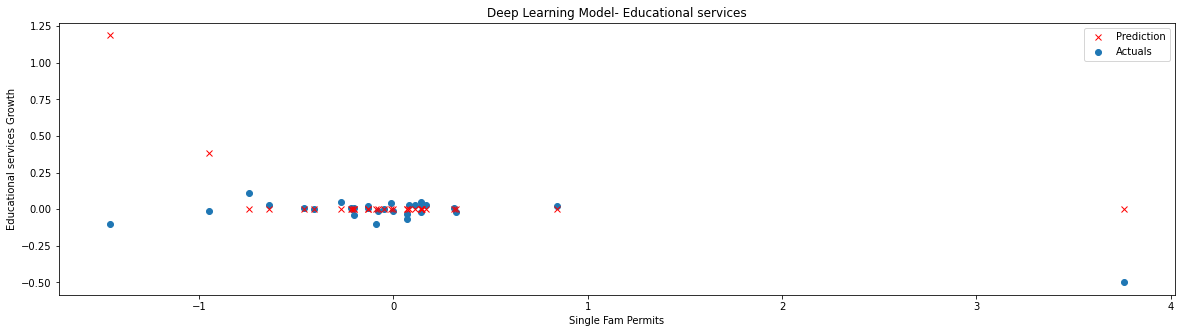

Train on 1287 samples
1287/1287 [==============================] - 0s 57us/sample - loss: 11.4936 - mae: 11.6140
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 163us/sample - loss: 97056.3667 - mae: 97056.8594 - val_loss: 42787.8897 - val_mae: 42788.3906
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 19329.4748 - mae: 19329.9727 - val_loss: 33662.5707 - val_mae: 33663.0703
Epoch 3/25
1029/1029 [==============================] - 0s 42us/sample - loss: 14029.5014 - mae: 14030.0020 - val_loss: 9611.6564 - val_mae: 9612.1572
Epoch 4/25
1029/1029 [==============================] - 0s 41us/sample - loss: 5795.4692 - mae: 5795.9688 - val_loss: 4084.7586 - val_mae: 4085.2583
Epoch 5/25
1029/1029 [==============================] - 0s 45us/sample - loss: 4314.0192 - mae: 4314.5190 - val_loss: 1428.1483 - val_mae: 1428.6483
Epoch 6/25
1029/1029 [==============================] - 0s 45us/sample - loss: 2124.

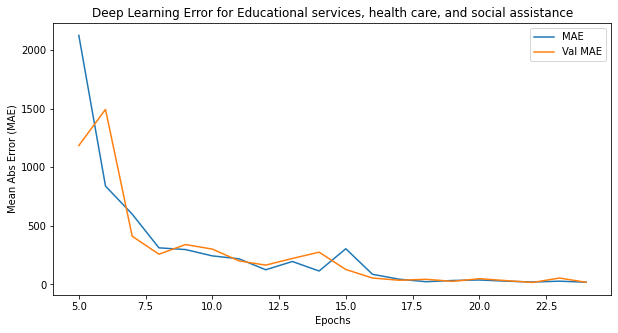

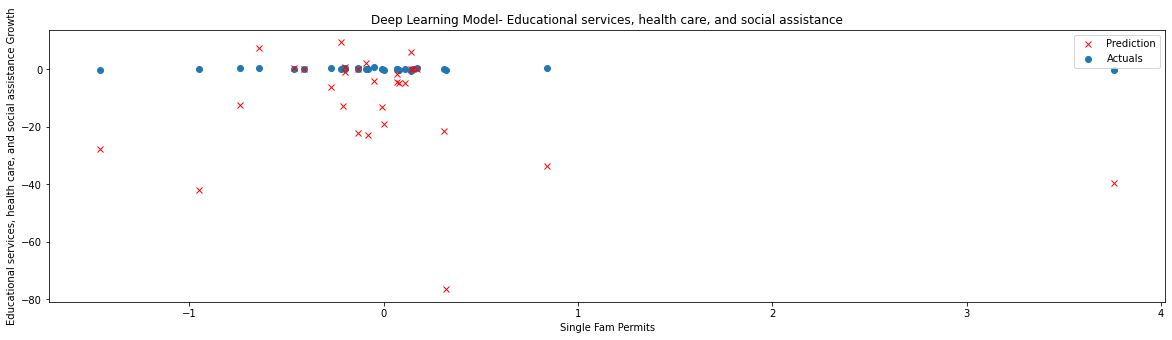

Train on 1287 samples
1287/1287 [==============================] - 0s 60us/sample - loss: 15.3281 - mae: 15.7366
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 160us/sample - loss: 140784.4775 - mae: 140784.9688 - val_loss: 55901.6611 - val_mae: 55902.1602
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 15095.0264 - mae: 15095.5244 - val_loss: 6015.0733 - val_mae: 6015.5732
Epoch 3/25
1029/1029 [==============================] - 0s 42us/sample - loss: 4361.5336 - mae: 4362.0327 - val_loss: 7255.3898 - val_mae: 7255.8901
Epoch 4/25
1029/1029 [==============================] - 0s 38us/sample - loss: 7095.5245 - mae: 7096.0234 - val_loss: 1656.4776 - val_mae: 1656.9775
Epoch 5/25
1029/1029 [==============================] - 0s 37us/sample - loss: 1061.3684 - mae: 1061.8685 - val_loss: 1037.7808 - val_mae: 1038.2792
Epoch 6/25
1029/1029 [==============================] - 0s 43us/sample - loss: 531.657

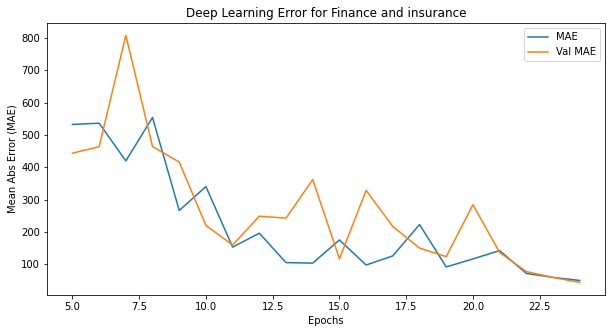

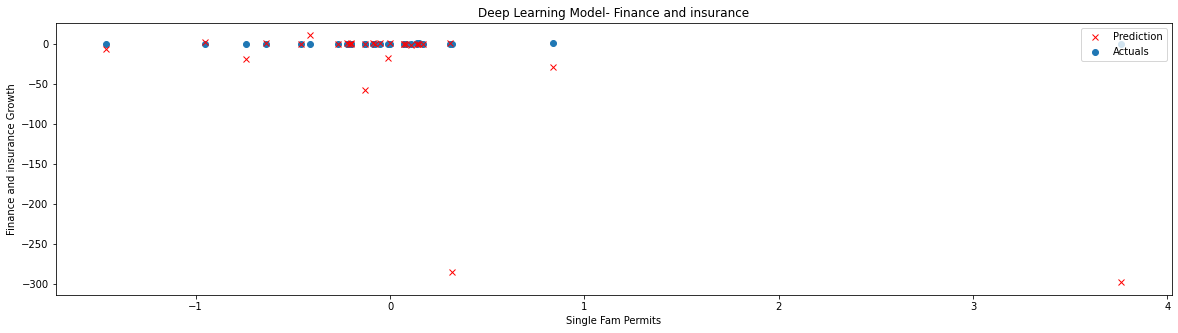

Train on 1287 samples
1287/1287 [==============================] - 0s 66us/sample - loss: 62.5422 - mae: 62.9339
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 169us/sample - loss: 102636.0666 - mae: 102636.5703 - val_loss: 9329.7426 - val_mae: 9330.2422
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 5473.2545 - mae: 5473.7534 - val_loss: 1307.5888 - val_mae: 1308.0886
Epoch 3/25
1029/1029 [==============================] - 0s 43us/sample - loss: 1269.5785 - mae: 1270.0779 - val_loss: 3374.7090 - val_mae: 3375.2092
Epoch 4/25
1029/1029 [==============================] - 0s 44us/sample - loss: 988.8774 - mae: 989.3754 - val_loss: 237.4788 - val_mae: 237.9601
Epoch 5/25
1029/1029 [==============================] - 0s 38us/sample - loss: 222.0794 - mae: 222.5613 - val_loss: 224.0915 - val_mae: 224.5340
Epoch 6/25
1029/1029 [==============================] - 0s 38us/sample - loss: 163.1633 - mae: 163

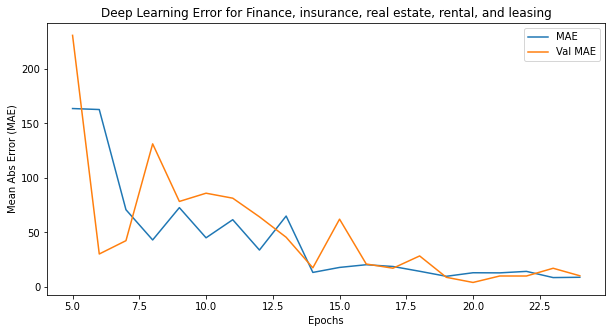

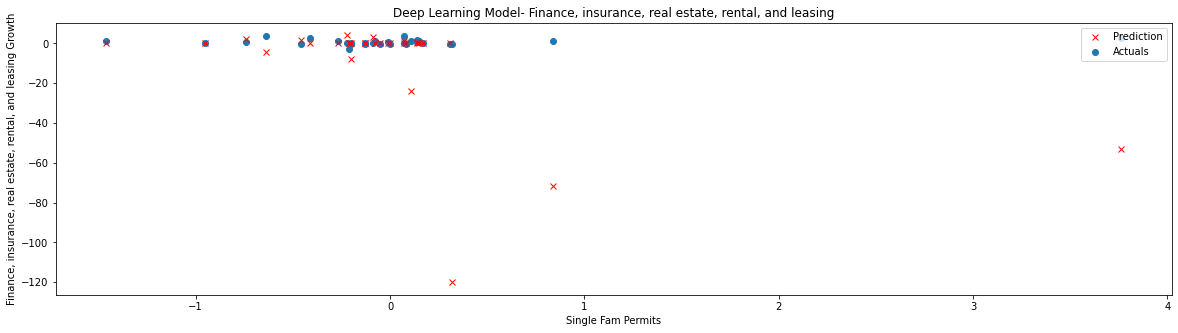

Train on 1287 samples
1287/1287 [==============================] - 0s 63us/sample - loss: 13.8315 - mae: 14.2397
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 191us/sample - loss: 172489.5145 - mae: 172489.9844 - val_loss: 96235.0935 - val_mae: 96235.5859
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 25315.3694 - mae: 25315.8652 - val_loss: 30698.7385 - val_mae: 30699.2363
Epoch 3/25
1029/1029 [==============================] - 0s 45us/sample - loss: 15696.6940 - mae: 15697.1963 - val_loss: 5377.8717 - val_mae: 5378.3711
Epoch 4/25
1029/1029 [==============================] - 0s 38us/sample - loss: 6944.5051 - mae: 6945.0054 - val_loss: 10432.8322 - val_mae: 10433.3320
Epoch 5/25
1029/1029 [==============================] - 0s 40us/sample - loss: 3420.2272 - mae: 3420.7271 - val_loss: 9558.5158 - val_mae: 9559.0166
Epoch 6/25
1029/1029 [==============================] - 0s 45us/sample - loss: 4

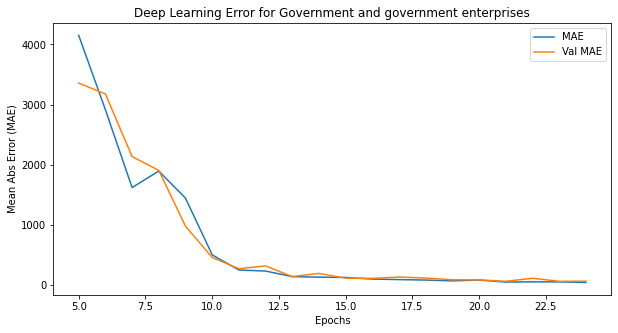

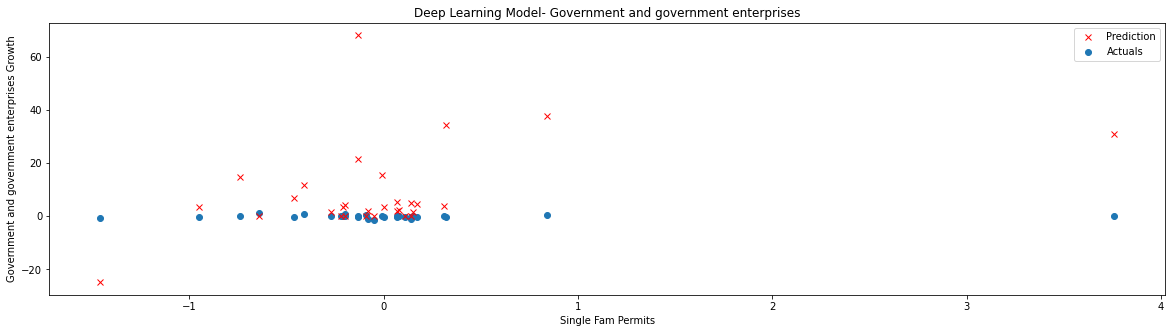

Train on 1287 samples
1287/1287 [==============================] - 0s 63us/sample - loss: 32.9096 - mae: 33.3552
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 167us/sample - loss: 207554.7682 - mae: 207555.2969 - val_loss: 66968.9725 - val_mae: 66969.4766
Epoch 2/25
1029/1029 [==============================] - 0s 47us/sample - loss: 40245.5116 - mae: 40246.0117 - val_loss: 1420.5094 - val_mae: 1420.9183
Epoch 3/25
1029/1029 [==============================] - 0s 48us/sample - loss: 416.3265 - mae: 416.7399 - val_loss: 111.3837 - val_mae: 111.7375
Epoch 4/25
1029/1029 [==============================] - 0s 41us/sample - loss: 191.3804 - mae: 191.7386 - val_loss: 76.6040 - val_mae: 76.8720
Epoch 5/25
1029/1029 [==============================] - 0s 43us/sample - loss: 289.1295 - mae: 289.4544 - val_loss: 359.5550 - val_mae: 359.8095
Epoch 6/25
1029/1029 [==============================] - 0s 45us/sample - loss: 417.2746 - mae: 417.5

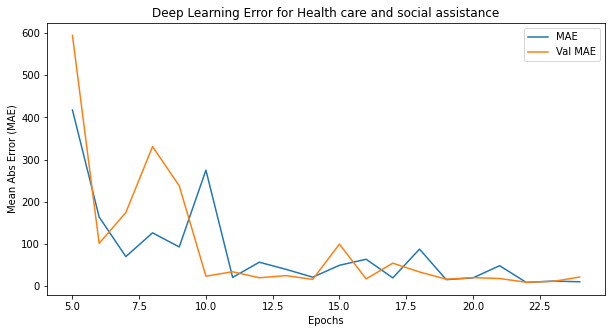

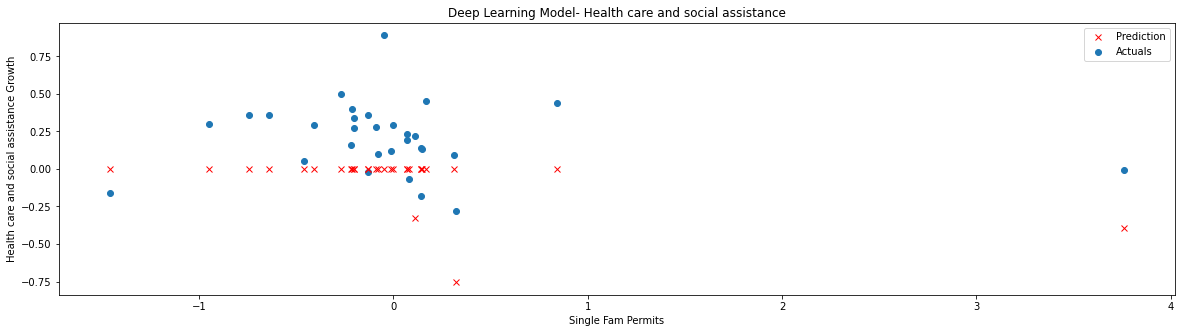

Train on 1287 samples
1287/1287 [==============================] - 0s 63us/sample - loss: 28.0660 - mae: 28.3062
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 171us/sample - loss: 115586.4730 - mae: 115586.9766 - val_loss: 6853.1523 - val_mae: 6853.6519
Epoch 2/25
1029/1029 [==============================] - 0s 38us/sample - loss: 6478.2747 - mae: 6478.7749 - val_loss: 5889.2841 - val_mae: 5889.7837
Epoch 3/25
1029/1029 [==============================] - 0s 40us/sample - loss: 2099.4009 - mae: 2099.9009 - val_loss: 705.3750 - val_mae: 705.8751
Epoch 4/25
1029/1029 [==============================] - 0s 38us/sample - loss: 406.4124 - mae: 406.9120 - val_loss: 397.3376 - val_mae: 397.8368
Epoch 5/25
1029/1029 [==============================] - 0s 40us/sample - loss: 428.0657 - mae: 428.5656 - val_loss: 760.5960 - val_mae: 761.0961
Epoch 6/25
1029/1029 [==============================] - 0s 39us/sample - loss: 337.5322 - mae: 338.0

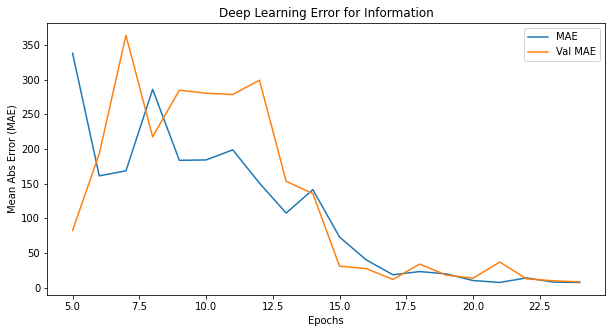

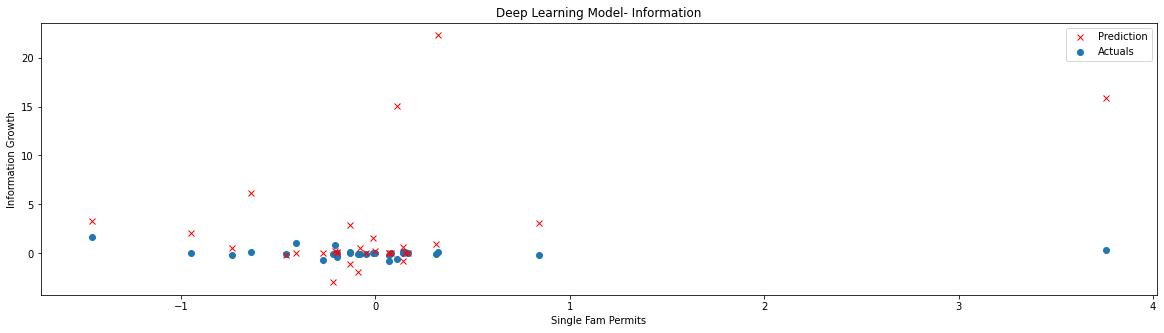

Train on 1287 samples
1287/1287 [==============================] - 0s 54us/sample - loss: 6.8253 - mae: 7.1533
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 169us/sample - loss: 76830.6449 - mae: 76831.1406 - val_loss: 10312.8805 - val_mae: 10313.3809
Epoch 2/25
1029/1029 [==============================] - 0s 44us/sample - loss: 4681.1146 - mae: 4681.6138 - val_loss: 1822.1033 - val_mae: 1822.6022
Epoch 3/25
1029/1029 [==============================] - 0s 42us/sample - loss: 1094.5709 - mae: 1095.0708 - val_loss: 784.0863 - val_mae: 784.5862
Epoch 4/25
1029/1029 [==============================] - 0s 39us/sample - loss: 541.4207 - mae: 541.9205 - val_loss: 302.1195 - val_mae: 302.6182
Epoch 5/25
1029/1029 [==============================] - 0s 38us/sample - loss: 101.8228 - mae: 102.3217 - val_loss: 99.2232 - val_mae: 99.7167
Epoch 6/25
1029/1029 [==============================] - 0s 39us/sample - loss: 50.7705 - mae: 51.2075 - 

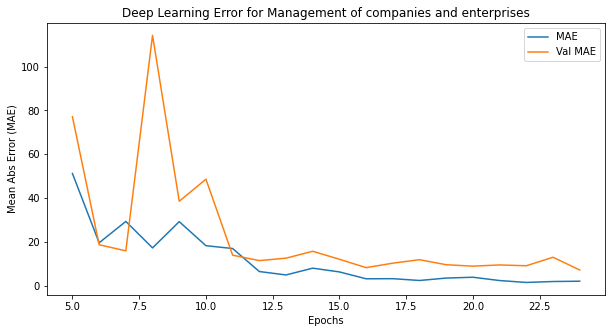

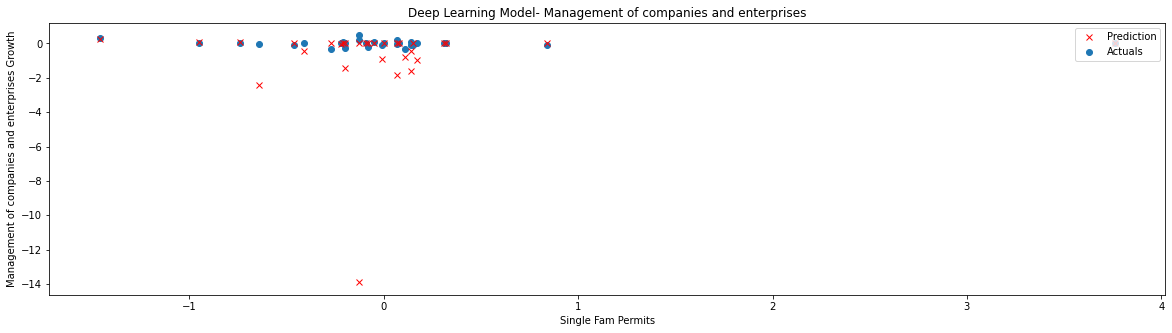

Train on 1287 samples
1287/1287 [==============================] - 0s 59us/sample - loss: 4.0025 - mae: 4.2904
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 160us/sample - loss: 93183.8874 - mae: 93184.3906 - val_loss: 17602.1957 - val_mae: 17602.6953
Epoch 2/25
1029/1029 [==============================] - 0s 45us/sample - loss: 20506.6360 - mae: 20507.1328 - val_loss: 9254.4196 - val_mae: 9254.9199
Epoch 3/25
1029/1029 [==============================] - 0s 39us/sample - loss: 11389.4939 - mae: 11389.9941 - val_loss: 18054.9978 - val_mae: 18055.4980
Epoch 4/25
1029/1029 [==============================] - 0s 37us/sample - loss: 10217.8365 - mae: 10218.3350 - val_loss: 4372.6946 - val_mae: 4373.1948
Epoch 5/25
1029/1029 [==============================] - 0s 38us/sample - loss: 2295.8062 - mae: 2296.3066 - val_loss: 1199.7987 - val_mae: 1200.2975
Epoch 6/25
1029/1029 [==============================] - 0s 38us/sample - loss: 635.8

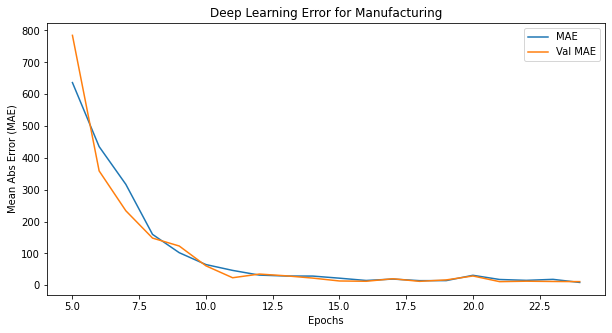

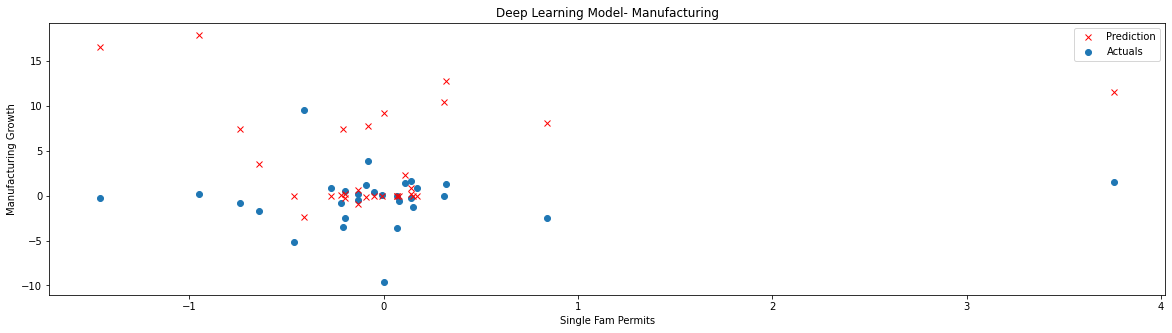

Train on 1287 samples
1287/1287 [==============================] - 0s 63us/sample - loss: 9.8229 - mae: 10.2492
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 172us/sample - loss: 104801.9237 - mae: 104802.4141 - val_loss: 19410.8392 - val_mae: 19411.3398
Epoch 2/25
1029/1029 [==============================] - 0s 48us/sample - loss: 4961.2329 - mae: 4961.7334 - val_loss: 782.2060 - val_mae: 782.7060
Epoch 3/25
1029/1029 [==============================] - 0s 45us/sample - loss: 1059.6925 - mae: 1060.1924 - val_loss: 507.0351 - val_mae: 507.5349
Epoch 4/25
1029/1029 [==============================] - 0s 38us/sample - loss: 315.3569 - mae: 315.8560 - val_loss: 513.7116 - val_mae: 514.2115
Epoch 5/25
1029/1029 [==============================] - 0s 39us/sample - loss: 278.3846 - mae: 278.8832 - val_loss: 415.5079 - val_mae: 416.0078
Epoch 6/25
1029/1029 [==============================] - 0s 39us/sample - loss: 266.6866 - mae: 267.18

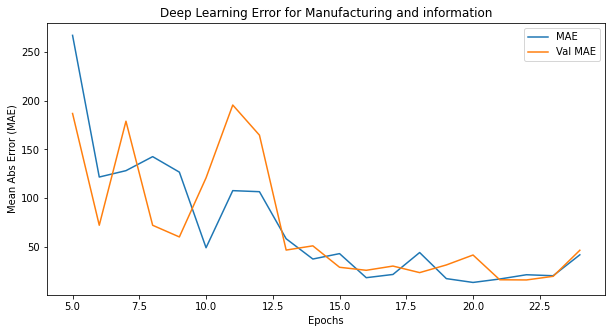

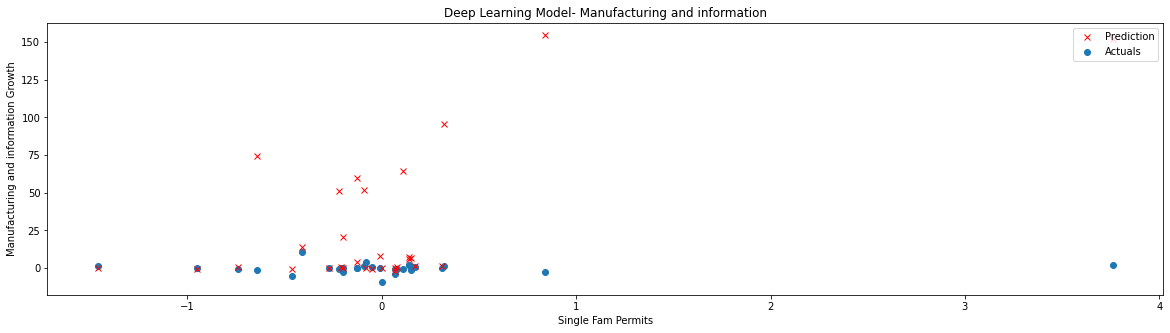

Train on 1287 samples
1287/1287 [==============================] - 0s 56us/sample - loss: 30.4177 - mae: 30.8749
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 157us/sample - loss: 49678.6780 - mae: 49679.1758 - val_loss: 31614.1261 - val_mae: 31614.6270
Epoch 2/25
1029/1029 [==============================] - 0s 43us/sample - loss: 22711.4709 - mae: 22711.9746 - val_loss: 24013.5000 - val_mae: 24014.0000
Epoch 3/25
1029/1029 [==============================] - 0s 39us/sample - loss: 7209.7763 - mae: 7210.2754 - val_loss: 3786.0256 - val_mae: 3786.5254
Epoch 4/25
1029/1029 [==============================] - 0s 43us/sample - loss: 2003.1931 - mae: 2003.6921 - val_loss: 2053.6549 - val_mae: 2054.1550
Epoch 5/25
1029/1029 [==============================] - 0s 42us/sample - loss: 1081.0267 - mae: 1081.5067 - val_loss: 233.5439 - val_mae: 234.0001
Epoch 6/25
1029/1029 [==============================] - 0s 43us/sample - loss: 160.3030 

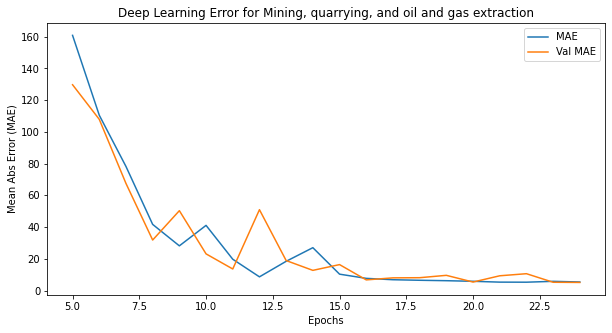

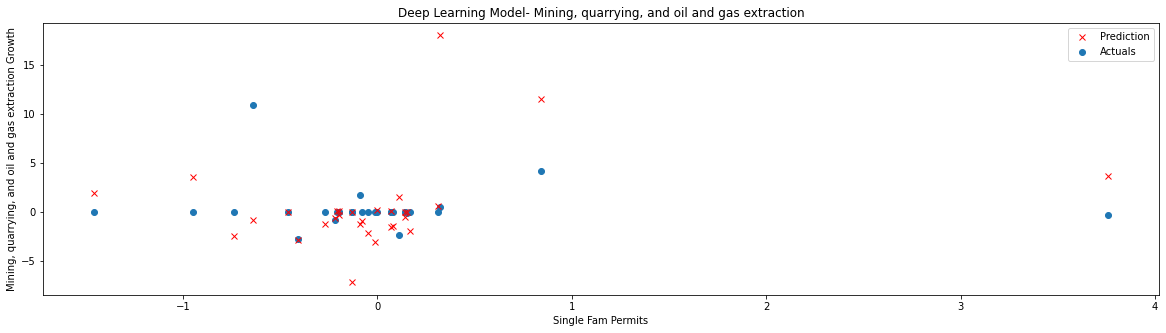

Train on 1287 samples
1287/1287 [==============================] - 0s 64us/sample - loss: 4.7744 - mae: 5.0798
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 163us/sample - loss: 170607.3490 - mae: 170607.8281 - val_loss: 27697.2843 - val_mae: 27697.7852
Epoch 2/25
1029/1029 [==============================] - 0s 40us/sample - loss: 13166.1504 - mae: 13166.6338 - val_loss: 2460.5350 - val_mae: 2460.8584
Epoch 3/25
1029/1029 [==============================] - 0s 39us/sample - loss: 678.2502 - mae: 678.6150 - val_loss: 227.2927 - val_mae: 227.5348
Epoch 4/25
1029/1029 [==============================] - 0s 40us/sample - loss: 93.0733 - mae: 93.4155 - val_loss: 86.5096 - val_mae: 86.7311
Epoch 5/25
1029/1029 [==============================] - 0s 41us/sample - loss: 50.4151 - mae: 50.7500 - val_loss: 61.9283 - val_mae: 62.1317
Epoch 6/25
1029/1029 [==============================] - 0s 40us/sample - loss: 41.1270 - mae: 41.4553 - val_

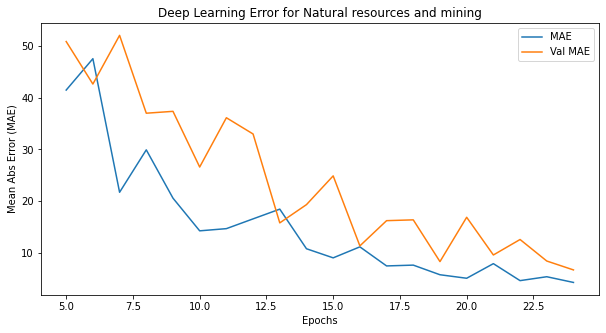

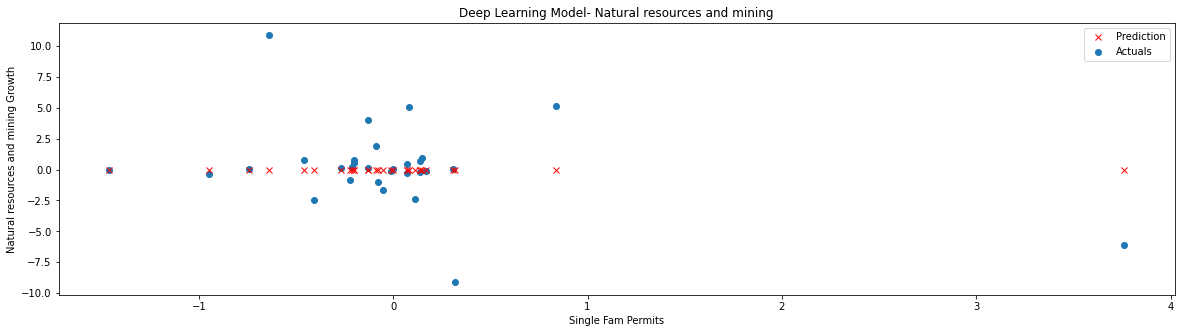

Train on 1287 samples
1287/1287 [==============================] - 0s 59us/sample - loss: 4.7611 - mae: 5.0563
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 166us/sample - loss: 85985.1131 - mae: 85985.6172 - val_loss: 34182.8071 - val_mae: 34183.3047
Epoch 2/25
1029/1029 [==============================] - 0s 39us/sample - loss: 17178.2477 - mae: 17178.7441 - val_loss: 7344.6930 - val_mae: 7345.1934
Epoch 3/25
1029/1029 [==============================] - 0s 40us/sample - loss: 10715.6274 - mae: 10716.1279 - val_loss: 10920.5014 - val_mae: 10921.0010
Epoch 4/25
1029/1029 [==============================] - 0s 40us/sample - loss: 6732.7161 - mae: 6733.2168 - val_loss: 3682.9779 - val_mae: 3683.4778
Epoch 5/25
1029/1029 [==============================] - 0s 38us/sample - loss: 1324.9869 - mae: 1325.4397 - val_loss: 669.1734 - val_mae: 669.4261
Epoch 6/25
1029/1029 [==============================] - 0s 39us/sample - loss: 730.0663 

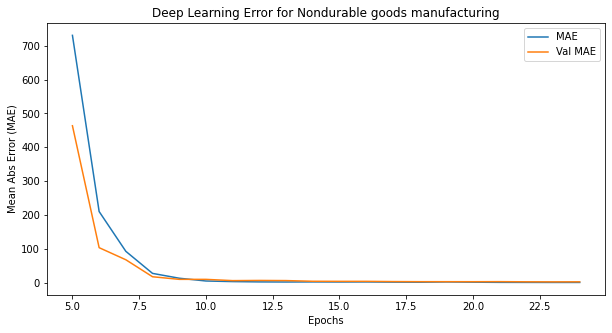

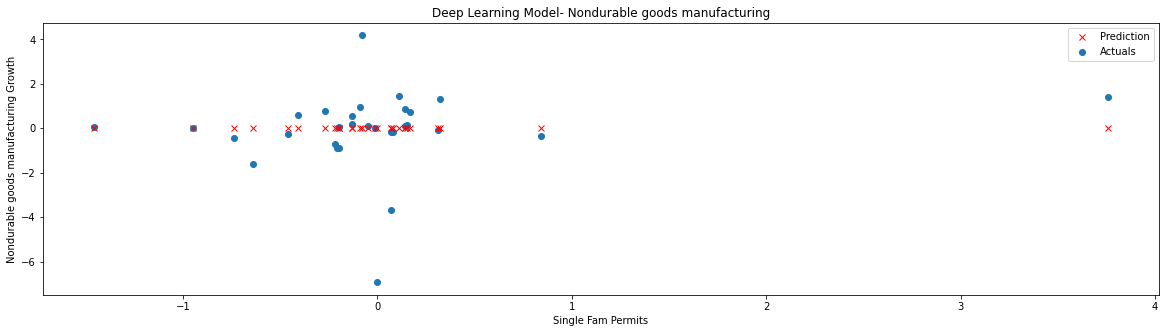

Train on 1287 samples
1287/1287 [==============================] - 0s 61us/sample - loss: 0.9277 - mae: 1.1855
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 161us/sample - loss: 102555.3672 - mae: 102555.8828 - val_loss: 145629.3226 - val_mae: 145629.8281
Epoch 2/25
1029/1029 [==============================] - 0s 41us/sample - loss: 33101.8879 - mae: 33102.3906 - val_loss: 23923.9607 - val_mae: 23924.4590
Epoch 3/25
1029/1029 [==============================] - 0s 58us/sample - loss: 11863.0801 - mae: 11863.5811 - val_loss: 900.0069 - val_mae: 900.5035
Epoch 4/25
1029/1029 [==============================] - 0s 41us/sample - loss: 353.8355 - mae: 354.2024 - val_loss: 145.8104 - val_mae: 146.1157
Epoch 5/25
1029/1029 [==============================] - 0s 38us/sample - loss: 78.4597 - mae: 78.7359 - val_loss: 37.8265 - val_mae: 38.1044
Epoch 6/25
1029/1029 [==============================] - 0s 45us/sample - loss: 23.5409 - mae: 23

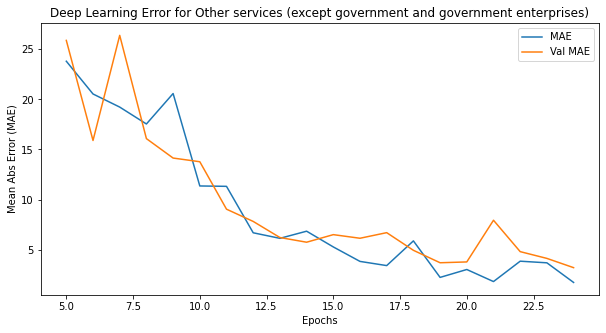

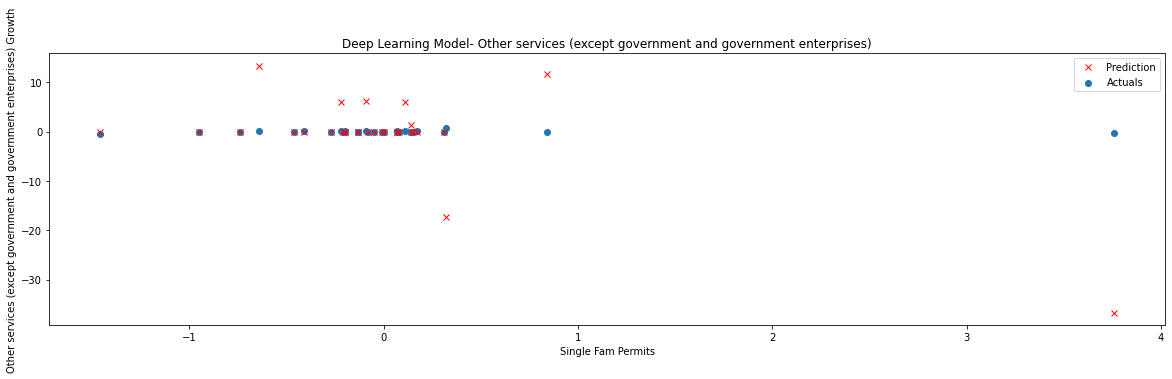

Train on 1287 samples
1287/1287 [==============================] - 0s 64us/sample - loss: 2.3350 - mae: 2.5462
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 169us/sample - loss: 110158.1276 - mae: 110158.6406 - val_loss: 23830.1229 - val_mae: 23830.6230
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 13343.2478 - mae: 13343.7471 - val_loss: 31566.2254 - val_mae: 31566.7246
Epoch 3/25
1029/1029 [==============================] - 0s 47us/sample - loss: 13116.3034 - mae: 13116.8047 - val_loss: 10220.3063 - val_mae: 10220.8076
Epoch 4/25
1029/1029 [==============================] - 0s 47us/sample - loss: 2202.5434 - mae: 2203.0432 - val_loss: 360.7012 - val_mae: 361.1993
Epoch 5/25
1029/1029 [==============================] - 0s 40us/sample - loss: 153.6560 - mae: 154.1459 - val_loss: 91.8619 - val_mae: 92.2997
Epoch 6/25
1029/1029 [==============================] - 0s 41us/sample - loss: 71.2429 - m

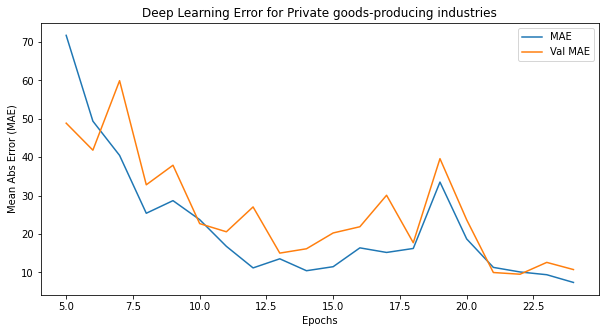

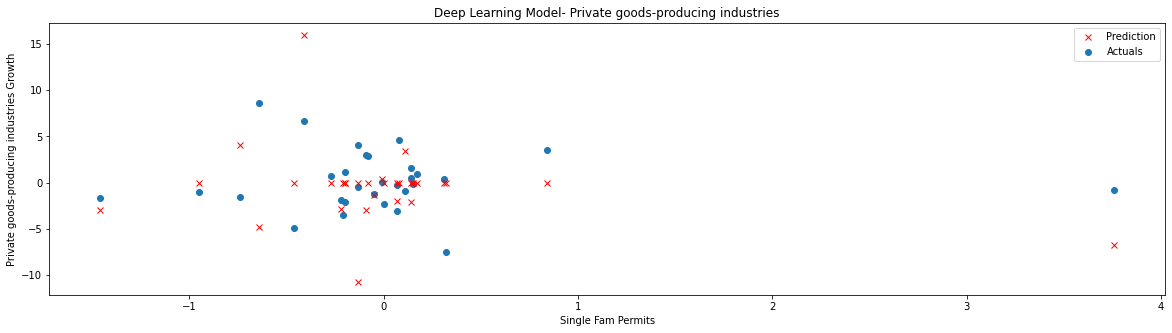

Train on 1287 samples
1287/1287 [==============================] - 0s 61us/sample - loss: 8.6949 - mae: 9.1412
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 166us/sample - loss: 182800.9038 - mae: 182801.4062 - val_loss: 82857.4611 - val_mae: 82857.9531
Epoch 2/25
1029/1029 [==============================] - 0s 40us/sample - loss: 34764.5175 - mae: 34765.0234 - val_loss: 17078.3966 - val_mae: 17078.8965
Epoch 3/25
1029/1029 [==============================] - 0s 41us/sample - loss: 6907.9134 - mae: 6908.4141 - val_loss: 2214.6571 - val_mae: 2215.1562
Epoch 4/25
1029/1029 [==============================] - 0s 41us/sample - loss: 1138.9947 - mae: 1139.4946 - val_loss: 3051.0841 - val_mae: 3051.5840
Epoch 5/25
1029/1029 [==============================] - 0s 41us/sample - loss: 1545.6665 - mae: 1546.1639 - val_loss: 2814.9319 - val_mae: 2815.4319
Epoch 6/25
1029/1029 [==============================] - 0s 41us/sample - loss: 730.460

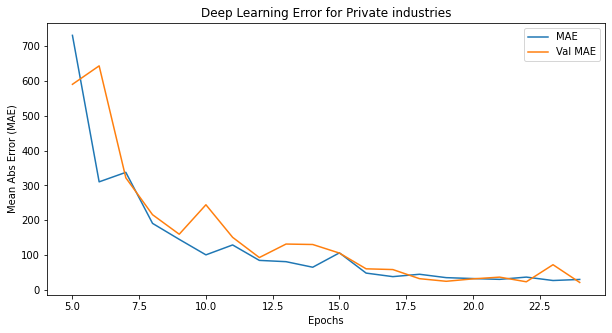

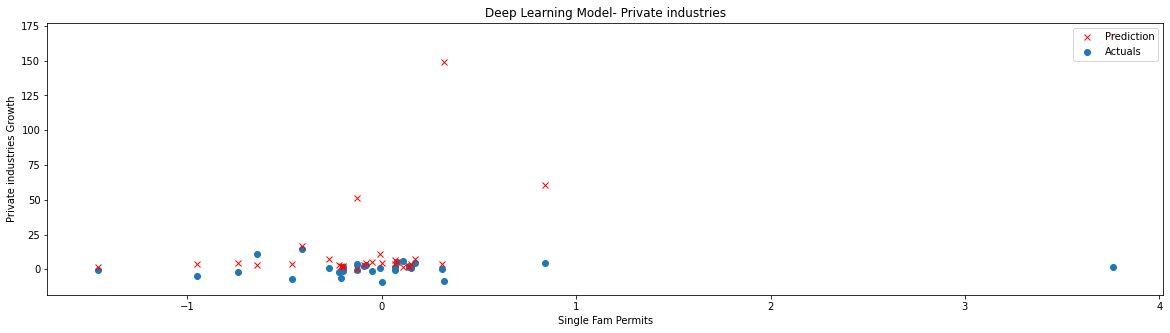

Train on 1287 samples
1287/1287 [==============================] - 0s 57us/sample - loss: 29.2284 - mae: 29.7017
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 161us/sample - loss: 159994.3983 - mae: 159994.9219 - val_loss: 21015.4059 - val_mae: 21015.9043
Epoch 2/25
1029/1029 [==============================] - 0s 39us/sample - loss: 6776.6019 - mae: 6777.1006 - val_loss: 6682.8813 - val_mae: 6683.3809
Epoch 3/25
1029/1029 [==============================] - 0s 40us/sample - loss: 2296.4165 - mae: 2296.9089 - val_loss: 1838.4469 - val_mae: 1838.8542
Epoch 4/25
1029/1029 [==============================] - 0s 40us/sample - loss: 714.2534 - mae: 714.7186 - val_loss: 525.7644 - val_mae: 526.0687
Epoch 5/25
1029/1029 [==============================] - 0s 40us/sample - loss: 188.0757 - mae: 188.5309 - val_loss: 182.0413 - val_mae: 182.3294
Epoch 6/25
1029/1029 [==============================] - 0s 42us/sample - loss: 129.0190 - mae: 1

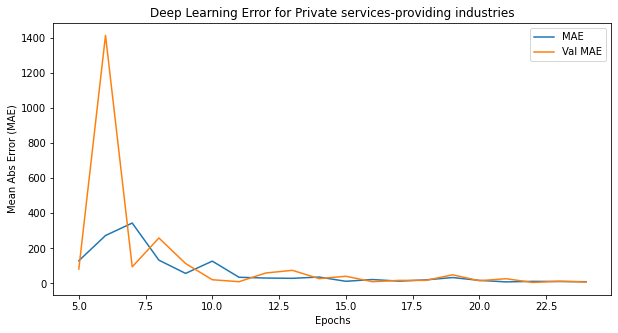

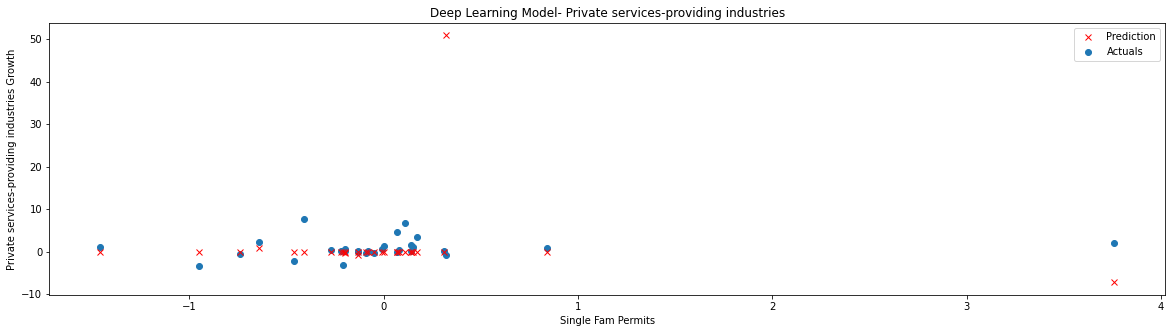

Train on 1287 samples
1287/1287 [==============================] - 0s 57us/sample - loss: 12.3600 - mae: 12.7976
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 159us/sample - loss: 97295.6546 - mae: 97296.1641 - val_loss: 72577.7841 - val_mae: 72578.2969
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 19404.4733 - mae: 19404.9746 - val_loss: 16846.4224 - val_mae: 16846.9219
Epoch 3/25
1029/1029 [==============================] - 0s 38us/sample - loss: 5993.5859 - mae: 5994.0874 - val_loss: 5838.7861 - val_mae: 5839.2856
Epoch 4/25
1029/1029 [==============================] - 0s 38us/sample - loss: 3148.9824 - mae: 3149.4824 - val_loss: 2733.0895 - val_mae: 2733.5894
Epoch 5/25
1029/1029 [==============================] - 0s 39us/sample - loss: 1793.1618 - mae: 1793.6619 - val_loss: 1227.2576 - val_mae: 1227.7577
Epoch 6/25
1029/1029 [==============================] - 0s 39us/sample - loss: 1489.46

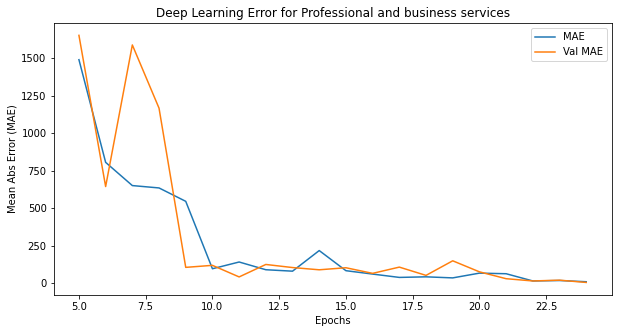

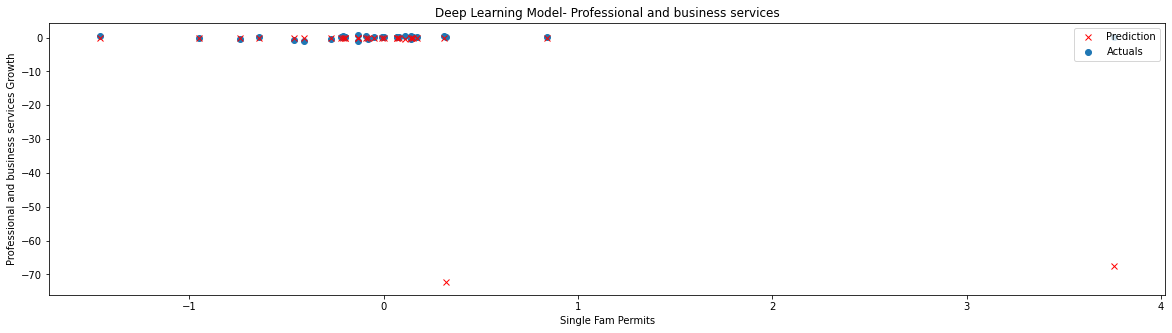

Train on 1287 samples
1287/1287 [==============================] - 0s 63us/sample - loss: 21.3352 - mae: 21.6339
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 177us/sample - loss: 106249.9103 - mae: 106250.4141 - val_loss: 21699.1230 - val_mae: 21699.6250
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 22538.9232 - mae: 22539.4219 - val_loss: 7951.0852 - val_mae: 7951.5840
Epoch 3/25
1029/1029 [==============================] - 0s 39us/sample - loss: 2264.6550 - mae: 2265.1536 - val_loss: 237.1805 - val_mae: 237.6504
Epoch 4/25
1029/1029 [==============================] - 0s 41us/sample - loss: 101.7431 - mae: 102.1332 - val_loss: 64.4561 - val_mae: 64.7301
Epoch 5/25
1029/1029 [==============================] - 0s 37us/sample - loss: 36.6743 - mae: 36.9487 - val_loss: 44.2809 - val_mae: 44.4677
Epoch 6/25
1029/1029 [==============================] - 0s 40us/sample - loss: 22.2739 - mae: 22.5248 

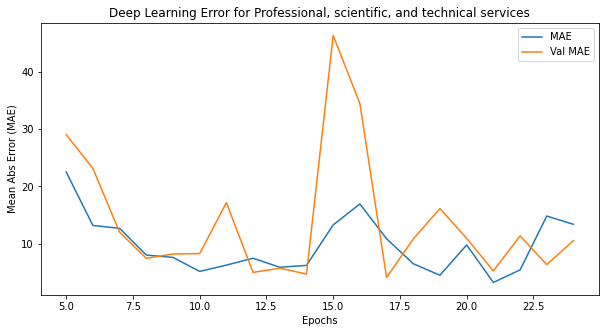

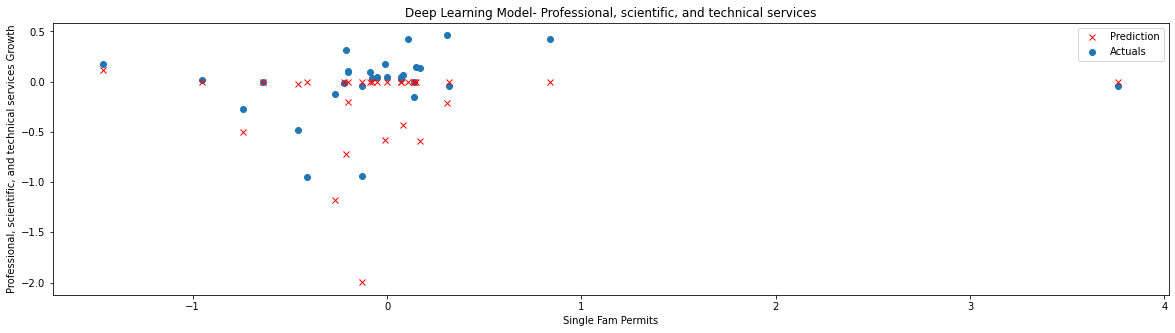

Train on 1287 samples
1287/1287 [==============================] - 0s 57us/sample - loss: 6.0993 - mae: 6.3261
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 176us/sample - loss: 111817.1358 - mae: 111817.6250 - val_loss: 90529.6888 - val_mae: 90530.1875
Epoch 2/25
1029/1029 [==============================] - 0s 41us/sample - loss: 63129.1951 - mae: 63129.6953 - val_loss: 22450.6558 - val_mae: 22451.1543
Epoch 3/25
1029/1029 [==============================] - 0s 40us/sample - loss: 4222.4165 - mae: 4222.8740 - val_loss: 1853.9033 - val_mae: 1854.2122
Epoch 4/25
1029/1029 [==============================] - 0s 40us/sample - loss: 902.6131 - mae: 903.0091 - val_loss: 820.4095 - val_mae: 820.6791
Epoch 5/25
1029/1029 [==============================] - 0s 40us/sample - loss: 429.7839 - mae: 430.1713 - val_loss: 517.8959 - val_mae: 518.1606
Epoch 6/25
1029/1029 [==============================] - 0s 40us/sample - loss: 403.7892 - mae:

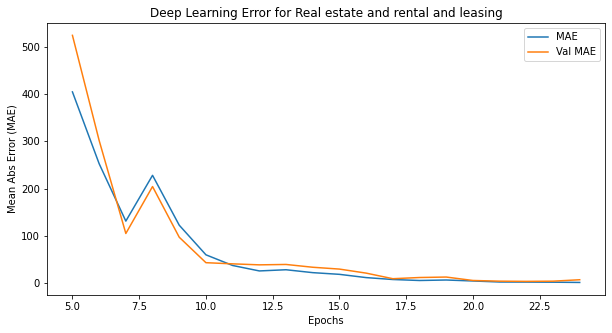

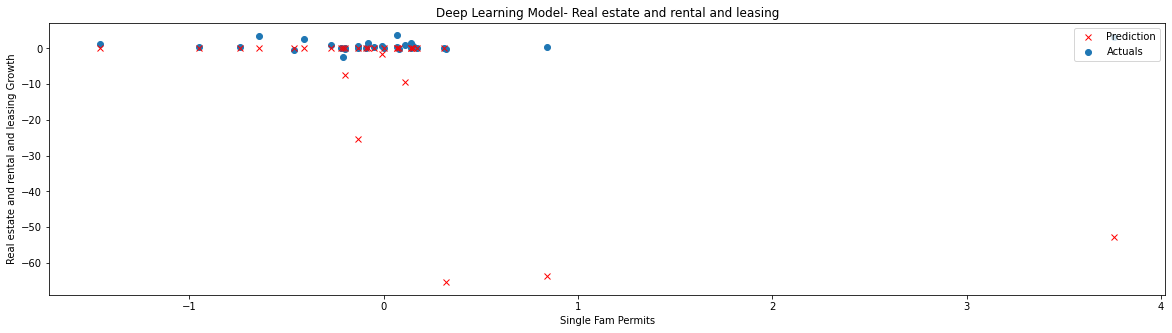

Train on 1287 samples
1287/1287 [==============================] - 0s 61us/sample - loss: 1.7372 - mae: 2.0777
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 162us/sample - loss: 104789.1458 - mae: 104789.6328 - val_loss: 20493.2819 - val_mae: 20493.7832
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 10113.2102 - mae: 10113.7090 - val_loss: 17301.1164 - val_mae: 17301.6172
Epoch 3/25
1029/1029 [==============================] - 0s 37us/sample - loss: 14303.4221 - mae: 14303.9209 - val_loss: 11141.2925 - val_mae: 11141.7930
Epoch 4/25
1029/1029 [==============================] - 0s 45us/sample - loss: 5066.1614 - mae: 5066.6606 - val_loss: 1439.1024 - val_mae: 1439.6021
Epoch 5/25
1029/1029 [==============================] - 0s 37us/sample - loss: 598.8558 - mae: 599.3554 - val_loss: 222.1017 - val_mae: 222.6014
Epoch 6/25
1029/1029 [==============================] - 0s 36us/sample - loss: 162.358

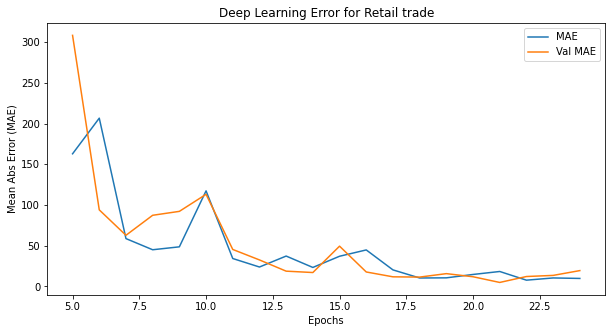

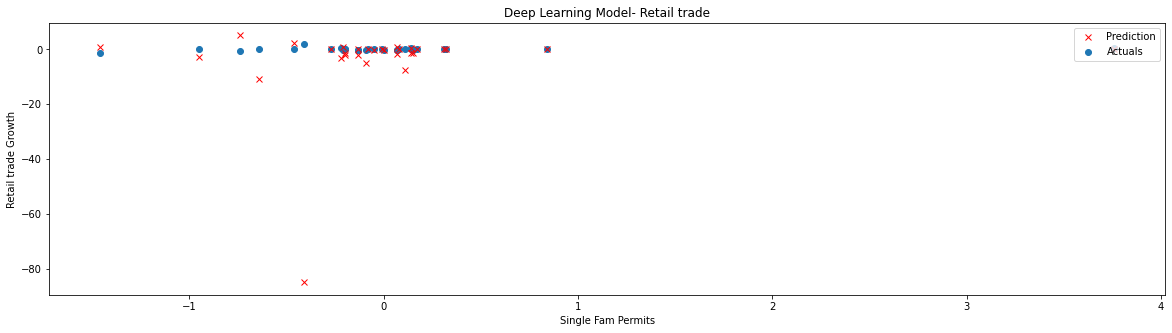

Train on 1287 samples
1287/1287 [==============================] - 0s 63us/sample - loss: 9.8240 - mae: 10.2085
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 171us/sample - loss: 127595.8838 - mae: 127596.3750 - val_loss: 36579.3622 - val_mae: 36579.8633
Epoch 2/25
1029/1029 [==============================] - 0s 44us/sample - loss: 21246.4088 - mae: 21246.9082 - val_loss: 15923.8822 - val_mae: 15924.3809
Epoch 3/25
1029/1029 [==============================] - 0s 40us/sample - loss: 5417.7432 - mae: 5418.2437 - val_loss: 2271.8112 - val_mae: 2272.3103
Epoch 4/25
1029/1029 [==============================] - 0s 45us/sample - loss: 1169.1555 - mae: 1169.6177 - val_loss: 821.1880 - val_mae: 821.6083
Epoch 5/25
1029/1029 [==============================] - 0s 40us/sample - loss: 388.5057 - mae: 388.9350 - val_loss: 479.1770 - val_mae: 479.4861
Epoch 6/25
1029/1029 [==============================] - 0s 43us/sample - loss: 198.4865 - m

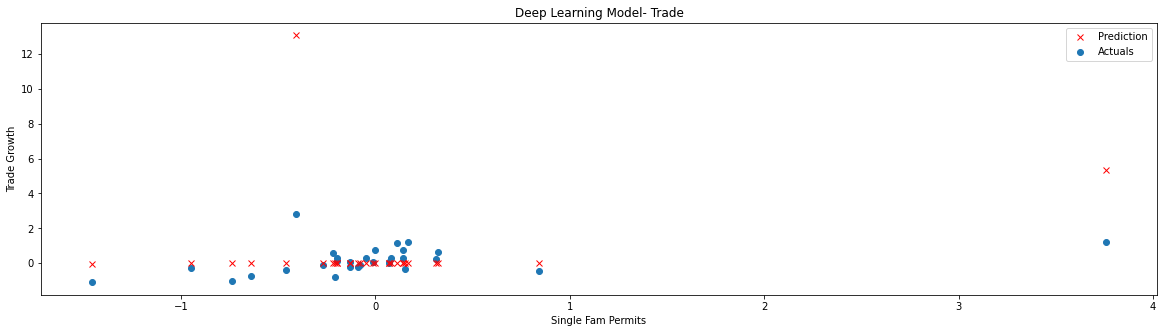

Train on 1287 samples
1287/1287 [==============================] - 0s 56us/sample - loss: 15.8879 - mae: 16.1865
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 165us/sample - loss: 146644.6398 - mae: 146645.1094 - val_loss: 28596.2111 - val_mae: 28596.7109
Epoch 2/25
1029/1029 [==============================] - 0s 41us/sample - loss: 17771.9823 - mae: 17772.4863 - val_loss: 7528.9909 - val_mae: 7529.4907
Epoch 3/25
1029/1029 [==============================] - 0s 49us/sample - loss: 2608.9404 - mae: 2609.4404 - val_loss: 1539.1826 - val_mae: 1539.6816
Epoch 4/25
1029/1029 [==============================] - 0s 43us/sample - loss: 1181.8373 - mae: 1182.3373 - val_loss: 913.4513 - val_mae: 913.9512
Epoch 5/25
1029/1029 [==============================] - 0s 36us/sample - loss: 970.8013 - mae: 971.3011 - val_loss: 717.5893 - val_mae: 718.0876
Epoch 6/25
1029/1029 [==============================] - 0s 40us/sample - loss: 749.4783 - ma

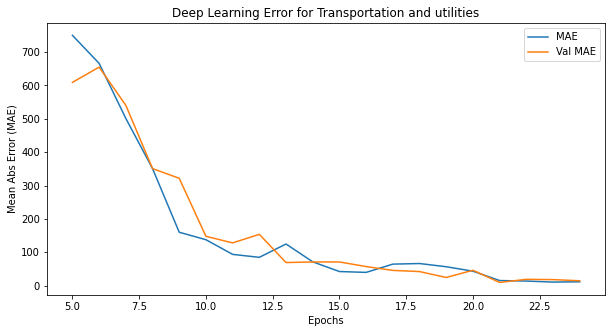

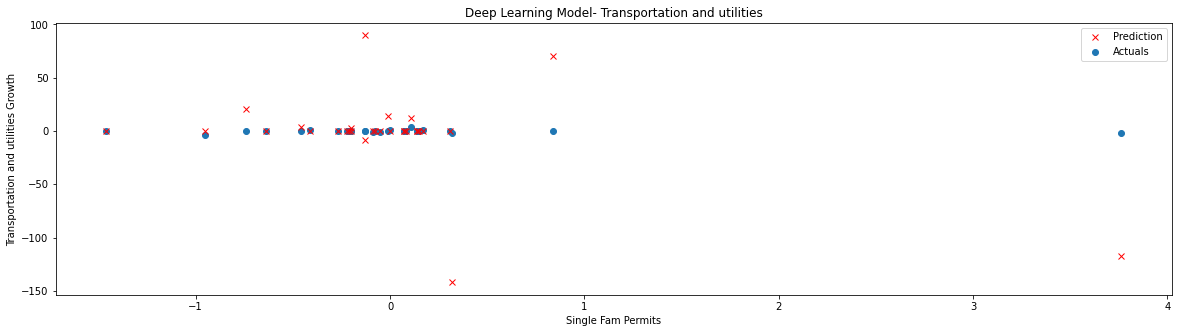

Train on 1287 samples
1287/1287 [==============================] - 0s 59us/sample - loss: 25.5330 - mae: 25.8536
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 170us/sample - loss: 89641.8459 - mae: 89642.3281 - val_loss: 203732.4804 - val_mae: 203733.0000
Epoch 2/25
1029/1029 [==============================] - 0s 42us/sample - loss: 66520.8562 - mae: 66521.3594 - val_loss: 3799.0888 - val_mae: 3799.5845
Epoch 3/25
1029/1029 [==============================] - 0s 46us/sample - loss: 2007.3704 - mae: 2007.7284 - val_loss: 1243.6714 - val_mae: 1243.9474
Epoch 4/25
1029/1029 [==============================] - 0s 45us/sample - loss: 826.3520 - mae: 826.6391 - val_loss: 1078.0124 - val_mae: 1078.2745
Epoch 5/25
1029/1029 [==============================] - 0s 37us/sample - loss: 704.6274 - mae: 704.9081 - val_loss: 353.6984 - val_mae: 353.9626
Epoch 6/25
1029/1029 [==============================] - 0s 40us/sample - loss: 150.8939 - ma

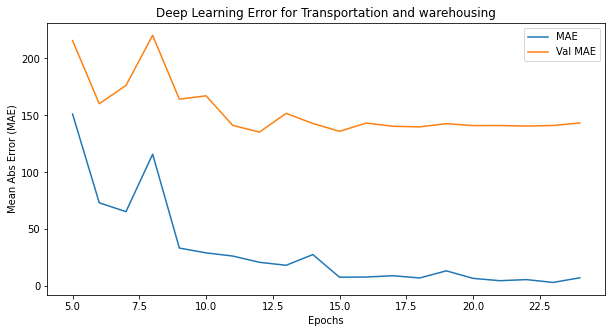

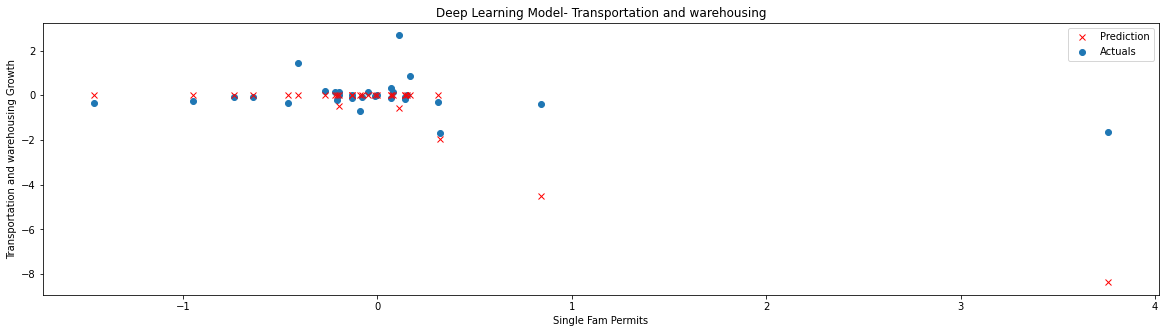

Train on 1287 samples
1287/1287 [==============================] - 0s 57us/sample - loss: 32.6733 - mae: 32.8597
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 163us/sample - loss: 51833.6878 - mae: 51834.1836 - val_loss: 4790.7777 - val_mae: 4791.2778
Epoch 2/25
1029/1029 [==============================] - 0s 43us/sample - loss: 1252.8834 - mae: 1253.2075 - val_loss: 417.1849 - val_mae: 417.3767
Epoch 3/25
1029/1029 [==============================] - 0s 40us/sample - loss: 274.3677 - mae: 274.5706 - val_loss: 117.6049 - val_mae: 117.7551
Epoch 4/25
1029/1029 [==============================] - 0s 39us/sample - loss: 51.6217 - mae: 51.7970 - val_loss: 85.2318 - val_mae: 85.3752
Epoch 5/25
1029/1029 [==============================] - 0s 40us/sample - loss: 74.3473 - mae: 74.5177 - val_loss: 71.7930 - val_mae: 71.9331
Epoch 6/25
1029/1029 [==============================] - 0s 36us/sample - loss: 31.2353 - mae: 31.4013 - val_loss: 

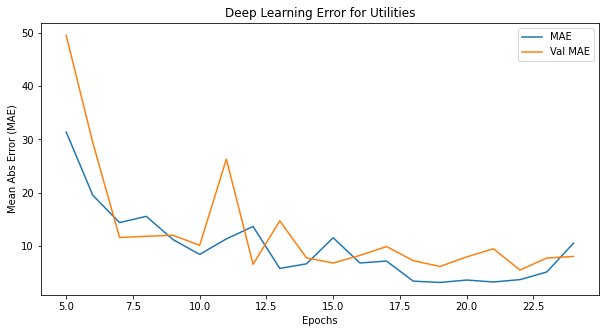

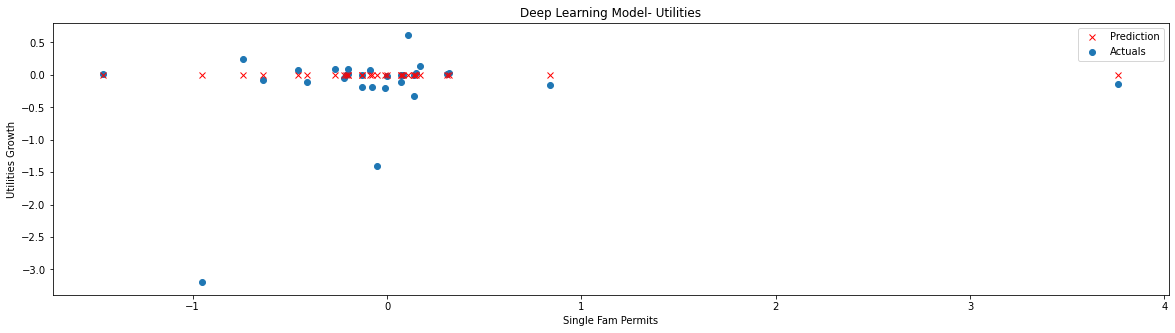

Train on 1287 samples
1287/1287 [==============================] - 0s 59us/sample - loss: 5.5492 - mae: 5.7055
Train on 1029 samples, validate on 258 samples
Epoch 1/25
1029/1029 [==============================] - 0s 161us/sample - loss: 105918.5049 - mae: 105919.0234 - val_loss: 40355.4309 - val_mae: 40355.9297
Epoch 2/25
1029/1029 [==============================] - 0s 40us/sample - loss: 24968.7147 - mae: 24969.2129 - val_loss: 6662.8987 - val_mae: 6663.3989
Epoch 3/25
1029/1029 [==============================] - 0s 43us/sample - loss: 12730.0718 - mae: 12730.5732 - val_loss: 11053.7113 - val_mae: 11054.2109
Epoch 4/25
1029/1029 [==============================] - 0s 40us/sample - loss: 6671.1992 - mae: 6671.6997 - val_loss: 4434.3292 - val_mae: 4434.8296
Epoch 5/25
1029/1029 [==============================] - 0s 38us/sample - loss: 3948.3570 - mae: 3948.8572 - val_loss: 4714.7118 - val_mae: 4715.2109
Epoch 6/25
1029/1029 [==============================] - 0s 42us/sample - loss: 3989.

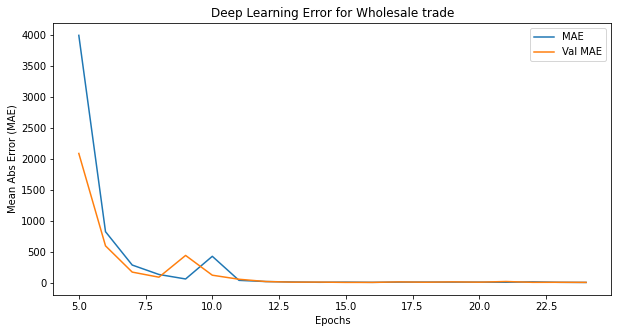

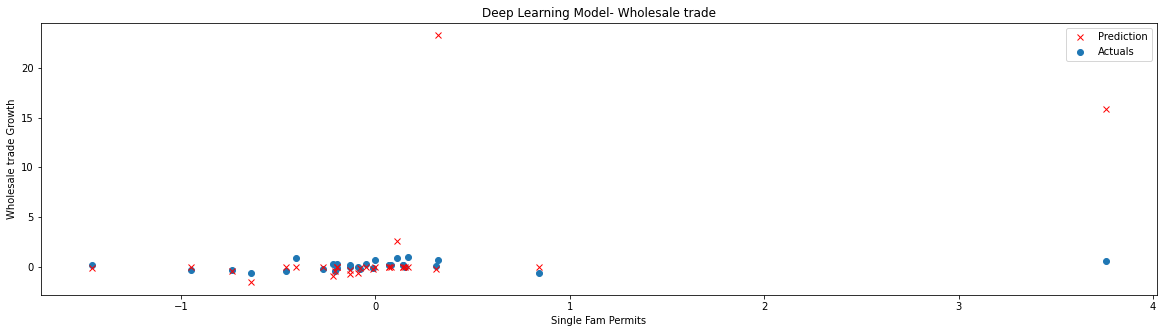

Train on 1287 samples
1287/1287 [==============================] - 0s 60us/sample - loss: 5.9040 - mae: 6.2024


In [47]:
################################################## DEEP NEURAL NETWORKS 

os.chdir(deep_learning_img)
df_train_label=df_train[label]
df_val_label=df_val[label]


var=var_pca
df_pred_dl=pd.DataFrame()
epoch=25

for label in var_bed:
  model = tf.keras.models.Sequential([
   # tf.keras.layers.LSTM(64, input_shape=(16,1),return_sequences=True),
   # tf.keras.layers.LSTM(32, return_sequences=True),
    #tf.keras.layers.GlobalAveragePooling1D(),
  #  tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu",input_shape=(17,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
  #tf.keras.layers.Lambda(lambda x: x * 400)
    ])

  optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])



  history = model.fit(df_train[var_pca],df_train[label],epochs=epoch,validation_data=(df_val[var_pca],df_val_label))
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(5,epoch),history.history["mae"][5:epoch],label="MAE") #######Plot only after epoch #5
  plt.plot(np.arange(5,epoch),history.history["val_mae"][5:epoch],label="Val MAE")
  plt.legend(loc="upper right")
  plt.title("Deep Learning Error for {}".format(label))
  plt.xlabel("Epochs")
  plt.ylabel("Mean Abs Error (MAE)")
  plt.savefig("{}.png".format(label))

    #'Total Construction Spending',
  plt_var='Construction'
  plt.figure(figsize=(20, 5))
  plt.title('Deep Learning Model- {}'.format(label))
  plt.scatter(df_train[plt_var][0:30], df_train[label][0:30],label="Actuals")
  plt.plot(df_train[plt_var][0:30], model.predict(df_train[var_pca][0:30]),'x',color='r',label="Prediction")
  plt.xlabel("Single Fam Permits")
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("Deep_Learning_predictions_{}.png".format(label))
  plt.show()
  model.fit(df_final_rand[var_pca],df_final_rand[label]) ######## fit the full dataset
  mod=model.predict(df_pca_test)
  df_pred_dl=pd.concat([df_pred_dl,pd.DataFrame(mod,columns=[label])],axis=1)


In [49]:
df_pred_grad_boost_final
df_pred_lstm_final
df_pred_dl_final



Year                      MSA  ... Utilities  Wholesale trade
222  2019  Albany-Schenectady-Troy  ...  0.000002        -0.569998
224  2020  Albany-Schenectady-Troy  ...  0.000002        -3.596268
226  2021  Albany-Schenectady-Troy  ...  0.000002        -0.599161
228  2022  Albany-Schenectady-Troy  ...  0.000002        -0.593676
230  2023  Albany-Schenectady-Troy  ...  0.000002        -7.113174
..    ...                      ...  ...       ...              ...
335  2020                   Yakima  ...  0.000002        -0.161309
338  2021                   Yakima  ...  0.000002        -0.180658
341  2022                   Yakima  ...  0.000002        -0.191469
344  2023                   Yakima  ...  0.000002        -0.190003
347  2024                   Yakima  ...  0.000002        -0.180310

[594 rows x 37 columns]

In [0]:
# Poisson regression code
import statsmodels.api as sm

#exog, endog = sm.add_constant(df_train_array), df_train_label
mod = sm.OLS(df_train_label,df_train_array).fit()

mod.summary()


NameError: ignored

In [0]:
####CREATE THE DATASET.  CLEAN. TRANSPOSE. FILTER DATASETS WITH OIL&GAS>20 MIL IN AT LEAST 9 YEARS OUT OF 16.
years=9 #Number of years 
amt=5

msa_files=pd.DataFrame()
for file in input_files:
    msa_file=pd.read_csv(file)
    keep_indices=[0,1,4,5,9,10,14,34,50,56,65,78]
    column_keep=["Description", "2001","2002",'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']
    msa_file=msa_file[column_keep].iloc[keep_indices,:]
    msa_file_T=pd.DataFrame(msa_file.T[1:]).reset_index()
    msa_file_T=msa_file_T.rename(columns={"index":"Year",0:"All industries",1:"Private industries",4:"Forestry,fishing",5:"Oil_gas",9:"Utilities",
                                          10:"Manufacturing",14:"Non-metal miner manufac",34:"Retail",
                                          50:"Finance_Ins",56:"Real_estate",65:"Education",78:"Government"})*1
    for var in msa_file_T.columns:
        msa_file_T[var]=msa_file_T[var].replace("(D)",np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan)*1
        msa_file_T[var]=msa_file_T[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)
        #####CREATE AN INDICATOR IF THERE'S DATA IN OIL & GAS FIELD
        if var=="Oil_gas":
          msa_file_T["dset_keep"]=np.where(msa_file_T["Oil_gas"].astype('float')>amt,1,0) ###ONLY YEARS WITH $20 MILLION OUTPUT
        msa_file_T[var]=msa_file_T[var].fillna(method='ffill')
        msa_file_T[var]=msa_file_T[var].fillna(method='bfill')
        msa_file_T[var]=msa_file_T[var].replace(np.nan,0)
    #CREATE A FILTER WHERE THERE'S MORE THAN 9 YEARS OF DATA OUT OF 16 YEARS FOR OIL & GAS WITH $20 MILLION OUTPUT
    if msa_file_T["dset_keep"].astype('float').sum()>years:
      msa_files=pd.concat([msa_files,msa_file_T],axis=0)






In [0]:

msa_list=[]
for file in input_files:
  msa_list.append(file[7:])
os.chdir(base_dir)
msa_list=pd.DataFrame(msa_list)
msa_list.to_csv("MSA_list.csv")

os.chdir(msa_dir)

In [0]:
msa_files.shape
os.chdir(base_dir)
msa_files.to_excel("msa_files.xlsx")

os.chdir(msa_dir)

In [0]:
msa_files.columns

Index(['Year', 'All industries', 'Private industries', 'Forestry,fishing',
       'Oil_gas', 'Utilities', 'Manufacturing', 'Non-metal miner manufac',
       'Retail', 'Finance_Ins', 'Real_estate', 'Education', 'Government',
       'dset_keep'],
      dtype='object')

In [0]:

USA_file=USA_gdp[column_keep].iloc[0:3]
USA_file_T=USA_file.T[1:].reset_index()
USA_file_T=USA_file_T.rename(columns={"index":"Year",0:"GDP Growth",1:"All industries_USA",2:"Private industries_USA"})
print(USA_file_T)

    Year GDP Growth All industries_USA Private industries_USA
0   2001      -0.01          9551195.1              8381322.4
1   2002     0.0174          9872503.4              8632372.4
2   2003     0.0186         10346834.9              9037613.8
3   2004      0.038           11033711              9650075.6
4   2005      0.035         11793460.1             10342186.4
5   2006     0.0286         12488192.4             10966300.6
6   2007     0.0188         13058074.8             11453293.7
7   2008     -0.014         13233095.5             11555119.5
8   2009    -0.0207         12959750.1             11231707.8
9   2010     0.0256         13421681.4             11635874.4
10  2011     0.0155         13885695.4               12076405
11  2012     0.0255         14485166.1               12652793
12  2013     0.0184           14966839               13111140
13  2014     0.0245           15628087               13723928
14  2015     0.0288         16358497.6             14391365.4
15  2016

In [0]:
MSA_files_complete=USA_file_T.merge(msa_files,left_on="Year",right_on="Year").set_index("Year")
MSA_files_complete["GDP Growth"]=MSA_files_complete["GDP Growth"].replace("(","-").replace(")","")
MSA_files_complete=MSA_files_complete.astype('float')

In [0]:
MSA_files_complete.head

<bound method NDFrame.head of       GDP Growth  All industries_USA  ...  dset_keep  Recession_indicator
Year                                  ...                                
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        1.0                    1
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        1.0                    1
...          ...                 ...  ...        ...                  ...
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0

[2040 r

In [0]:
def feature_engineering(dset_in):
    dset_out=pd.DataFrame()
    for col in dset_in.columns:
        dset_out[col]=dset_in[col]
        dset_out[col+"_log"]=dset_in[col].apply(lambda x: np.log(x+1))
        dset_out[col+"_squared"]=dset_in[col].apply(lambda x: np.square(x+1))
    return dset_out


def percent_of_msa_econ(dset_in):
  dset_out=pd.DataFrame()
  for col in dset_in.columns:
    if col !="All industries":
      #dset_out[col]=dset_in[col]
      dset_out[col+"_pct"]=[dset_in[col].iloc[i]/dset_in["All industries"].iloc[i] for i in range(len(dset_in["All industries"]))]
  return dset_out.astype(float)


In [0]:
MSA_files_complete["Recession_indicator"]=0
recession_years=['2001','2008','2009']
"""for i in range(len(MSA_files_complete)):
    if MSA_files_complete["Year"].iloc[i] in recession_years:
        MSA_files_complete["Recession_indicator"].iloc[i]=1
    else:
        MSA_files_complete["Recession_indicator"].iloc[i]=0"""
MSA_files_complete["Recession_indicator"]=np.where(MSA_files_complete.index.isin(recession_years),1,0) ####Much faster than doing a loop
        
pred_var=["All industries","Private industries","Forestry,fishing","Oil_gas",'Non-metal miner manufac',"Utilities","Manufacturing","Retail","Finance_Ins","Real_estate","Education","Government"]
label_var=["Recession_indicator"]

df_var=MSA_files_complete[pred_var].astype(float)
df_label=MSA_files_complete[label_var]
####convert it to numeric matrix
df_var_features=feature_engineering(df_var)
df_var_mat=np.matrix(df_var_features,float)
df_label_mat=np.matrix(df_label,float)




In [0]:
len(df_var_features.columns)

36

In [0]:
print(MSA_files_complete.head())

      GDP Growth  All industries_USA  ...  dset_keep  Recession_indicator
Year                                  ...                                
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        1.0                    1
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        1.0                    1

[5 rows x 17 columns]


In [0]:
#####Sklearn doesn't return p-values of coefficients
from sklearn.linear_model import LogisticRegression
import sklearn.feature_selection
clf=LogisticRegression(random_state=0,solver='lbfgs').fit(df_var,df_label)
p_value=sklearn.feature_selection.f_regression(df_var,df_label)
clf.coef_



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-1.19132447e-04,  1.65104967e-04, -5.16736789e-04,
        -1.72669383e-04, -8.15980396e-04,  9.55167246e-05,
         6.37646245e-04, -2.05086771e-03,  3.67783229e-04,
         2.09203530e-04, -2.50417565e-04,  6.41444836e-05]])

In [0]:
#####using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model


discrete_model.Logit(df_label_mat,df_var_mat)
results=sm.Logit(df_label_mat,df_var_mat)
results_f=results.fit()
print(results_f.summary())

Optimization terminated successfully.
         Current function value: 0.448014
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2005
Method:                           MLE   Df Model:                           34
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.03860
Time:                        15:54:48   Log-Likelihood:                -913.95
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                 0.0001030
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0032      0.002     -1.611      0.107      -0.007       0.001
x2            -1.8172      1.

In [0]:
###########CORRELATION BETWEEN INDIVIDUAL INDUSTRIES & ALL INDUSTRIES
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt



In [0]:
######################################Percent of Industry in Economy

df_var_pct=percent_of_msa_econ(df_var)
df_var_pct_mat=np.matrix(df_var_pct,"float")



for i in df_var_pct.columns:
  print(i," =",pearsonr(df_var_pct[i],MSA_files_complete["All industries_USA"]))

Private industries_pct  = (0.07857607971012692, 0.0003818596064877735)
Forestry,fishing_pct  = (0.03587423931726527, 0.10526728617437976)
Oil_gas_pct  = (0.02724675517189615, 0.21865561114826834)
Non-metal miner manufac_pct  = (-0.07716121604880719, 0.0004863635416020818)
Utilities_pct  = (-0.032022712426295, 0.14822387315109725)
Manufacturing_pct  = (-0.3299386510953362, 5.275678246587498e-53)
Retail_pct  = (-0.045056924159328195, 0.04186664284876076)
Finance_Ins_pct  = (0.014912346121684825, 0.5008448783076218)
Real_estate_pct  = (0.013942160058176493, 0.5291125927832199)
Education_pct  = (0.001079475244547311, 0.9611375778615656)
Government_pct  = (-0.08229962918802992, 0.00019827031834943032)


In [0]:
################CORRELATION BETWEEN INDUSTRY PERCENTAGE OF MSA'S ECONOMY AND USA GDP GROWTH
for i in df_var_pct.columns:
  print(i," =",pearsonr(df_var_pct[i],MSA_files_complete["GDP Growth"]))

Private industries_pct  = (0.03214352496516699, 0.14669880332275434)
Forestry,fishing_pct  = (0.007664066073518147, 0.7293796338339895)
Oil_gas_pct  = (-0.009735010845500335, 0.6603457102761396)
Non-metal miner manufac_pct  = (0.0019329586461899484, 0.9304717828892327)
Utilities_pct  = (-0.00822217687775451, 0.7105299450089176)
Manufacturing_pct  = (0.001562047391223188, 0.9437887014256673)
Retail_pct  = (0.0573875713852562, 0.009527130742256171)
Finance_Ins_pct  = (0.01591392031371679, 0.4725237675937108)
Real_estate_pct  = (0.006526605923455836, 0.7682952701574847)
Education_pct  = (-0.009094727081901418, 0.6814154206563484)
Government_pct  = (-0.0327595032423046, 0.1391088920369939)


In [0]:
results_pct=sm.Logit(df_label_mat,df_var_pct_mat)
results_pct_f=results_pct.fit()
print(results_pct_f.summary())

Optimization terminated successfully.
         Current function value: 0.459813
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2029
Method:                           MLE   Df Model:                           10
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.01328
Time:                        15:56:28   Log-Likelihood:                -938.02
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                  0.004908
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6146      0.422     -3.827      0.000      -2.441      -0.788
x2            -2.7214      6.

In [0]:
df_oilgas_pct=feature_engineering(df_var_pct[["Oil_gas_pct","Retail_pct","Education_pct","Utilities_pct"]])
df_oil_gas_pct_mat=np.matrix(df_oilgas_pct,"float")



print(df_oilgas_pct.head())


   Oil_gas_pct  Oil_gas_pct_log  ...  Utilities_pct_log  Utilities_pct_squared
0     0.066650         0.064523  ...           0.021814               1.044593
1     0.208344         0.189251  ...           0.011113               1.022475
2     0.003812         0.003805  ...           0.012296               1.024897
3     0.005928         0.005911  ...           0.001218               1.002439
4     0.003807         0.003800  ...           0.015456               1.031394

[5 rows x 12 columns]


In [0]:
results_oil_gas_pct=sm.Logit(df_label_mat,df_oil_gas_pct_mat[:,:6])
results_oil_gas_pct_f=results_oil_gas_pct.fit()
print(results_oil_gas_pct_f.summary())

Optimization terminated successfully.
         Current function value: 0.464881
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2034
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                0.002399
Time:                        15:56:28   Log-Likelihood:                -948.36
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                    0.4717
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            90.7359    156.583      0.579      0.562    -216.160     397.632
x2           -58.0405     97.

In [0]:
from matplotlib import pyplot as plt

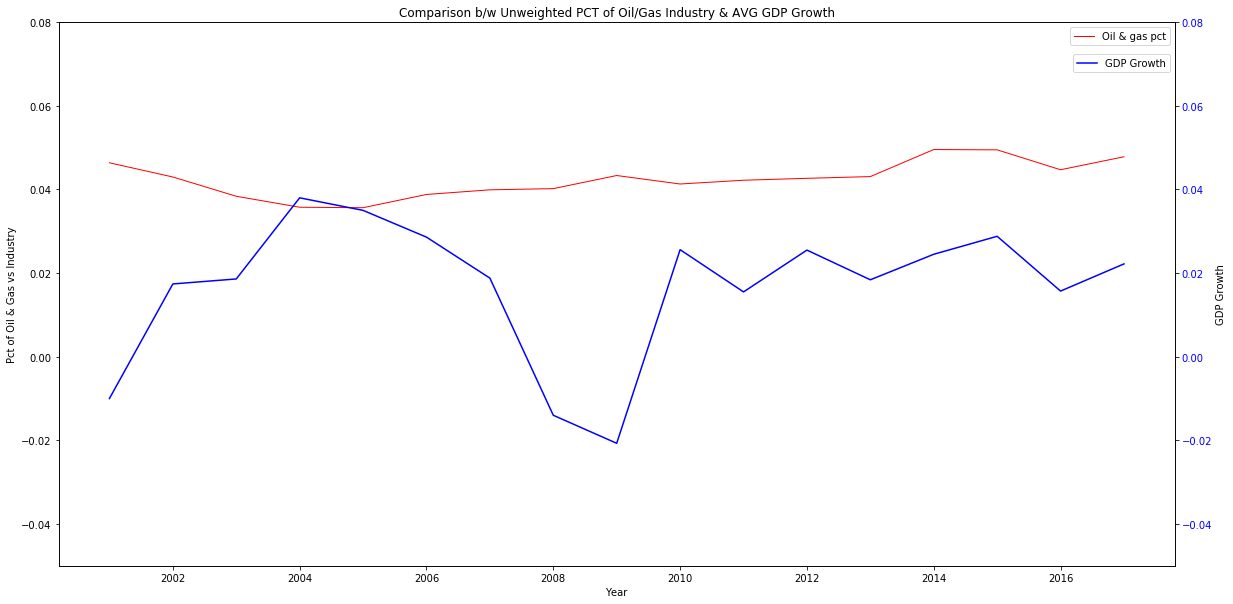

In [0]:
color = 'red'
fig1=df_var_pct["Oil_gas_pct"].groupby(df_var.index).mean()
fig2=MSA_files_complete["GDP Growth"].groupby(MSA_files_complete.index).mean()

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(2001,2018),fig1,color=color,linewidth=1.0,label='Oil & gas pct')
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
color2='blue'
ax2.plot(np.arange(2001,2018),fig2,color=color2,label='GDP Growth')
ax2.tick_params(axis='y', labelcolor=color2)
plt.title("Comparison b/w Unweighted PCT of Oil/Gas Industry & AVG GDP Growth")
ax1.set_ylabel("Pct of Oil & Gas vs Industry")
ax2.set_ylabel("GDP Growth")
ax1.legend(bbox_to_anchor = [1, 1])
ax2.legend(bbox_to_anchor = [1, .95])

ax1.set_ylim([-.05,.08])
ax2.set_ylim([-.05,.08])
plt.show()

In [0]:
wm = lambda x: np.average(x, weights=df_var_pct.loc[x.index.unique(),"Oil_gas"])

# Define a dictionary with the functions to apply for a given column:
f = { 'Oil_gas_pct': {'weighted_mean' : wm} }

# Groupby and aggregate with your dictionary:
fig1=df_var_pct.groupby(df_var_pct.index).agg(f)
fig2=MSA_files_complete["GDP Growth"].groupby(MSA_files_complete.index).mean()

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(2001,2018),fig1,color=color,linewidth=1.0,label="Weighted Oil & Gas Pct ")
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
color2='blue'
ax2.plot(np.arange(2001,2018),fig2,color=color2,label="GDP Growth")
plt.title("Comparison b/w Weighted PCT of Oil/Gas Industry & AVG GDP Growth")
ax1.set_ylabel("Pct of Oil & Gas vs Industry")
ax2.set_ylabel("GDP Growth")
ax1.legend(bbox_to_anchor = [1, 1])
ax2.legend(bbox_to_anchor = [1, .95])

ax2.set_ylim([-.05,.08])

plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


KeyError: ignored

In [0]:
for i in fig1.columns:
  print(pearsonr(fig1[i],fig2))

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [0]:
df_var_pct